# Business Understanding

### 1. Context and Motivation
Modern machine learning applications frequently involve high-dimensional datasets where the relationship between input variables and the target variable is complex, sparse, and potentially non-linear. While tree-based ensemble methods such as Random Forests are widely used due to their flexibility, they rely on greedy split-selection strategies that prioritize short-term gains. This limitation can lead to poor performance in scenarios involving weak marginal effects, strong feature interactions, or correlated variables.

This project investigates **Reinforcement Learning Trees (RLT)** as an alternative tree-based framework that incorporates reinforcement learning principles to optimize long-term predictive performance. The study is structured around both **synthetic simulation scenarios** and **real-world benchmark datasets**, ensuring that conclusions are both theoretically grounded and empirically relevant. 

### 2. Business Objectives

The primary business objective of this project is to evaluate whether **Reinforcement Learning Trees (RLT)** can provide **robust and consistent performance improvements** over traditional machine learning models across a wide range of data-generating processes.


### 3. Business Success Criteria
The project is considered successful if Reinforcement Learning Trees:
- Outperform traditional tree-based methods in non-linear and sparse scenarios
- Remain competitive with linear models in linear settings
- Demonstrate stability across diverse real-world datasets
- Provide empirical support for their theoretical advantages

###

# Data Understanding


This section provides an overview of the 10 datasets used in the study. For each dataset, we summarize its type, size, features, target variable, and any notable characteristics.

---

#### HCV (Hepatitis C Virus Dataset)
- **Type:** Classification  
- **Number of instances:** ~1,685  
- **Features:** Demographic, clinical, and laboratory attributes  
- **Target:** Disease progression stage (categorical)  
- **Notes:** Contains missing values; class imbalance may be present.

---

#### Sonar
- **Type:** Classification  
- **Number of instances:** 208  
- **Features:** 60 numeric attributes representing sonar signals  
- **Target:** Rock vs. Mine (binary)  
- **Notes:** High-dimensional relative to dataset size; all features numeric.

---

#### WDBC (Wisconsin Diagnostic Breast Cancer)
- **Type:** Classification  
- **Number of instances:** 569  
- **Features:** 30 numeric features from digitized images of breast masses  
- **Target:** Malignant or Benign  
- **Notes:** Well-known medical dataset; numeric features standardized.

---

#### Concrete Compressive Strength
- **Type:** Regression  
- **Number of instances:** 1,030  
- **Features:** 8 numeric features (cement, water, additives, age, etc.)  
- **Target:** Compressive strength of concrete  
- **Notes:** Continuous target; nonlinear relationships expected.

---

#### SMS Spam Collection
- **Type:** Classification (Text)  
- **Number of instances:** 5,574  
- **Features:** Raw SMS text messages  
- **Target:** Spam or Ham  
- **Notes:** Requires text preprocessing (tokenization, vectorization); unbalanced classes.

---

#### Car Evaluation
- **Type:** Classification  
- **Number of instances:** 1,728  
- **Features:** 6 categorical features (buying, maintenance, doors, persons, lug_boot, safety)  
- **Target:** Car acceptability (unacc, acc, good, vgood)  
- **Notes:** Nominal categorical features; small dataset.

---

#### Auto MPG
- **Type:** Regression  
- **Number of instances:** 398  
- **Features:** 7 numeric and categorical features (cylinders, displacement, horsepower, weight, acceleration, model year, origin)  
- **Target:** Miles per gallon (MPG)  
- **Notes:** Contains missing values for horsepower; mix of numeric and categorical features.

---

#### Crime Dataset
- **Type:** Regression / Classification (depending on usage)  
- **Number of instances:** 2,000+ (depending on source)  
- **Features:** Socioeconomic and demographic variables  
- **Target:** Crime rate or category  
- **Notes:** Potential for multicollinearity; mixed data types.

---

#### Energy Cooling Load
- **Type:** Regression  
- **Number of instances:** 768  
- **Features:** 8 numeric attributes related to building design (orientation, glazing area, etc.)  
- **Target:** Cooling load (continuous)  
- **Notes:** Features correlated; target is continuous.

---

#### Energy Heating Load
- **Type:** Regression  
- **Number of instances:** 768  
- **Features:** 8 numeric attributes related to building design  
- **Target:** Heating load (continuous)  
- **Notes:** Same structure as Cooling Load dataset; correlated features.

---

**Summary:**  
The datasets include a mix of **classification and regression problems**, numeric and categorical features, text data, and varying sizes. This diversity allows robust evaluation of **Reinforcement Learning Trees (RLT)** under different data characteristics.


# Data Preparation

## Imports

In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import (
    f_classif,
    mutual_info_classif,
    SelectKBest,
    VarianceThreshold,
    RFECV,
    chi2,
    f_regression,
    mutual_info_regression
)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold


from sklearn.datasets import load_breast_cancer
from sklearn.inspection import permutation_importance

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

from sklearn.impute import SimpleImputer

## HCV
OUTPUT: X_HCV **__________** y_HCV

In [ ]:
path = "datasets_raw/hcv+data/hcvdat0.csv"

df = pd.read_csv(path)

print("Shape:", df.shape)
df.head()

Shape: (615, 14)


Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [ ]:
df = pd.read_csv(path, na_values=["?"])
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
TARGET_COL = "Category"   # change if your target column has another name

feature_cols = [c for c in df.columns if c != TARGET_COL]

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


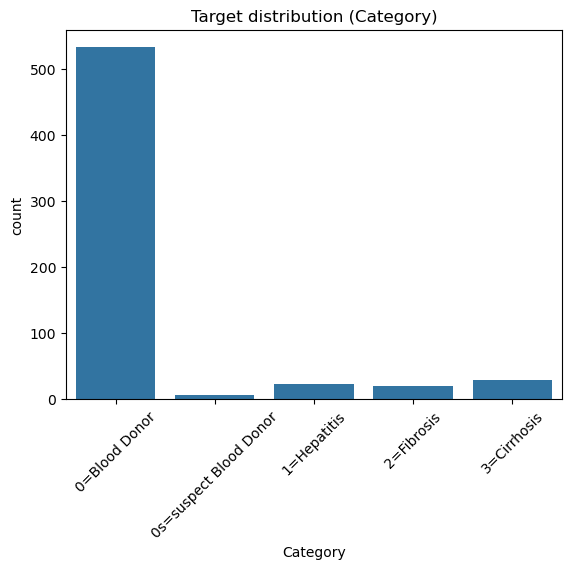

In [ ]:
y_raw = df[TARGET_COL]
print(y_raw.value_counts(dropna=False))
sns.countplot(x=y_raw)
plt.title("Target distribution (Category)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df[feature_cols].select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
Categorical: ['Sex']


In [ ]:
missing_counts = df.isna().sum()
missing_ratio = df.isna().mean()

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_ratio": missing_ratio
}).sort_values("missing_ratio", ascending=False)

missing_table

missing_count  missing_ratio
ALP                  18       0.029268
CHOL                 10       0.016260
ALB                   1       0.001626
ALT                   1       0.001626
PROT                  1       0.001626
Age                   0       0.000000
Sex                   0       0.000000
Category              0       0.000000
AST                   0       0.000000
CHE                   0       0.000000
BIL                   0       0.000000
CREA                  0       0.000000
GGT                   0       0.000000

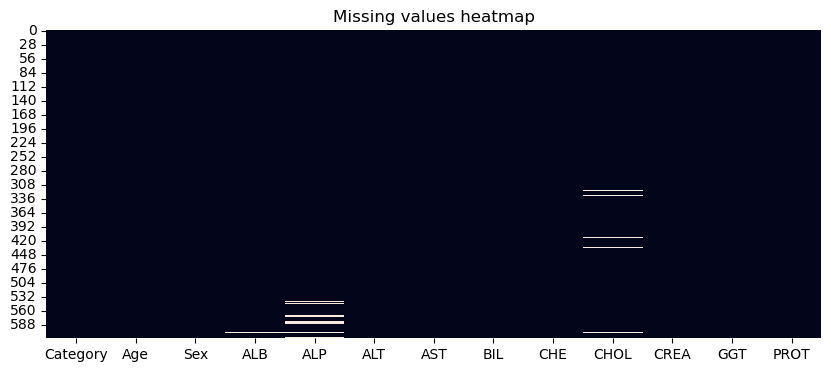

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing values heatmap")
plt.show()

In [ ]:
# Numerical
df[num_cols].describe().T

# Categorical
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))


--- Sex ---
Sex
m    377
f    238
Name: count, dtype: int64


In [ ]:
le_y = LabelEncoder()
y = le_y.fit_transform(y_raw)   # y is numeric now
print("Classes:", le_y.classes_)

Classes: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [ ]:
df_proc = df.copy()

# 1) Impute numeric with median
for col in num_cols:
    median = df_proc[col].median()
    df_proc[col] = df_proc[col].fillna(median)

# 2) Impute categorical with most frequent & label encode
cat_encoders = {}
for col in cat_cols:
    mode = df_proc[col].mode(dropna=True)
    if len(mode) > 0:
        mode_val = mode.iloc[0]
        df_proc[col] = df_proc[col].fillna(mode_val)
    else:
        df_proc[col] = df_proc[col].fillna("Missing")

    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    cat_encoders[col] = le

In [ ]:
X = df_proc[feature_cols].copy()
X.head()

Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

In [ ]:
vt = VarianceThreshold(threshold=0.0)
vt.fit(X)

constant_cols = [c for c, keep in zip(X.columns, vt.get_support()) if not keep]
print("Constant columns:", constant_cols)

X_fs = X.drop(columns=constant_cols)
print("Shape after dropping constants:", X_fs.shape)

Constant columns: []
Shape after dropping constants: (615, 12)


In [ ]:
K = min(15, X_fs.shape[1])  # top 15 for inspection

selector_f = SelectKBest(score_func=f_classif, k=K)
selector_f.fit(X_fs, y)

f_scores = selector_f.scores_

f_df = pd.DataFrame({
    "feature": X_fs.columns,
    "f_score": f_scores
}).sort_values("f_score", ascending=False)

print("Top ANOVA features:")
f_df.head(20)

Top ANOVA features:


feature     f_score
5      AST  115.111305
6      BIL   68.399144
10     GGT   55.602426
2      ALB   45.813378
7      CHE   40.684701
11    PROT   29.846586
4      ALT   27.680763
3      ALP   17.700192
8     CHOL   16.553024
9     CREA   11.355392
0      Age   11.040693
1      Sex    1.918366

In [ ]:
mi_scores = mutual_info_classif(X_fs, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": X_fs.columns,
    "mutual_info": mi_scores
}).sort_values("mutual_info", ascending=False)

print("Top MI features:")
mi_df.head(20)

Top MI features:


feature  mutual_info
5      AST     0.231725
2      ALB     0.163151
3      ALP     0.144084
4      ALT     0.126322
6      BIL     0.122766
7      CHE     0.120706
10     GGT     0.108557
9     CREA     0.097156
11    PROT     0.069070
8     CHOL     0.063735
1      Sex     0.056348
0      Age     0.039185

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_fs, y)

fi_df = pd.DataFrame({
    "feature": X_fs.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi_df.head(20)

feature  importance
5      AST    0.261108
4      ALT    0.113520
7      CHE    0.109222
3      ALP    0.092147
10     GGT    0.084152
2      ALB    0.070443
6      BIL    0.066526
11    PROT    0.058240
0      Age    0.054803
8     CHOL    0.043859
9     CREA    0.040482
1      Sex    0.005499

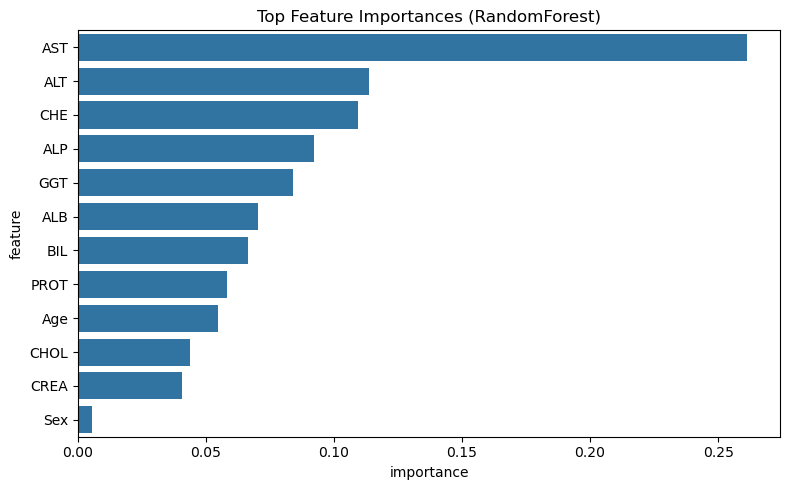

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="importance", y="feature", data=fi_df.head(15))
plt.title("Top Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

rfecv.fit(X_fs, y)

print("Optimal number of features:", rfecv.n_features_)

Optimal number of features: 9


In [ ]:
rfecv_support = pd.DataFrame({
    "feature": X_fs.columns,
    "selected": rfecv.support_,
    "ranking": rfecv.ranking_
}).sort_values("ranking", ascending=True)

selected_rfecv = rfecv_support[rfecv_support["selected"]]["feature"].tolist()
selected_rfecv

['Age', 'ALB', 'ALP', 'ALT', 'BIL', 'AST', 'CHE', 'PROT', 'GGT']

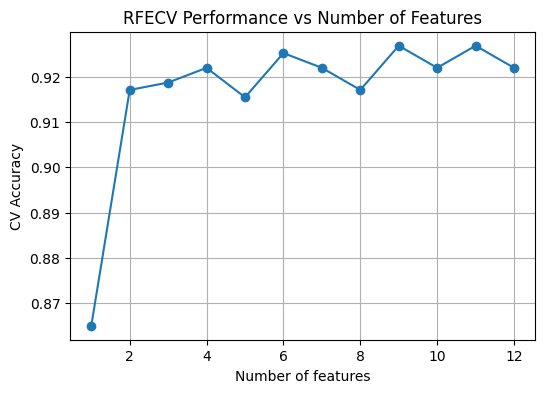

In [ ]:
scores = rfecv.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
plt.plot(range(1, len(scores)+1), scores, marker="o")
plt.xlabel("Number of features")
plt.ylabel("CV Accuracy")
plt.title("RFECV Performance vs Number of Features")
plt.grid(True)
plt.show()

In [ ]:

y_HCV = y

import pandas as pd
from sklearn.model_selection import train_test_split

# X_fs: feature dataframe
# y: target labels (Series or array)

X_train, X_test, y_train, y_test = train_test_split(
    X_fs,
    y_HCV,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Export to CSV
X_train.to_csv("X_train_data.csv", index=False)
X_test.to_csv("X_test_data.csv", index=False)

pd.DataFrame(y_train, columns=["label"]).to_csv("y_train_data.csv", index=False)
pd.DataFrame(y_test, columns=["label"]).to_csv("y_test_data.csv", index=False)

print("✓ Stratified 80/20 splits exported successfully")



print (X_fs.shape)
print (y_HCV.shape)



✓ Stratified 80/20 splits exported successfully
(615, 12)
(615,)


## Breast Cancer
OUTPUT: X_BC **__________** y_BC

In [ ]:
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()   # all features + target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [ ]:
TARGET_COL = "target"

# Map 0/1 to malignant/benign (0 = malignant, 1 = benign in this dataset)
df[TARGET_COL] = df[TARGET_COL].map({0: "malignant", 1: "benign"})
df[TARGET_COL].value_counts()

target
benign       357
malignant    212
Name: count, dtype: int64

In [ ]:
print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (569, 31)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension     target  
0          0.4601                  0.11890  malignant  
1          0.2750                  0.08902  malignant  
2          0.3613                  0.08758  malignant  
3          0.6638                  0.17300  malignant  
4          0.2364                  0.07678  malignant  

[5 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
feature_cols = [c for c in df.columns if c != TARGET_COL]

num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df[feature_cols].select_dtypes(include=["object", "category", "bool"]).columns.tolist()
dt_cols  = df[feature_cols].select_dtypes(include=["datetime64[ns]"]).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)
print("Datetime:", dt_cols)

var_type_summary = pd.DataFrame({
    "feature": feature_cols,
    "dtype": [df[c].dtype for c in feature_cols],
    "is_numeric": [c in num_cols for c in feature_cols],
    "is_categorical": [c in cat_cols for c in feature_cols],
    "is_datetime": [c in dt_cols for c in feature_cols]
})
display(var_type_summary)


Numerical: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Categorical: []
Datetime: []


feature    dtype  is_numeric  is_categorical  is_datetime
0               mean radius  float64        True           False        False
1              mean texture  float64        True           False        False
2            mean perimeter  float64        True           False        False
3                 mean area  float64        True           False        False
4           mean smoothness  float64        True           False        False
5          mean compactness  float64        True           False        False
6            mean concavity  float64        True           False        False
7       mean concave points  float64        True           False        False
8             mean symmetry  float64        True           False        False
9    mean fractal dimension  float64        True           False        False
10             radius error  float64        True           False        False
11            texture error  float64        True           False        False
12          perimeter error  float64        True           False        False
13               area error  float64        True           False        False
14         smoothness error  float64        True           False        False
15        compactness error  float64        True           False        False
16          concavity error  float64        True           False        False
17     concave points error  float64        True           False        False
18           symmetry error  float64        True           False        False
19  fractal dimension error  float64        True           False        False
20             worst radius  float64        True           False        False
21            worst texture  float64        True           False        False
22          worst perimeter  float64        True           False        False
23               worst area  float64        True           False        False
24         worst smoothness  float64        True           False        False
25        worst compactness  float64        True           False        False
26          worst concavity  float64        True           False        False
27     worst concave points  float64        True           False        False
28           worst symmetry  float64        True           False        False
29  worst fractal dimension  float64        True           False        False

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.400000   251.20000  
worst area               515.300000  686.500000  1084.

Target distribution:
target
benign       0.627417
malignant    0.372583
Name: proportion, dtype: float64


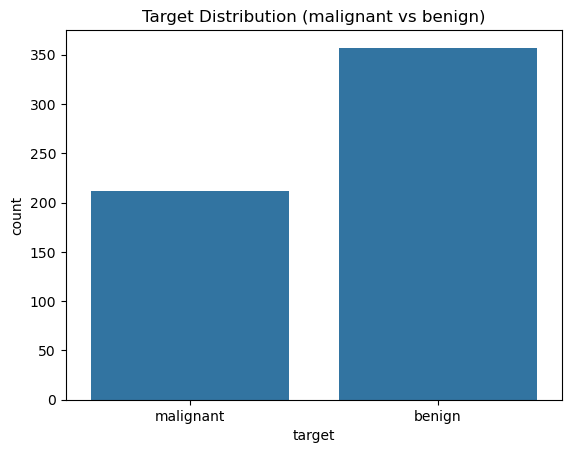

In [ ]:
# Numerical
display(df[num_cols].describe().T)

# Target distribution
y = df[TARGET_COL]
print("Target distribution:")
print(y.value_counts(normalize=True))

sns.countplot(x=y)
plt.title("Target Distribution (malignant vs benign)")
plt.show()

missing_count  missing_ratio
mean radius                          0            0.0
mean texture                         0            0.0
mean perimeter                       0            0.0
mean area                            0            0.0
mean smoothness                      0            0.0
mean compactness                     0            0.0
mean concavity                       0            0.0
mean concave points                  0            0.0
mean symmetry                        0            0.0
mean fractal dimension               0            0.0
radius error                         0            0.0
texture error                        0            0.0
perimeter error                      0            0.0
area error                           0            0.0
smoothness error                     0            0.0
compactness error                    0            0.0
concavity error                      0            0.0
concave points error                 0            0.0
symmetry error                       0            0.0
fractal dimension error              0            0.0
worst radius                         0            0.0
worst texture                        0            0.0
worst perimeter                      0            0.0
worst area                           0            0.0
worst smoothness                     0            0.0
worst compactness                    0            0.0
worst concavity                      0            0.0
worst concave points                 0            0.0
worst symmetry                       0            0.0
worst fractal dimension              0            0.0
target                               0            0.0

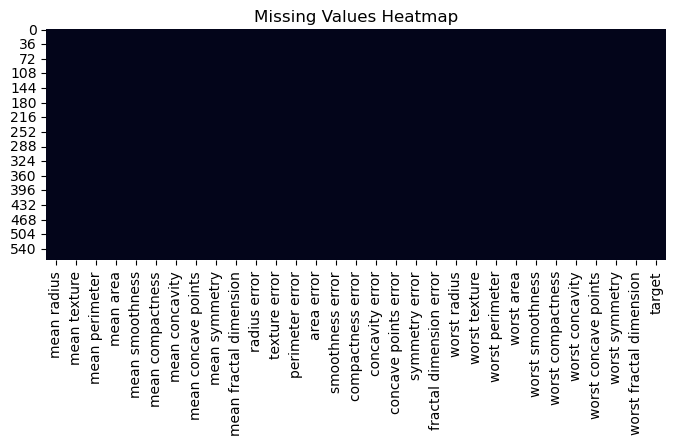

In [ ]:
missing_counts = df.isna().sum()
missing_ratio = df.isna().mean()

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_ratio": missing_ratio
}).sort_values("missing_ratio", ascending=False)

display(missing_table)

plt.figure(figsize=(8, 3))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
def iqr_outlier_mask(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return (series < lower) | (series > upper)

outlier_summary = []
for col in num_cols:
    s = df[col].dropna()
    mask = iqr_outlier_mask(s)
    outlier_ratio = mask.mean()
    outlier_summary.append((col, outlier_ratio))

outlier_df = pd.DataFrame(outlier_summary, columns=["feature", "outlier_ratio"])\
                .sort_values("outlier_ratio", ascending=False)
display(outlier_df)

feature  outlier_ratio
13               area error       0.114236
10             radius error       0.066784
12          perimeter error       0.066784
23               worst area       0.061511
14         smoothness error       0.052724
19  fractal dimension error       0.049209
15        compactness error       0.049209
18           symmetry error       0.047452
3                 mean area       0.043937
29  worst fractal dimension       0.042179
28           worst symmetry       0.040422
16          concavity error       0.038664
11            texture error       0.035149
17     concave points error       0.033392
6            mean concavity       0.031634
20             worst radius       0.029877
25        worst compactness       0.028120
5          mean compactness       0.028120
8             mean symmetry       0.026362
9    mean fractal dimension       0.026362
22          worst perimeter       0.026362
0               mean radius       0.024605
2            mean perimeter       0.022847
26          worst concavity       0.021090
7       mean concave points       0.017575
1              mean texture       0.012302
24         worst smoothness       0.012302
4           mean smoothness       0.010545
21            worst texture       0.008787
27     worst concave points       0.000000

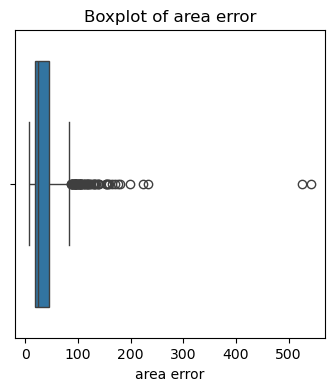

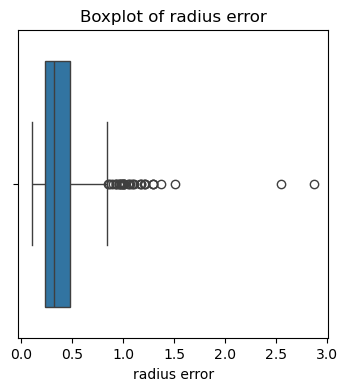

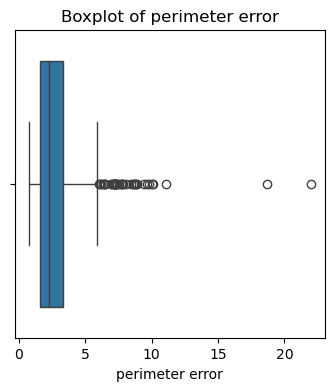

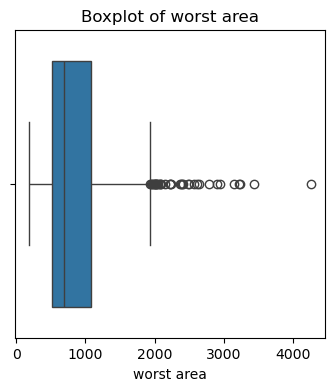

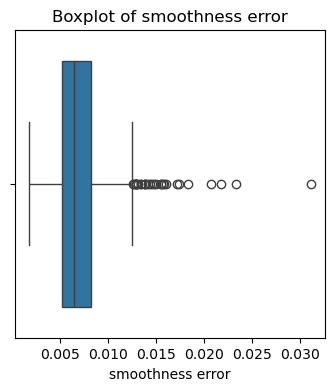

In [ ]:
for col in outlier_df["feature"][:5]:  # first 5
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

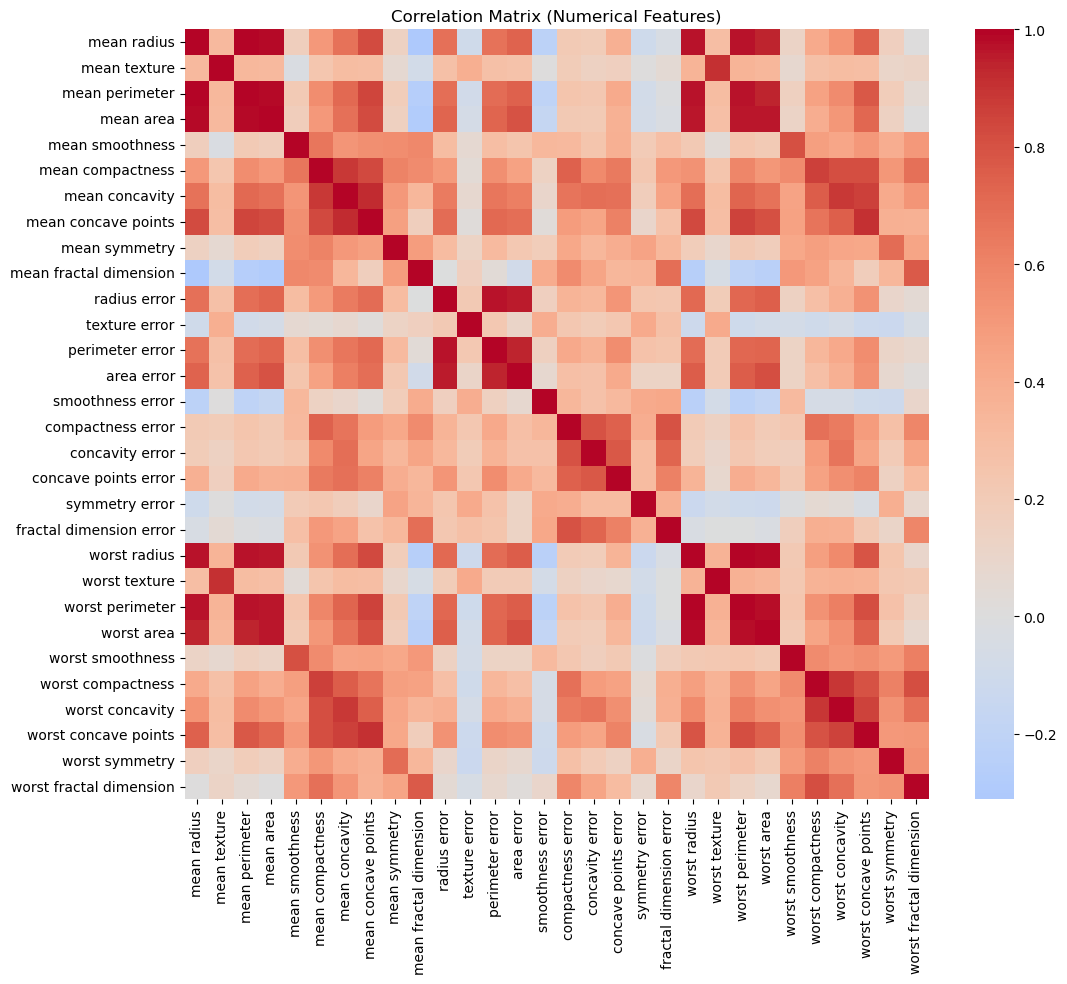

In [ ]:
corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [ ]:
quality_rows = []

for col in feature_cols:
    miss_ratio = df[col].isna().mean()
    s = df[col].dropna()
    outlier_ratio = iqr_outlier_mask(s).mean()
    quality_rows.append({
        "feature": col,
        "dtype": df[col].dtype,
        "missing_ratio": miss_ratio,
        "outlier_ratio": outlier_ratio
    })

quality_df = pd.DataFrame(quality_rows)
display(quality_df.sort_values("missing_ratio", ascending=False))

feature    dtype  missing_ratio  outlier_ratio
0               mean radius  float64            0.0       0.024605
1              mean texture  float64            0.0       0.012302
2            mean perimeter  float64            0.0       0.022847
3                 mean area  float64            0.0       0.043937
4           mean smoothness  float64            0.0       0.010545
5          mean compactness  float64            0.0       0.028120
6            mean concavity  float64            0.0       0.031634
7       mean concave points  float64            0.0       0.017575
8             mean symmetry  float64            0.0       0.026362
9    mean fractal dimension  float64            0.0       0.026362
10             radius error  float64            0.0       0.066784
11            texture error  float64            0.0       0.035149
12          perimeter error  float64            0.0       0.066784
13               area error  float64            0.0       0.114236
14         smoothness error  float64            0.0       0.052724
15        compactness error  float64            0.0       0.049209
16          concavity error  float64            0.0       0.038664
17     concave points error  float64            0.0       0.033392
18           symmetry error  float64            0.0       0.047452
19  fractal dimension error  float64            0.0       0.049209
20             worst radius  float64            0.0       0.029877
21            worst texture  float64            0.0       0.008787
22          worst perimeter  float64            0.0       0.026362
23               worst area  float64            0.0       0.061511
24         worst smoothness  float64            0.0       0.012302
25        worst compactness  float64            0.0       0.028120
26          worst concavity  float64            0.0       0.021090
27     worst concave points  float64            0.0       0.000000
28           worst symmetry  float64            0.0       0.040422
29  worst fractal dimension  float64            0.0       0.042179

In [ ]:
X = df[feature_cols].copy()   # 30 numeric features
y = df[TARGET_COL]            # 'malignant'/'benign'

# Encode target to 0/1 for models
le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)    # malignant/benign -> 0/1
print("Classes:", le_y.classes_)

Classes: ['benign' 'malignant']


In [ ]:
# 1) Drop high-missing columns (not needed here but generic)
HIGH_MISS_THRESH = 0.9
high_missing = quality_df[quality_df["missing_ratio"] > HIGH_MISS_THRESH]["feature"].tolist()
print("High missing columns:", high_missing)

X.drop(columns=high_missing, inplace=True)
num_cols = [c for c in num_cols if c not in high_missing]

# 2) Drop constant columns (variance == 0)
vt = VarianceThreshold(threshold=0.0)
vt.fit(X)

constant_cols = [c for c, keep in zip(X.columns, vt.get_support()) if not keep]
print("Constant columns:", constant_cols)

X.drop(columns=constant_cols, inplace=True)
num_cols = [c for c in num_cols if c not in constant_cols]

print("Shape after cleaning:", X.shape)

High missing columns: []
Constant columns: []
Shape after cleaning: (569, 30)


In [ ]:
print(X.isna().sum())
print (X.shape)
print (y.shape)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
(569, 30)
(569,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X_fs: feature dataframe
# y: target labels (Series or array)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Export to CSV
X_train.to_csv("wdbc/X_train_data.csv", index=False)
X_test.to_csv("wdbc/X_test_data.csv", index=False)

pd.DataFrame(y_train, columns=["label"]).to_csv("wdbc/y_train_data.csv", index=False)
pd.DataFrame(y_test, columns=["label"]).to_csv("wdbc/y_test_data.csv", index=False)

print("✓ Stratified 80/20 splits exported successfully")




✓ Stratified 80/20 splits exported successfully


In [ ]:
K = min(20, X.shape[1])  # we’ll select top 20 for inspection

selector_anova = SelectKBest(score_func=f_classif, k=K)
selector_anova.fit(X, y_enc)

anova_scores = pd.DataFrame({
    "feature": X.columns,
    "score": selector_anova.scores_
}).sort_values("score", ascending=False)

print("Top ANOVA features:")
display(anova_scores.head(20))

Top ANOVA features:


feature       score
27  worst concave points  964.385393
22       worst perimeter  897.944219
7    mean concave points  861.676020
20          worst radius  860.781707
2         mean perimeter  697.235272
23            worst area  661.600206
0            mean radius  646.981021
3              mean area  573.060747
6         mean concavity  533.793126
26       worst concavity  436.691939
5       mean compactness  313.233079
25     worst compactness  304.341063
10          radius error  268.840327
12       perimeter error  253.897392
13            area error  243.651586
21         worst texture  149.596905
24      worst smoothness  122.472880
28        worst symmetry  118.860232
1           mean texture  118.096059
17  concave points error  113.262760

In [ ]:
mi_scores = mutual_info_classif(X, y_enc, discrete_features=False, random_state=42)

mi_df = pd.DataFrame({
    "feature": X.columns,
    "mi": mi_scores
}).sort_values("mi", ascending=False)

print("Top Mutual Information features:")
display(mi_df.head(20))

Top Mutual Information features:


feature        mi
22       worst perimeter  0.471842
23            worst area  0.464313
20          worst radius  0.451230
7    mean concave points  0.438806
27  worst concave points  0.436255
2         mean perimeter  0.402361
6         mean concavity  0.375447
0            mean radius  0.362276
3              mean area  0.360023
13            area error  0.340759
26       worst concavity  0.315259
12       perimeter error  0.275614
10          radius error  0.249301
25     worst compactness  0.225211
5       mean compactness  0.213439
17  concave points error  0.125415
21         worst texture  0.120331
16       concavity error  0.117440
1           mean texture  0.096540
24      worst smoothness  0.095697

RandomForest feature importance (top 20):


feature  importance
22       worst perimeter    0.147590
23            worst area    0.137287
27  worst concave points    0.120906
7    mean concave points    0.096243
20          worst radius    0.071551
2         mean perimeter    0.050775
6         mean concavity    0.048627
0            mean radius    0.047795
3              mean area    0.047010
26       worst concavity    0.039822
13            area error    0.028399
21         worst texture    0.016962
10          radius error    0.016836
5       mean compactness    0.015654
25     worst compactness    0.014856
1           mean texture    0.014405
24      worst smoothness    0.013451
28        worst symmetry    0.008514
12       perimeter error    0.007886
4        mean smoothness    0.007010

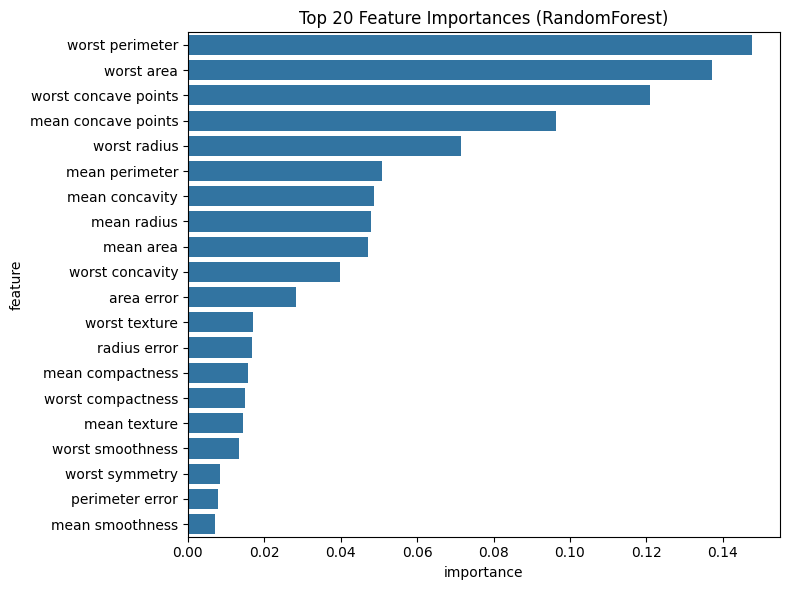

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y_enc)

importances = rf.feature_importances_

fi_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("RandomForest feature importance (top 20):")
display(fi_df.head(20))

plt.figure(figsize=(8, 6))
sns.barplot(x="importance", y="feature", data=fi_df.head(20))
plt.title("Top 20 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

In [ ]:
perm = permutation_importance(
    rf, X, y_enc,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    "feature": X.columns,
    "perm_importance_mean": perm.importances_mean,
    "perm_importance_std": perm.importances_std
}).sort_values("perm_importance_mean", ascending=False)

print("Permutation importance (top 20):")
display(perm_df.head(20))

Permutation importance (top 20):


feature  perm_importance_mean  perm_importance_std
21           worst texture              0.002460             0.000861
1             mean texture              0.002285             0.000805
7      mean concave points              0.002109             0.001054
13              area error              0.001582             0.000527
23              worst area              0.001230             0.000805
10            radius error              0.001054             0.000861
27    worst concave points              0.001054             0.000861
5         mean compactness              0.000000             0.000000
3                mean area              0.000000             0.000000
6           mean concavity              0.000000             0.000000
9   mean fractal dimension              0.000000             0.000000
4          mean smoothness              0.000000             0.000000
2           mean perimeter              0.000000             0.000000
0              mean radius              0.000000             0.000000
12         perimeter error              0.000000             0.000000
11           texture error              0.000000             0.000000
8            mean symmetry              0.000000             0.000000
14        smoothness error              0.000000             0.000000
17    concave points error              0.000000             0.000000
18          symmetry error              0.000000             0.000000

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

rfecv.fit(X, y_enc)

print("Optimal number of features:", rfecv.n_features_)

rfecv_support = pd.DataFrame({
    "feature": X.columns,
    "selected": rfecv.support_,
    "ranking": rfecv.ranking_
}).sort_values("ranking", ascending=True)

print("RFECV selected features:")
display(rfecv_support[rfecv_support["selected"] == True])


Optimal number of features: 15
RFECV selected features:


feature  selected  ranking
0            mean radius      True        1
1           mean texture      True        1
2         mean perimeter      True        1
3              mean area      True        1
7    mean concave points      True        1
6         mean concavity      True        1
13            area error      True        1
23            worst area      True        1
24      worst smoothness      True        1
25     worst compactness      True        1
26       worst concavity      True        1
27  worst concave points      True        1
20          worst radius      True        1
21         worst texture      True        1
22       worst perimeter      True        1

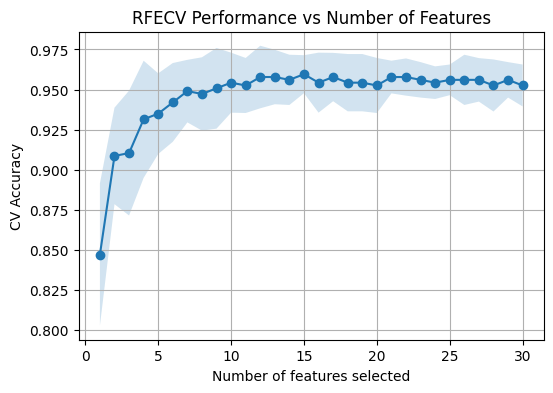

In [ ]:
scores = rfecv.cv_results_["mean_test_score"]
stds = rfecv.cv_results_["std_test_score"]

plt.figure(figsize=(6, 4))

plt.plot(range(1, len(scores)+1), scores, marker="o")
plt.fill_between(
    range(1, len(scores)+1),
    scores - stds,
    scores + stds,
    alpha=0.2
)

plt.xlabel("Number of features selected")
plt.ylabel("CV Accuracy")
plt.title("RFECV Performance vs Number of Features")
plt.grid(True)
plt.show()

In [ ]:
corr_matrix = X.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

correlated_features = [
    column for column in upper.columns
    if any(upper[column] > 0.95)  # very strong correlation
]

print("Highly correlated features (candidate to drop):")
print(correlated_features)

Highly correlated features (candidate to drop):
['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']


In [ ]:
TOP_N = 15

top_important = fi_df.head(TOP_N)["feature"].tolist()
selected_rfecv = rfecv_support[rfecv_support["selected"] == True]["feature"].tolist()

# Union or intersection depending on how strict you want to be.
# Union:
final_features = list(set(top_important) | set(selected_rfecv))

print("Final selected features:")
print(final_features)

X_BC_final = X[final_features].copy()
y_BC = y_enc.copy()
print("X_BC_final shape:", X_BC_final.shape)

Final selected features:
['ALT', 'ALP', 'Sex', 'ALB', 'CHOL', 'CHE', 'CREA', 'GGT', 'Age', 'AST', 'BIL', 'PROT']
X_BC_final shape: (615, 12)


## Sms Spam Collection
OUTPUT: X_SMS **__________** y_SMS

In [176]:
df = pd.read_csv(
    "datasets_raw/sms+spam+collection/SMSSpamCollection",
    sep="\t",
    header=None,
    names=["label", "text"]
)

df.head()

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [177]:
print("Shape:", df.shape)
df.info()
df.head()

Shape: (5572, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

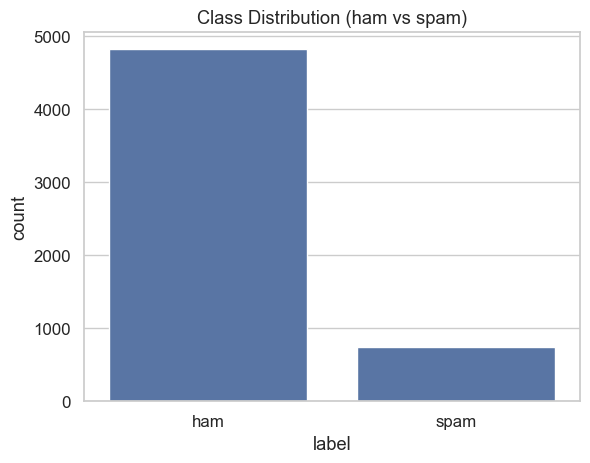

In [178]:
df["label"].value_counts(normalize=True)

sns.countplot(x=df["label"])
plt.title("Class Distribution (ham vs spam)")
plt.show()

In [179]:
df.isna().sum()

label    0
text     0
dtype: int64

In [180]:
df["text_len"] = df["text"].apply(len)
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

df[["text_len", "word_count"]].describe()

text_len   word_count
count  5572.000000  5572.000000
mean     80.489950    15.597452
std      59.942907    11.404053
min       2.000000     1.000000
25%      36.000000     7.000000
50%      62.000000    12.000000
75%     122.000000    23.000000
max     910.000000   171.000000

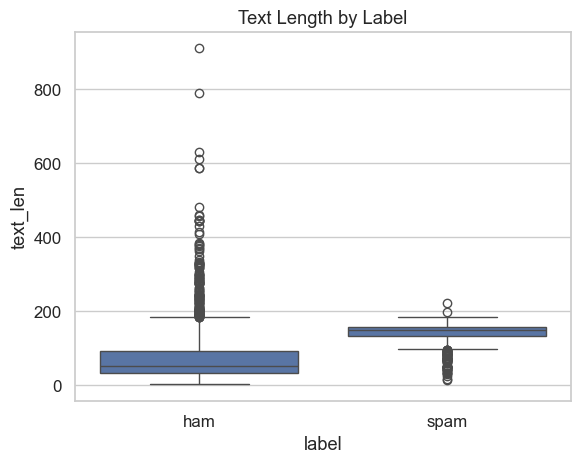

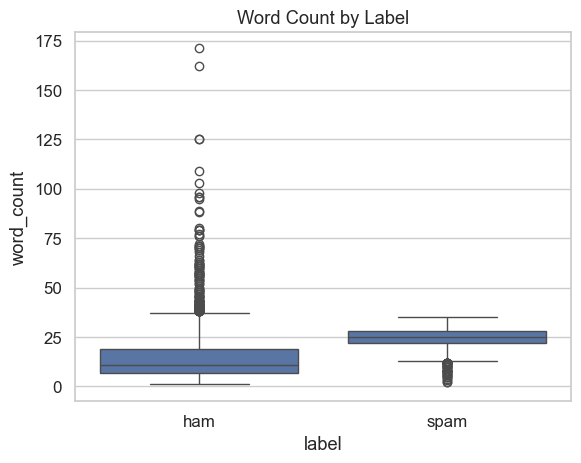

In [181]:
sns.boxplot(x="label", y="text_len", data=df)
plt.title("Text Length by Label")
plt.show()

sns.boxplot(x="label", y="word_count", data=df)
plt.title("Word Count by Label")
plt.show()

In [184]:
all_words = " ".join(df["text"]).lower().split()
Counter(all_words).most_common(20)

[('to', 2237),
 ('i', 2217),
 ('you', 1921),
 ('a', 1433),
 ('the', 1329),
 ('u', 998),
 ('and', 968),
 ('is', 869),
 ('in', 859),
 ('my', 755),
 ('for', 704),
 ('your', 677),
 ('of', 614),
 ('me', 611),
 ('have', 571),
 ('call', 559),
 ('on', 521),
 ('are', 487),
 ('that', 470),
 ('it', 466)]

In [185]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000,   # limit vocabulary
    ngram_range=(1,2)    # include bigrams → very useful for spam
)

X_tfidf = tfidf.fit_transform(df["text"])
y = df["label"]

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (5572, 5000)


In [186]:
le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)

In [187]:
K = 50  # select top 50 most informative words/bigrams

chi_selector = SelectKBest(chi2, k=K)
chi_selector.fit(X_tfidf, y_enc)

chi_scores = chi_selector.scores_
chi_features = np.array(tfidf.get_feature_names_out())

chi_df = pd.DataFrame({
    "feature": chi_features,
    "chi2_score": chi_scores
}).sort_values("chi2_score", ascending=False)

chi_df.head(20)

feature  chi2_score
996        claim  118.297731
4482         txt  115.563802
2774      mobile  101.683153
3509       prize  100.521703
1662        free  100.301203
4924         www   97.046240
4513          uk   89.473503
133         150p   77.626463
4113        stop   70.997398
3864     service   68.747038
147           18   63.318267
4413        tone   59.127009
4595      urgent   59.045595
2955       nokia   58.148078
252           50   57.995983
3667       reply   56.711253
1906  guaranteed   55.998182
145           16   54.740926
911         cash   52.898551
4826         win   52.339564

In [188]:
mi_selector = SelectKBest(mutual_info_classif, k=K)
mi_selector.fit(X_tfidf, y_enc)

mi_scores = mi_selector.scores_

mi_df = pd.DataFrame({
    "feature": chi_features,
    "mutual_info": mi_scores
}).sort_values("mutual_info", ascending=False)

mi_df.head(20)

feature  mutual_info
1662     free     0.065810
4482      txt     0.057698
4551       ur     0.046970
2774   mobile     0.042495
4276     text     0.041467
996     claim     0.040233
4113     stop     0.038740
4924      www     0.036439
2263     just     0.036014
3667    reply     0.035446
3509    prize     0.031060
3832     send     0.028755
4870      won     0.028478
2922      new     0.026567
133      150p     0.026149
4513       uk     0.025797
911      cash     0.024555
4826      win     0.022963
4595   urgent     0.022939
1108  contact     0.020820

In [189]:
X_small = X_tfidf[:, :300].toarray()  # take first 300 features
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_small, y_enc)

rf_importances = rf.feature_importances_

rf_df = pd.DataFrame({
    "feature": chi_features[:300],
    "importance": rf_importances
}).sort_values("importance", ascending=False)

rf_df.head(20)

feature  importance
133         150p    0.078847
252           50    0.070416
145           16    0.061264
147           18    0.048198
82           100    0.043121
258          500    0.038542
89          1000    0.033875
264         5000    0.018602
142       150ppm    0.018127
294          750    0.017642
3            000    0.016687
98           10p    0.016375
25   08000839402    0.015385
78            10    0.014998
154          1st    0.014731
182          250    0.014538
186          25p    0.013052
127          150    0.011843
163          200    0.011289
165         2000    0.011241

In [190]:
top_chi = chi_df.head(50)["feature"].tolist()
top_mi = mi_df.head(50)["feature"].tolist()

final_tokens = list(set(top_chi + top_mi))
len(final_tokens), final_tokens[:10]

(67,
 ['txt',
  'prize',
  '800',
  'award',
  'phone',
  'stop',
  'number',
  'draw',
  'box',
  'guaranteed'])

In [191]:
tfidf_final = TfidfVectorizer(
    vocabulary=final_tokens,
    stop_words="english",
    ngram_range=(1,2)
)

X_SMS_final = tfidf_final.fit_transform(df["text"])
y_SMS = y_enc.copy()
print("Final X_SMS shape:", X_SMS_final.shape)

Final X_SMS shape: (5572, 67)


## Car Evaluation
OUTPUT: X_Car **__________** y_Car

In [192]:
columns = [
    "buying", 
    "maint", 
    "doors", 
    "persons", 
    "lug_boot", 
    "safety",
    "class"
]

df = pd.read_csv("datasets_raw/car+evaluation/car.data", header=None, names=columns)

df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [193]:
print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (1728, 7)


buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [194]:
feature_cols = df.columns.drop("class").tolist()

cat_cols = feature_cols
num_cols = []
dt_cols = []

pd.DataFrame({
    "feature": feature_cols,
    "dtype": df[feature_cols].dtypes,
    "unique_values": [df[c].nunique() for c in feature_cols]
})

feature   dtype  unique_values
buying      buying  object              4
maint        maint  object              4
doors        doors  object              4
persons    persons  object              3
lug_boot  lug_boot  object              3
safety      safety  object              3

In [195]:
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


--- buying ---
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

--- maint ---
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

--- doors ---
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

--- persons ---
persons
2       576
4       576
more    576
Name: count, dtype: int64

--- lug_boot ---
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

--- safety ---
safety
low     576
med     576
high    576
Name: count, dtype: int64


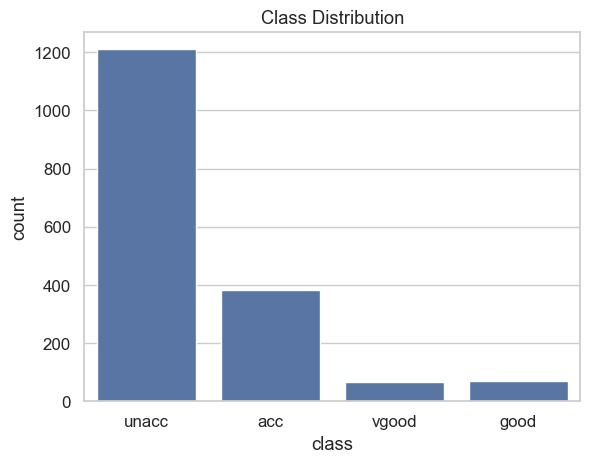

In [196]:
df["class"].value_counts(normalize=True)

sns.countplot(x=df["class"])
plt.title("Class Distribution")
plt.show()

In [197]:
missing = df.isna().sum()
missing

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [198]:
cardinality = pd.DataFrame({
    "feature": cat_cols,
    "unique_values": [df[c].nunique() for c in cat_cols]
})
display(cardinality)

feature  unique_values
0    buying              4
1     maint              4
2     doors              4
3   persons              3
4  lug_boot              3
5    safety              3

In [199]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [200]:
X_cat = df_encoded[cat_cols]
y_cat = df_encoded["class"]

chi_selector = SelectKBest(chi2, k="all")
chi_selector.fit(X_cat, y_cat)

chi_scores = pd.DataFrame({
    "feature": cat_cols,
    "chi2_score": chi_selector.scores_
}).sort_values("chi2_score", ascending=False)

chi_scores

feature  chi2_score
3   persons  178.041521
5    safety   72.963169
4  lug_boot   34.263782
1     maint   10.307863
2     doors    6.893969
0    buying    6.547420

In [201]:
mi_scores = mutual_info_classif(X_cat, y_cat, discrete_features=True)

mi_df = pd.DataFrame({
    "feature": cat_cols,
    "mutual_info": mi_scores
}).sort_values("mutual_info", ascending=False)

mi_df

feature  mutual_info
5    safety     0.181732
3   persons     0.152259
0    buying     0.066853
1     maint     0.051088
4  lug_boot     0.020800
2     doors     0.003109

In [202]:
X = df[cat_cols].copy()
y = df["class"]

# Encode X
X_encoded = X.copy()
label_encoders = {}

for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode y
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [203]:
vt = VarianceThreshold(threshold=0.0)  # detect constant features
vt.fit(X_encoded)

constant_cols = [c for c, keep in zip(X_encoded.columns, vt.get_support()) if not keep]
constant_cols

[]

In [204]:
rf = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    n_jobs=-1
)
rf.fit(X_encoded, y_encoded)

fi_df = pd.DataFrame({
    "feature": X_encoded.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi_df

feature  importance
5    safety    0.280542
3   persons    0.229694
0    buying    0.189631
1     maint    0.161004
4  lug_boot    0.080620
2     doors    0.058509

In [205]:
perm = permutation_importance(
    rf, 
    X_encoded, 
    y_encoded,
    n_repeats=10, 
    random_state=42,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    "feature": X_encoded.columns,
    "perm_importance_mean": perm.importances_mean,
    "perm_importance_std": perm.importances_std
}).sort_values("perm_importance_mean", ascending=False)

perm_df

feature  perm_importance_mean  perm_importance_std
5    safety              0.272049             0.005218
3   persons              0.210590             0.010148
0    buying              0.191956             0.003795
1     maint              0.171875             0.008270
4  lug_boot              0.109606             0.005806
2     doors              0.047454             0.003344

In [206]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

rfecv.fit(X_encoded, y_encoded)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                       random_state=42),
      n_jobs=-1, scoring='accuracy')

In [207]:
rfecv.n_features_

np.int64(6)

In [208]:
rfecv_features = [
    f for f, keep in zip(X_encoded.columns, rfecv.support_) if keep
]
rfecv_features

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

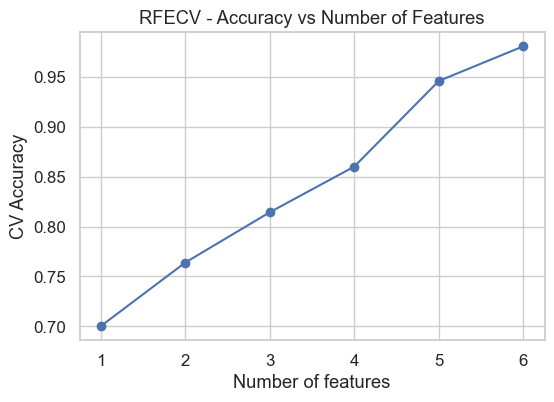

In [209]:
scores = rfecv.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
plt.plot(range(1, len(scores)+1), scores, marker="o")
plt.xlabel("Number of features")
plt.ylabel("CV Accuracy")
plt.title("RFECV - Accuracy vs Number of Features")
plt.grid(True)
plt.show()

In [210]:
# Let's combine: top 4 features by RF importance + RFECV selection
top_features = fi_df.head(4)["feature"].tolist()

final_features = list(set(top_features) | set(rfecv_features))
final_features

['safety', 'persons', 'doors', 'maint', 'buying', 'lug_boot']

In [211]:
X_Car = X_encoded[final_features]
y_Car = y_encoded

print("Final shape:", X_Car.shape)

Final shape: (1728, 6)


## Communities And Crime
OUTPUT: X_CAC **__________** y_CAC

In [212]:
names_path = "datasets_raw/communities+and+crime/communities.names"

with open(names_path, "r") as f:
    lines = f.readlines()

# lines that define attributes
attr_lines = [l for l in lines if l.lower().startswith("@attribute")]

colnames = []
for line in attr_lines:
    parts = line.strip().split()
    if len(parts) >= 2:
        colnames.append(parts[1])

len(colnames), colnames[:10]

(128,
 ['state',
  'county',
  'community',
  'communityname',
  'fold',
  'population',
  'householdsize',
  'racepctblack',
  'racePctWhite',
  'racePctAsian'])

In [215]:
data_path = "datasets_raw/communities+and+crime/communities.data"

df = pd.read_csv(
    data_path,
    header=None,
    names=colnames,
    na_values="?"
)

df.head()

state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45        NaN            NaN                  NaN   
2     0.21            0.02        NaN            NaN                  NaN   
3     0.39            0.28        NaN            NaN                  NaN   
4     0.09            0.02        NaN            NaN                  NaN   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                  NaN                 0.00              NaN   
2                  NaN                 0.00              NaN   
3                  NaN                 0.00              NaN   
4                  NaN                 0.00              NaN   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  

[5 rows x 128 columns]

In [216]:
print("Shape:", df.shape)
df.info()

Shape: (1994, 128)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB


In [217]:
TARGET_COL = "ViolentCrimesPerPop"

id_cols = ["state", "county", "community", "communityname", "fold"]
id_cols = [c for c in id_cols if c in df.columns]

feature_cols = [c for c in df.columns if c not in id_cols + [TARGET_COL]]

print("ID cols:", id_cols)
print("Features:", len(feature_cols))

ID cols: ['state', 'county', 'community', 'communityname', 'fold']
Features: 122


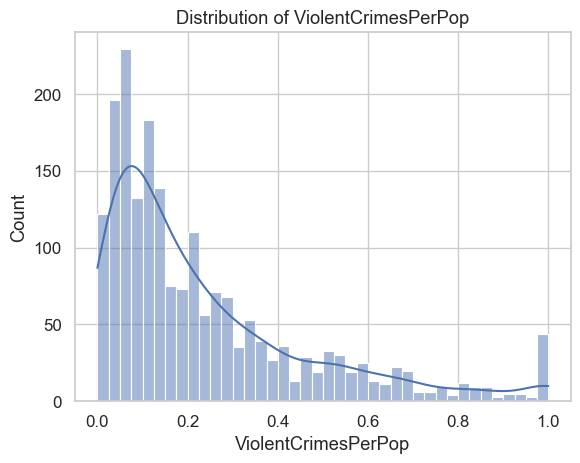

In [218]:
y = df[TARGET_COL]

y.describe()
sns.histplot(y, bins=40, kde=True)
plt.title("Distribution of ViolentCrimesPerPop")
plt.show()

In [219]:
missing_counts = df[feature_cols + [TARGET_COL]].isna().sum()
missing_ratio = df[feature_cols + [TARGET_COL]].isna().mean()

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_ratio": missing_ratio
}).sort_values("missing_ratio", ascending=False)

missing_table.head(20)

missing_count  missing_ratio
PolicAveOTWorked               1675        0.84002
LemasTotalReq                  1675        0.84002
LemasSwFTFieldPerPop           1675        0.84002
PctPolicWhite                  1675        0.84002
RacialMatchCommPol             1675        0.84002
LemasSwFTPerPop                1675        0.84002
LemasSwFTFieldOps              1675        0.84002
PolicReqPerOffic               1675        0.84002
LemasTotReqPerPop              1675        0.84002
LemasSwornFT                   1675        0.84002
PolicPerPop                    1675        0.84002
PolicBudgPerPop                1675        0.84002
LemasGangUnitDeploy            1675        0.84002
LemasPctPolicOnPatr            1675        0.84002
PolicCars                      1675        0.84002
PolicOperBudg                  1675        0.84002
PctPolicMinor                  1675        0.84002
PctPolicAsian                  1675        0.84002
PctPolicHisp                   1675        0.84002
OfficAssgnDrugUnits            1675        0.84002

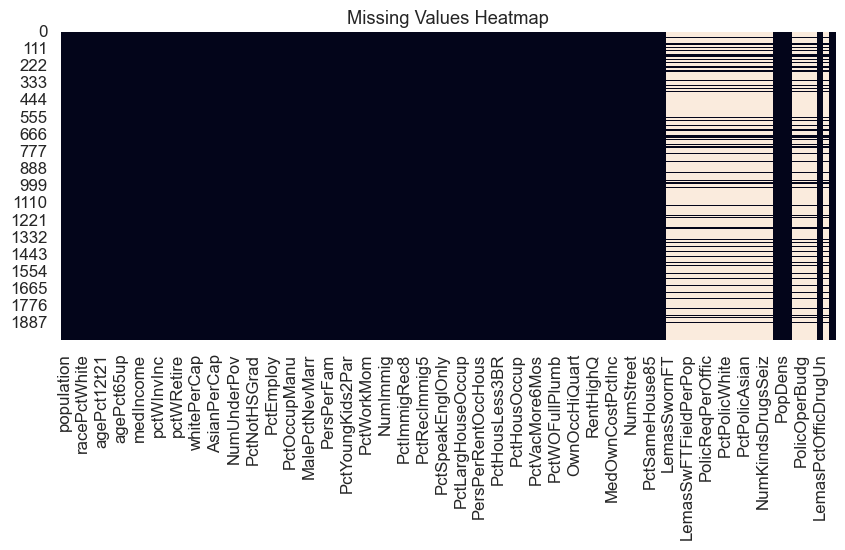

In [220]:
plt.figure(figsize=(10,4))
sns.heatmap(df[feature_cols + [TARGET_COL]].isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [221]:
df[feature_cols].describe().T.head(15)

count      mean       std  min   25%   50%   75%  max
population     1994.0  0.057593  0.126906  0.0  0.01  0.02  0.05  1.0
householdsize  1994.0  0.463395  0.163717  0.0  0.35  0.44  0.54  1.0
racepctblack   1994.0  0.179629  0.253442  0.0  0.02  0.06  0.23  1.0
racePctWhite   1994.0  0.753716  0.244039  0.0  0.63  0.85  0.94  1.0
racePctAsian   1994.0  0.153681  0.208877  0.0  0.04  0.07  0.17  1.0
racePctHisp    1994.0  0.144022  0.232492  0.0  0.01  0.04  0.16  1.0
agePct12t21    1994.0  0.424218  0.155196  0.0  0.34  0.40  0.47  1.0
agePct12t29    1994.0  0.493867  0.143564  0.0  0.41  0.48  0.54  1.0
agePct16t24    1994.0  0.336264  0.166505  0.0  0.25  0.29  0.36  1.0
agePct65up     1994.0  0.423164  0.179185  0.0  0.30  0.42  0.53  1.0
numbUrban      1994.0  0.064072  0.128256  0.0  0.00  0.03  0.07  1.0
pctUrban       1994.0  0.696269  0.444811  0.0  0.00  1.00  1.00  1.0
medIncome      1994.0  0.361123  0.209362  0.0  0.20  0.32  0.49  1.0
pctWWage       1994.0  0.558154  0.182913  0.0  0.44  0.56  0.69  1.0
pctWFarmSelf   1994.0  0.291570  0.204108  0.0  0.16  0.23  0.37  1.0

In [222]:
corr_with_target = df[feature_cols + [TARGET_COL]].corr()[TARGET_COL] \
                     .drop(TARGET_COL) \
                     .sort_values(ascending=False)

corr_with_target.head(20), corr_with_target.tail(20)

(PctIlleg            0.737957
 racepctblack        0.631264
 pctWPubAsst         0.574665
 FemalePctDiv        0.556032
 TotalPctDiv         0.552777
 PctPolicBlack       0.543545
 MalePctDivorce      0.525407
 PctPopUnderPov      0.521877
 PctUnemployed       0.504235
 PctHousNoPhone      0.488243
 PctPolicMinor       0.486581
 PctNotHSGrad        0.483366
 PctVacantBoarded    0.482816
 PctHousLess3BR      0.474490
 NumIlleg            0.471028
 PctPersDenseHous    0.452901
 NumUnderPov         0.447582
 HousVacant          0.421396
 PctLess9thGrade     0.411096
 PctLargHouseFam     0.383480
 Name: ViolentCrimesPerPop, dtype: float64,
 pctWWage             -0.305500
 PctBSorMore          -0.314675
 PctHousOccup         -0.319010
 LemasSwFTFieldOps    -0.330366
 PctEmploy            -0.331643
 PctOccupMgmtProf     -0.339109
 perCapInc            -0.352085
 MedNumBR             -0.357385
 medIncome            -0.424221
 medFamInc            -0.439108
 PctPolicWhite        -0.443625
 Rac

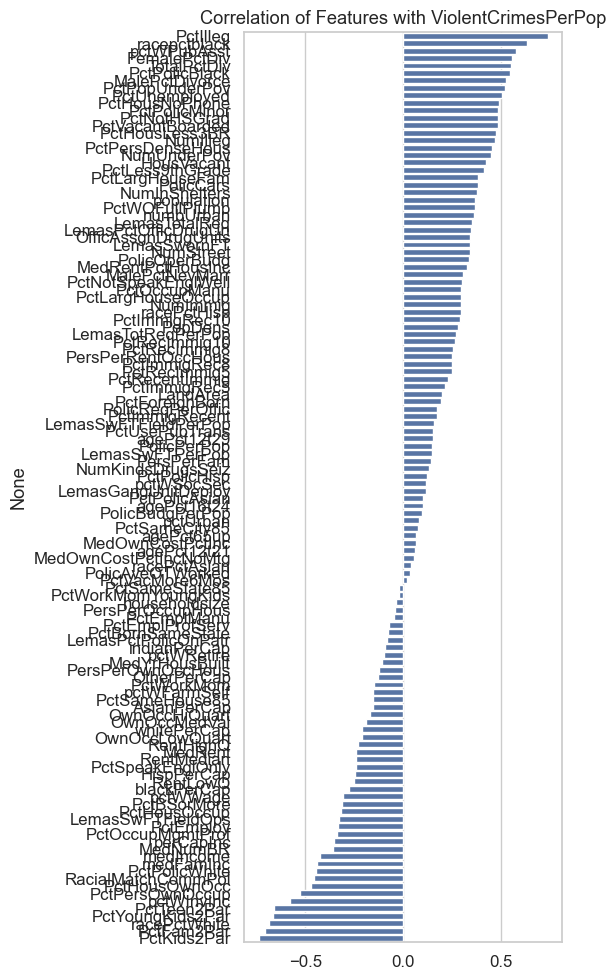

In [223]:
plt.figure(figsize=(6,10))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index
)
plt.title("Correlation of Features with ViolentCrimesPerPop")
plt.tight_layout()
plt.show()

In [224]:
MISS_THRESH = 0.5
high_miss = missing_table[missing_table["missing_ratio"] > MISS_THRESH].index.tolist()
print("High-missing columns:", high_miss)

feature_cols_clean = [c for c in feature_cols if c not in high_miss]
len(feature_cols), len(feature_cols_clean)

High-missing columns: ['PolicAveOTWorked', 'LemasTotalReq', 'LemasSwFTFieldPerPop', 'PctPolicWhite', 'RacialMatchCommPol', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'PolicReqPerOffic', 'LemasTotReqPerPop', 'LemasSwornFT', 'PolicPerPop', 'PolicBudgPerPop', 'LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'PolicCars', 'PolicOperBudg', 'PctPolicMinor', 'PctPolicAsian', 'PctPolicHisp', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PctPolicBlack']


(122, 100)

In [225]:
X = df[feature_cols_clean].copy()
y = df[TARGET_COL]

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# put back to DataFrame for convenience
X_imputed = pd.DataFrame(X_imputed, columns=feature_cols_clean)

In [226]:
vt = VarianceThreshold(threshold=0.0)
vt.fit(X_imputed)

constant_cols = [c for c, keep in zip(X_imputed.columns, vt.get_support()) if not keep]
constant_cols

[]

In [227]:
X_fs = X_imputed.drop(columns=constant_cols)
print("Shape after dropping constants:", X_fs.shape)

Shape after dropping constants: (1994, 100)


In [229]:
K = min(30, X_fs.shape[1])  # top 30 for inspection

selector_f = SelectKBest(score_func=f_regression, k=K)
selector_f.fit(X_fs, y)

f_scores = selector_f.scores_

f_df = pd.DataFrame({
    "feature": X_fs.columns,
    "f_score": f_scores
}).sort_values("f_score", ascending=False)

f_df.head(20)

feature      f_score
44       PctKids2Par  2388.618688
50          PctIlleg  2381.983200
43        PctFam2Par  1987.057310
3       racePctWhite  1758.772273
45  PctYoungKids2Par  1588.379860
46       PctTeen2Par  1550.531636
2       racepctblack  1319.686433
15        pctWInvInc   990.700975
17       pctWPubAsst   982.200468
40      FemalePctDiv   891.494025
41       TotalPctDiv   876.510086
67   PctPersOwnOccup   759.916937
38    MalePctDivorce   759.581937
28    PctPopUnderPov   745.599159
32     PctUnemployed   679.145660
77    PctHousNoPhone   623.483264
30      PctNotHSGrad   607.309325
74  PctVacantBoarded   605.507917
69    PctHousLess3BR   578.789198
49          NumIlleg   567.975360

In [230]:
mi_scores = mutual_info_regression(X_fs, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": X_fs.columns,
    "mutual_info": mi_scores
}).sort_values("mutual_info", ascending=False)

mi_df.head(20)

feature  mutual_info
44       PctKids2Par     0.483122
50          PctIlleg     0.430881
43        PctFam2Par     0.385243
3       racePctWhite     0.368141
49          NumIlleg     0.341039
46       PctTeen2Par     0.322411
45  PctYoungKids2Par     0.316776
15        pctWInvInc     0.291392
28    PctPopUnderPov     0.282752
40      FemalePctDiv     0.282432
27       NumUnderPov     0.277025
17       pctWPubAsst     0.273173
68  PctPersDenseHous     0.260086
41       TotalPctDiv     0.258386
2       racepctblack     0.236037
77    PctHousNoPhone     0.221369
38    MalePctDivorce     0.217008
67   PctPersOwnOccup     0.216298
19         medFamInc     0.204629
73     PctHousOwnOcc     0.203494

In [231]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_fs, y)

fi_df = pd.DataFrame({
    "feature": X_fs.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi_df.head(20)

feature  importance
50          PctIlleg    0.378665
44       PctKids2Par    0.161496
3       racePctWhite    0.030351
43        PctFam2Par    0.028681
49          NumIlleg    0.014566
68  PctPersDenseHous    0.012581
90         NumStreet    0.011478
71        HousVacant    0.009952
38    MalePctDivorce    0.009491
40      FemalePctDiv    0.009472
24       AsianPerCap    0.008709
69    PctHousLess3BR    0.008201
74  PctVacantBoarded    0.007343
2       racepctblack    0.006918
92  PctBornSameState    0.006829
15        pctWInvInc    0.006817
41       TotalPctDiv    0.006518
25       OtherPerCap    0.006393
48        PctWorkMom    0.006011
28    PctPopUnderPov    0.006003

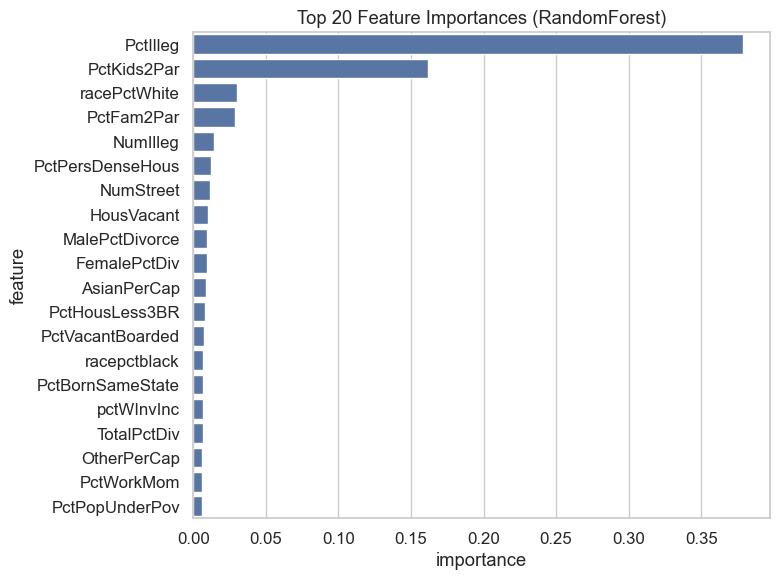

In [232]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="importance",
    y="feature",
    data=fi_df.head(20)
)
plt.title("Top 20 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

In [234]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

rfecv.fit(X_fs, y)

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                      random_state=42),
      n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
rfecv.n_features_

np.int64(53)

In [ ]:
rfecv_support = pd.DataFrame({
    "feature": X_fs.columns,
    "selected": rfecv.support_,
    "ranking": rfecv.ranking_,
})
selected_rfecv = rfecv_support[rfecv_support["selected"] == True]["feature"].tolist()
selected_rfecv

['racepctblack',
 'racePctWhite',
 'racePctHisp',
 'agePct12t21',
 'numbUrban',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'blackPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctUnemployed',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'MalePctDivorce',
 'FemalePctDiv',
 'TotalPctDiv',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'PctImmigRecent',
 'PctImmigRec10',
 'PctSpeakEnglOnly',
 'PctLargHouseFam',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctWOFullPlumb',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'PctForeignBorn',
 'PctBornSameState',
 'PctSameCity85',
 'PopDens',
 'PctUsePubTrans']

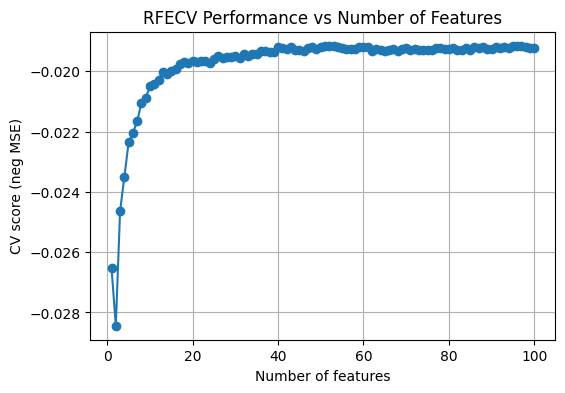

In [ ]:
scores = rfecv.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
plt.plot(range(1, len(scores)+1), scores, marker="o")
plt.xlabel("Number of features")
plt.ylabel("CV score (neg MSE)")
plt.title("RFECV Performance vs Number of Features")
plt.grid(True)
plt.show()

In [ ]:
TOP_N = 20
top_imp = fi_df.head(TOP_N)["feature"].tolist()

final_features = list(set(top_imp) | set(selected_rfecv))
print("Final feature count:", len(final_features))
print(final_features)

Final feature count: 53
['PctYoungKids2Par', 'pctWPubAsst', 'OtherPerCap', 'agePct12t21', 'MedOwnCostPctIncNoMtg', 'PctPopUnderPov', 'PctWorkMomYoungKids', 'PctPersOwnOccup', 'PctWorkMom', 'PctLargHouseFam', 'PersPerRentOccHous', 'PctVacMore6Mos', 'PctIlleg', 'MalePctDivorce', 'PctEmplProfServ', 'blackPerCap', 'PctUsePubTrans', 'FemalePctDiv', 'MedRentPctHousInc', 'PctSameCity85', 'racePctWhite', 'PctTeen2Par', 'NumStreet', 'PctHousLess3BR', 'PopDens', 'NumIlleg', 'pctWInvInc', 'TotalPctDiv', 'pctWFarmSelf', 'PctHousOccup', 'MedOwnCostPctInc', 'racepctblack', 'HispPerCap', 'pctWSocSec', 'PctSpeakEnglOnly', 'PctImmigRecent', 'numbUrban', 'PctEmplManu', 'PctBornSameState', 'AsianPerCap', 'PctKids2Par', 'HousVacant', 'PctOccupManu', 'PctForeignBorn', 'racePctHisp', 'PctVacantBoarded', 'PctPersDenseHous', 'PctImmigRec10', 'NumUnderPov', 'PctWOFullPlumb', 'PctUnemployed', 'PctFam2Par', 'MedYrHousBuilt']


In [ ]:
X_CAC = X_fs[final_features].copy()
y_CAC = y
print("X_CAC shape:", X_CAC.shape)

X_final shape: (1994, 53)


## Auto MPG
OUTPUT: X_MPG **__________** y_MPG

In [ ]:
path = "datasets_raw/auto+mpg/auto-mpg.data"

column_names = [
    "mpg",          # target
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
    "car_name"
]

df = pd.read_csv(
    path,
    delim_whitespace=True,
    names=column_names,
    na_values="?"
)

df.head()

C:\Users\AzizMaas1999\AppData\Local\Temp\ipykernel_21096\3449908174.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

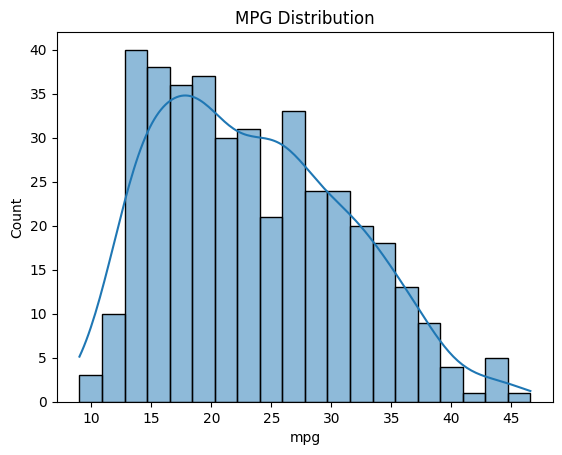

In [ ]:
sns.histplot(df["mpg"], bins=20, kde=True)
plt.title("MPG Distribution")
plt.show()

In [ ]:
df.describe().T

count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model_year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
horsepower     126.000   230.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model_year      79.000    82.0  
origin           2.000     3.0

In [ ]:
df["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [ ]:
df["car_name"].sample(10)

42             dodge monaco (sw)
359    peugeot 505s turbo diesel
344               plymouth champ
138    dodge coronet custom (sw)
279              honda accord lx
223        dodge monaco brougham
246             mazda glc deluxe
71               mazda rx2 coupe
224      mercury cougar brougham
365              ford granada gl
Name: car_name, dtype: object

In [ ]:
df = df.drop(columns=["car_name"])

In [ ]:
num_cols = ["cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]
TARGET_COL = "mpg"

In [ ]:
df["horsepower"] = df["horsepower"].astype(float)
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [ ]:
X = df[num_cols]
y = df[TARGET_COL]

In [ ]:
vt = VarianceThreshold(threshold=0.0)
vt.fit(X)

constant_cols = [c for c, keep in zip(X.columns, vt.get_support()) if not keep]
constant_cols

[]

In [ ]:
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X, y)

f_scores = selector_f.scores_

f_df = pd.DataFrame({
    "feature": X.columns,
    "f_score": f_scores
}).sort_values("f_score", ascending=False)

f_df

feature     f_score
3        weight  888.850683
1  displacement  724.994303
0     cylinders  597.077048
2    horsepower  589.638205
5    model_year  199.982008
6        origin  184.199639
4  acceleration   84.957700

In [ ]:
mi_scores = mutual_info_regression(X, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": X.columns,
    "mutual_info": mi_scores
}).sort_values("mutual_info", ascending=False)

mi_df

feature  mutual_info
1  displacement     0.783253
3        weight     0.772497
2    horsepower     0.723824
0     cylinders     0.600775
5    model_year     0.349687
6        origin     0.236581
4  acceleration     0.182686

In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

fi_df = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi_df

feature  importance
1  displacement    0.345210
3        weight    0.206975
0     cylinders    0.183033
5    model_year    0.125620
2    horsepower    0.103734
4  acceleration    0.028721
6        origin    0.006706

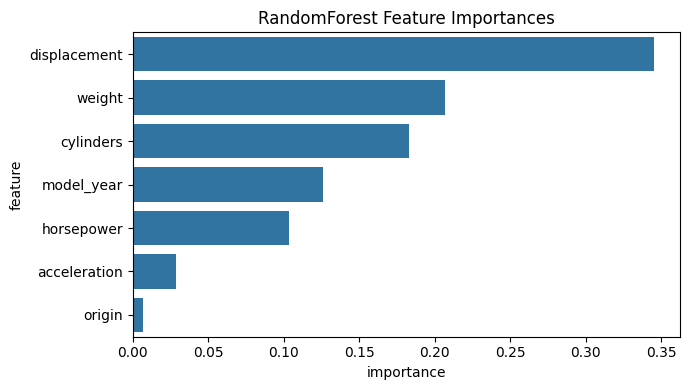

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("RandomForest Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

rfecv.fit(X, y)

print("Optimal number of features:", rfecv.n_features_)


Optimal number of features: 5


In [ ]:
select_df = pd.DataFrame({
    "feature": X.columns,
    "selected": rfecv.support_,
    "ranking": rfecv.ranking_
}).sort_values("ranking")

selected_features = select_df[select_df["selected"]]["feature"].tolist()
selected_features

['cylinders', 'displacement', 'horsepower', 'weight', 'model_year']

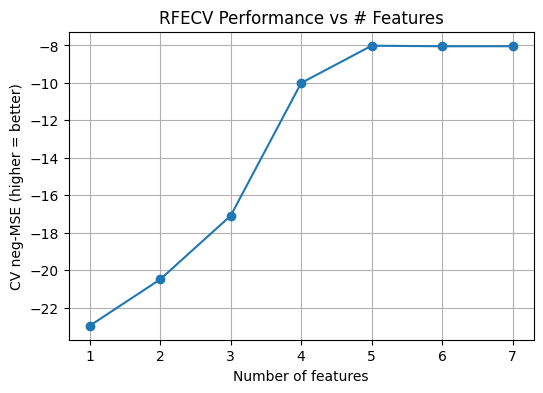

In [ ]:
scores = rfecv.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
plt.plot(range(1, len(scores)+1), scores, marker="o")
plt.xlabel("Number of features")
plt.ylabel("CV neg-MSE (higher = better)")
plt.title("RFECV Performance vs # Features")
plt.grid(True)
plt.show()

In [ ]:
TOP_N = 5
top_imp = fi_df.head(TOP_N)["feature"].tolist()

final_features = list(set(top_imp) | set(selected_features))
final_features

['displacement', 'horsepower', 'weight', 'cylinders', 'model_year']

In [ ]:
X_MPG = X[final_features]
y_MPG = y
X_MPG.head()

displacement  horsepower  weight  cylinders  model_year
0         307.0       130.0  3504.0          8          70
1         350.0       165.0  3693.0          8          70
2         318.0       150.0  3436.0          8          70
3         304.0       150.0  3433.0          8          70
4         302.0       140.0  3449.0          8          70

## Sonar
OUTPUT: X_Son **__________** y_Son

In [ ]:
path = "datasets_raw/Sonar/sonar.all-data.csv"

df = pd.read_csv(path, header=None)
df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   R  
3  0.0040  0.0117   R  
4  0.0107  0.0094   R  

[5 rows x 61 columns]

In [ ]:
feature_cols = [f"f{i}" for i in range(60)]
target_col = "label"

df.columns = feature_cols + [target_col]

In [ ]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      208 non-null    float64
 1   f1      208 non-null    float64
 2   f2      208 non-null    float64
 3   f3      208 non-null    float64
 4   f4      208 non-null    float64
 5   f5      208 non-null    float64
 6   f6      208 non-null    float64
 7   f7      208 non-null    float64
 8   f8      208 non-null    float64
 9   f9      208 non-null    float64
 10  f10     208 non-null    float64
 11  f11     208 non-null    float64
 12  f12     208 non-null    float64
 13  f13     208 non-null    float64
 14  f14     208 non-null    float64
 15  f15     208 non-null    float64
 16  f16     208 non-null    float64
 17  f17     208 non-null    float64
 18  f18     208 non-null    float64
 19  f19     208 non-null    float64
 20  f20     208 non-null    float64
 21  f21     208 non-null    float64
 22  f2

count      mean       std     min       25%      50%       75%     max
f0   208.0  0.029164  0.022991  0.0015  0.013350  0.02280  0.035550  0.1371
f1   208.0  0.038437  0.032960  0.0006  0.016450  0.03080  0.047950  0.2339
f2   208.0  0.043832  0.038428  0.0015  0.018950  0.03430  0.057950  0.3059
f3   208.0  0.053892  0.046528  0.0058  0.024375  0.04405  0.064500  0.4264
f4   208.0  0.075202  0.055552  0.0067  0.038050  0.06250  0.100275  0.4010
f5   208.0  0.104570  0.059105  0.0102  0.067025  0.09215  0.134125  0.3823
f6   208.0  0.121747  0.061788  0.0033  0.080900  0.10695  0.154000  0.3729
f7   208.0  0.134799  0.085152  0.0055  0.080425  0.11210  0.169600  0.4590
f8   208.0  0.178003  0.118387  0.0075  0.097025  0.15225  0.233425  0.6828
f9   208.0  0.208259  0.134416  0.0113  0.111275  0.18240  0.268700  0.7106
f10  208.0  0.236013  0.132705  0.0289  0.129250  0.22480  0.301650  0.7342
f11  208.0  0.250221  0.140072  0.0236  0.133475  0.24905  0.331250  0.7060
f12  208.0  0.273305  0.140962  0.0184  0.166125  0.26395  0.351250  0.7131
f13  208.0  0.296568  0.164474  0.0273  0.175175  0.28110  0.386175  0.9970
f14  208.0  0.320201  0.205427  0.0031  0.164625  0.28170  0.452925  1.0000
f15  208.0  0.378487  0.232650  0.0162  0.196300  0.30470  0.535725  0.9988
f16  208.0  0.415983  0.263677  0.0349  0.205850  0.30840  0.659425  1.0000
f17  208.0  0.452318  0.261529  0.0375  0.242075  0.36830  0.679050  1.0000
f18  208.0  0.504812  0.257988  0.0494  0.299075  0.43495  0.731400  1.0000
f19  208.0  0.563047  0.262653  0.0656  0.350625  0.54250  0.809325  1.0000
f20  208.0  0.609060  0.257818  0.0512  0.399725  0.61770  0.816975  1.0000
f21  208.0  0.624275  0.255883  0.0219  0.406925  0.66490  0.831975  1.0000
f22  208.0  0.646975  0.250175  0.0563  0.450225  0.69970  0.848575  1.0000
f23  208.0  0.672654  0.239116  0.0239  0.540725  0.69850  0.872175  1.0000
f24  208.0  0.675424  0.244926  0.0240  0.525800  0.72110  0.873725  1.0000
f25  208.0  0.699866  0.237228  0.0921  0.544175  0.75450  0.893800  1.0000
f26  208.0  0.702155  0.245657  0.0481  0.531900  0.74560  0.917100  1.0000
f27  208.0  0.694024  0.237189  0.0284  0.534775  0.73190  0.900275  1.0000
f28  208.0  0.642074  0.240250  0.0144  0.463700  0.68080  0.852125  1.0000
f29  208.0  0.580928  0.220749  0.0613  0.411400  0.60715  0.735175  1.0000
f30  208.0  0.504475  0.213992  0.0482  0.345550  0.49035  0.641950  0.9657
f31  208.0  0.439040  0.213237  0.0404  0.281400  0.42960  0.580300  0.9306
f32  208.0  0.417220  0.206513  0.0477  0.257875  0.39120  0.556125  1.0000
f33  208.0  0.403233  0.231242  0.0212  0.217575  0.35105  0.596125  0.9647
f34  208.0  0.392571  0.259132  0.0223  0.179375  0.31275  0.593350  1.0000
f35  208.0  0.384848  0.264121  0.0080  0.154350  0.32115  0.556525  1.0000
f36  208.0  0.363807  0.239912  0.0351  0.160100  0.30630  0.518900  0.9497
f37  208.0  0.339657  0.212973  0.0383  0.174275  0.31270  0.440550  1.0000
f38  208.0  0.325800  0.199075  0.0371  0.173975  0.28350  0.434900  0.9857
f39  208.0  0.311207  0.178662  0.0117  0.186450  0.27805  0.424350  0.9297
f40  208.0  0.289252  0.171111  0.0360  0.163100  0.25950  0.387525  0.8995
f41  208.0  0.278293  0.168728  0.0056  0.158900  0.24510  0.384250  0.8246
f42  208.0  0.246542  0.138993  0.0000  0.155200  0.22255  0.324525  0.7733
f43  208.0  0.214075  0.133291  0.0000  0.126875  0.17770  0.271750  0.7762
f44  208.0  0.197232  0.151628  0.0000  0.094475  0.14800  0.231550  0.7034
f45  208.0  0.160631  0.133938  0.0000  0.068550  0.12135  0.200375  0.7292
f46  208.0  0.122453  0.086953  0.0000  0.064250  0.10165  0.154425  0.5522
f47  208.0  0.091424  0.062417  0.0000  0.045125  0.07810  0.120100  0.3339
f48  208.0  0.051929  0.035954  0.0000  0.026350  0.04470  0.068525  0.1981
f49  208.0  0.020424  0.013665  0.0000  0.011550  0.01790  0.025275  0.0825
f50  208.0  0.016069  0.012008  0.0000  0.008425  0.01390  0.020825  0.1004
f51  208.0  0.013420  0.009634  0.0008  0.007275  0.0

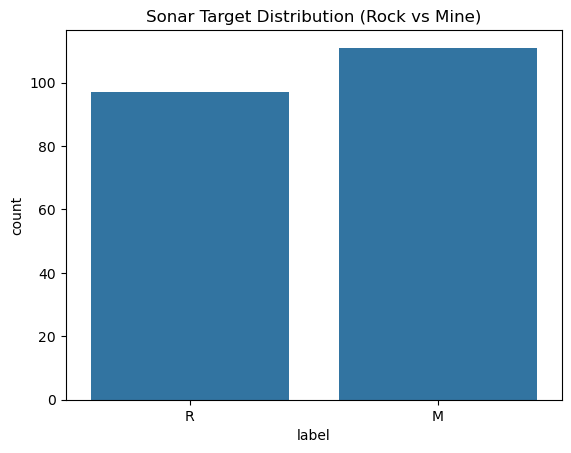

label
M    111
R     97
Name: count, dtype: int64


In [ ]:
sns.countplot(x=df["label"])
plt.title("Sonar Target Distribution (Rock vs Mine)")
plt.show()

print(df["label"].value_counts())

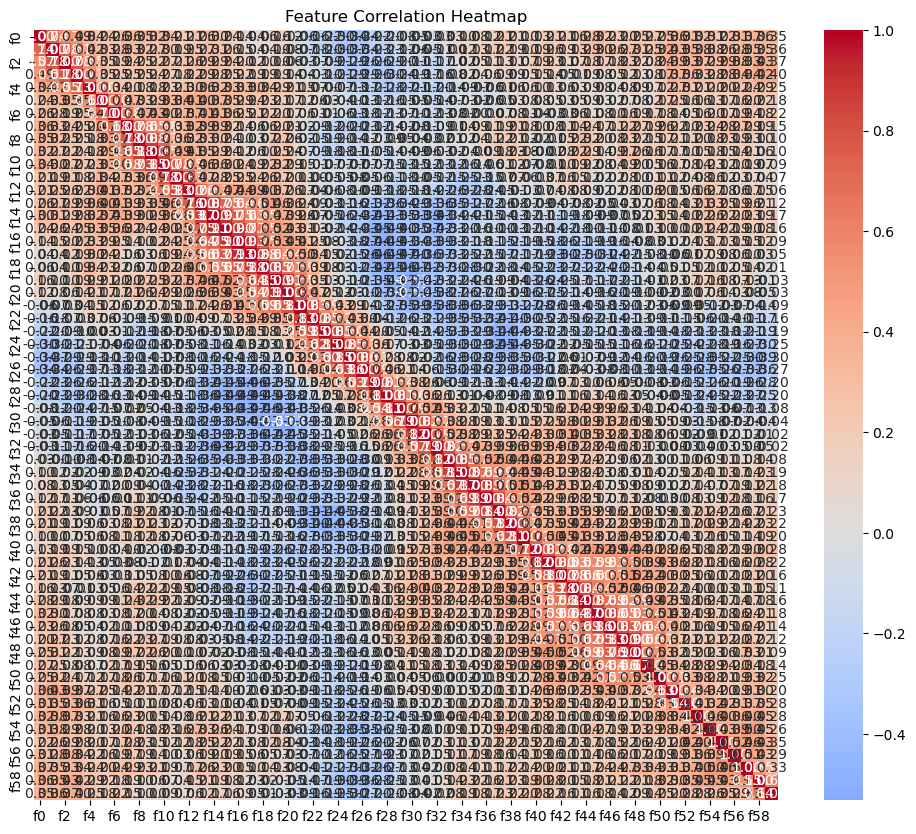

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df[feature_cols].corr(), cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df[target_col])  # R=0, M=1
print(le.classes_)

['M' 'R']


In [ ]:
X = df[feature_cols].copy()

In [ ]:
f_scores, f_p = f_classif(X, y)

f_df = pd.DataFrame({
    "feature": feature_cols,
    "f_score": f_scores
}).sort_values("f_score", ascending=False)

f_df.head(15)

feature    f_score
10     f10  47.495838
11     f11  37.457526
48     f48  29.004309
9       f9  27.131299
44     f44  26.820022
47     f47  25.060955
8       f8  23.738683
12     f12  22.343550
45     f45  21.221951
46     f46  20.627867
50     f50  19.375274
51     f51  18.723794
43     f43  16.691851
0       f0  16.418413
35     f35  16.088629

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X_fs: feature dataframe
# y: target labels (Series or array)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Export to CSV
X_train.to_csv("sonar/X_train_data.csv", index=False)
X_test.to_csv("sonar/X_test_data.csv", index=False)

pd.DataFrame(y_train, columns=["label"]).to_csv("sonar/y_train_data.csv", index=False)
pd.DataFrame(y_test, columns=["label"]).to_csv("sonar/y_test_data.csv", index=False)

print("✓ Stratified 80/20 splits exported successfully")




✓ Stratified 80/20 splits exported successfully


In [ ]:
mi = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": feature_cols,
    "mutual_info": mi
}).sort_values("mutual_info", ascending=False)

mi_df.head(15)

feature  mutual_info
11     f11     0.145189
10     f10     0.127620
48     f48     0.113976
47     f47     0.082531
8       f8     0.082168
57     f57     0.082005
9       f9     0.080410
36     f36     0.068126
45     f45     0.064315
7       f7     0.059254
38     f38     0.055195
19     f19     0.052309
20     f20     0.051527
24     f24     0.047814
32     f32     0.045238

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

fi_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi_df.head(15)

feature  importance
11     f11    0.060094
10     f10    0.059237
9       f9    0.037212
8       f8    0.036789
47     f47    0.034276
48     f48    0.033481
35     f35    0.029437
44     f44    0.027354
50     f50    0.025559
51     f51    0.025499
46     f46    0.024872
12     f12    0.023164
45     f45    0.019892
36     f36    0.019698
20     f20    0.019542

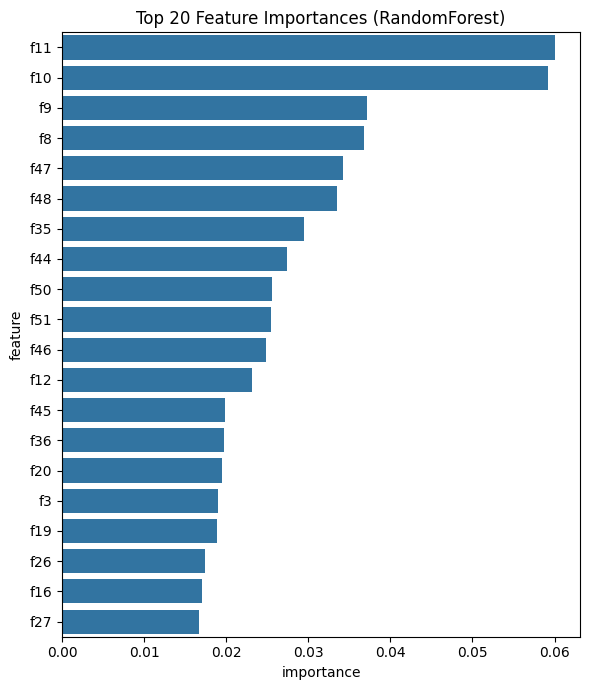

In [ ]:
plt.figure(figsize=(6,7))
sns.barplot(x="importance", y="feature", data=fi_df.head(20))
plt.title("Top 20 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

In [ ]:
K = 30

top_rf = fi_df.head(K)["feature"].tolist()
top_f = f_df.head(K)["feature"].tolist()

final_features = list(set(top_rf) | set(top_f))
print("Final feature count:", len(final_features))
final_features

Final feature count: 39


['f45',
 'f30',
 'f35',
 'f2',
 'f46',
 'f47',
 'f10',
 'f49',
 'f0',
 'f33',
 'f4',
 'f16',
 'f50',
 'f51',
 'f9',
 'f21',
 'f19',
 'f18',
 'f3',
 'f1',
 'f11',
 'f57',
 'f14',
 'f27',
 'f53',
 'f43',
 'f8',
 'f15',
 'f48',
 'f44',
 'f12',
 'f42',
 'f17',
 'f36',
 'f34',
 'f22',
 'f20',
 'f26',
 'f7']

In [ ]:
X_Son = X[final_features].copy()
y_Son = y

X_Son.shape

(208, 39)

## Concrete
OUTPUT: X_Con **__________** y_Con

In [ ]:
path = "datasets_raw/concrete+compressive+strength/Concrete_Data.xls"

df = pd.read_excel(path)
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [ ]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

count        mean  \
Cement (component 1)(kg in a m^3 mixture)           1030.0  281.165631   
Blast Furnace Slag (component 2)(kg in a m^3 mi...  1030.0   73.895485   
Fly Ash (component 3)(kg in a m^3 mixture)          1030.0   54.187136   
Water  (component 4)(kg in a m^3 mixture)           1030.0  181.566359   
Superplasticizer (component 5)(kg in a m^3 mixt...  1030.0    6.203112   
Coarse Aggregate  (component 6)(kg in a m^3 mix...  1030.0  972.918592   
Fine Aggregate (component 7)(kg in a m^3 mixture)   1030.0  773.578883   
Age (day)                                           1030.0   45.662136   
Concrete compressive strength(MPa, megapascals)     1030.0   35.817836   

                                                           std         min  \
Cement (component 1)(kg in a m^3 mixture)           104.507142  102.000000   
Blast Furnace Slag (component 2)(kg in a m^3 mi...   86.279104    0.000000   
Fly Ash (component 3)(kg in a m^3 mixture)           63.996469    0.000000   
Water  (component 4)(kg in a m^3 mixture)            21.355567  121.750000   
Superplasticizer (component 5)(kg in a m^3 mixt...    5.973492    0.000000   
Coarse Aggregate  (component 6)(kg in a m^3 mix...   77.753818  801.000000   
Fine Aggregate (component 7)(kg in a m^3 mixture)    80.175427  594.000000   
Age (day)                                            63.169912    1.000000   
Concrete compressive strength(MPa, megapascals)      16.705679    2.331808   

                                                           25%         50%  \
Cement (component 1)(kg in a m^3 mixture)           192.375000  272.900000   
Blast Furnace Slag (component 2)(kg in a m^3 mi...    0.000000   22.000000   
Fly Ash (component 3)(kg in a m^3 mixture)            0.000000    0.000000   
Water  (component 4)(kg in a m^3 mixture)           164.900000  185.000000   
Superplasticizer (component 5)(kg in a m^3 mixt...    0.000000    6.350000   
Coarse Aggregate  (component 6)(kg in a m^3 mix...  932.000000  968.000000   
Fine Aggregate (component 7)(kg in a m^3 mixture)   730.950000  779.510000   
Age (day)                                             7.000000   28.000000   
Concrete compressive strength(MPa, megapascals)      23.707115   34.442774   

                                                            75%          max  
Cement (component 1)(kg in a m^3 mixture)            350.000000   540.000000  
Blast Furnace Slag (component 2)(kg in a m^3 mi...   142.950000   359.400000  
Fly Ash (component 3)(kg in a m^3 mixture)           118.270000   200.100000  
Water  (component 4)(kg in a m^3 mixture)            192.000000   247.000000  
Superplasticizer (component 5)(kg in a m^3 mixt...    10.160000    32.200000  
Coarse Aggregate  (component 6)(kg in a m^3 mix...  1029.400000  1145.000000  
Fine Aggregate (component 7)(kg in a m^3 mixture)    824.000000   992.600000  
Age (day)                                             56.000000   365.000000  
Concrete compressive strength(MPa, megapascals)       46.136287    82.599225

In [ ]:
df.columns = [
    "cement", "blast_furnace_slag", "fly_ash", "water",
    "superplasticizer", "coarse_aggregate", "fine_aggregate",
    "age", "strength"
]

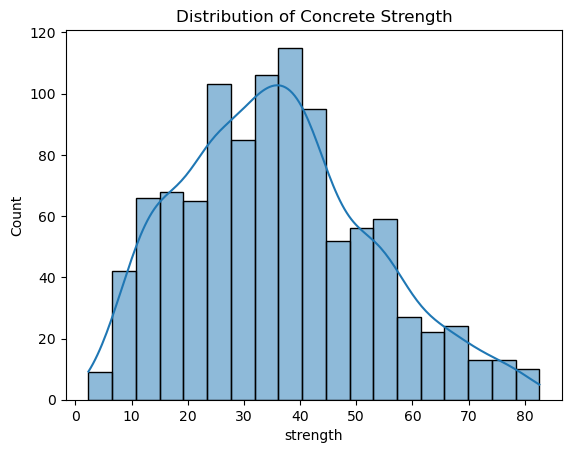

In [ ]:
sns.histplot(df["strength"], kde=True)
plt.title("Distribution of Concrete Strength")
plt.show()

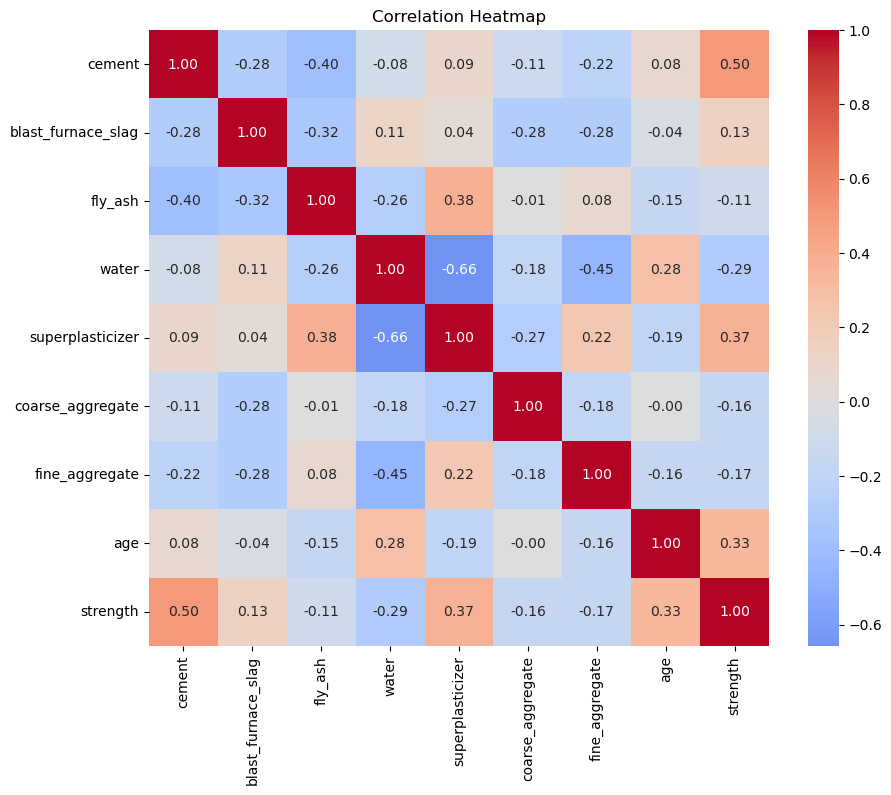

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop("strength", axis=1)
y = df["strength"]
print (y)

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X_fs: feature dataframe
# y: target labels (Series or array)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)
print (y_train)

# Export to CSV
X_train.to_csv("concrete/X_train_data.csv", index=False)
X_test.to_csv("concrete/X_test_data.csv", index=False)

y_train.to_csv("concrete/y_train_data.csv", index=False)
y_test.to_csv("concrete/y_test_data.csv", index=False)

print("✓ Stratified 80/20 splits exported successfully")




995    27.681082
507    62.052840
334    23.800712
848    33.398217
294     7.398077
         ...    
87     24.400556
330    42.216615
466    33.563692
121    68.299493
860    38.458971
Name: strength, Length: 824, dtype: float64
✓ Stratified 80/20 splits exported successfully


In [ ]:
f_scores, f_p = f_regression(X_scaled, y)

f_df = pd.DataFrame({
    "feature": X.columns,
    "f_score": f_scores
}).sort_values("f_score", ascending=False)

f_df

feature     f_score
0              cement  338.725794
4    superplasticizer  159.109322
7                 age  124.673209
3               water   94.118797
6      fine_aggregate   29.582938
5    coarse_aggregate   28.744710
1  blast_furnace_slag   19.032572
2             fly_ash   11.626949

In [ ]:
mi_scores = mutual_info_regression(X_scaled, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": X.columns,
    "mutual_info": mi_scores
}).sort_values("mutual_info", ascending=False)

mi_df

feature  mutual_info
7                 age     0.354301
3               water     0.352808
0              cement     0.308769
5    coarse_aggregate     0.260264
4    superplasticizer     0.221311
6      fine_aggregate     0.212905
1  blast_furnace_slag     0.180715
2             fly_ash     0.125980

In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_scaled, y)

fi_df = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

fi_df

feature  importance
7                 age    0.333688
0              cement    0.327268
3               water    0.106623
1  blast_furnace_slag    0.078617
4    superplasticizer    0.070191
6      fine_aggregate    0.037417
5    coarse_aggregate    0.028337
2             fly_ash    0.017860

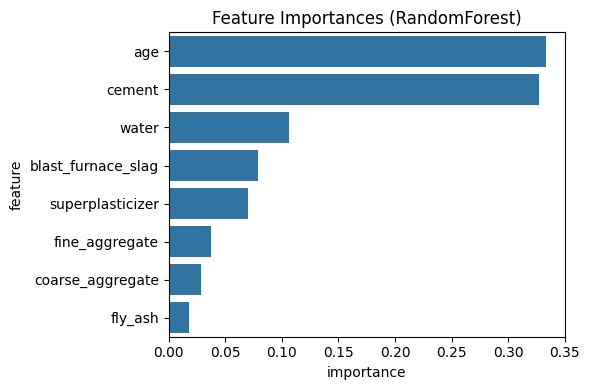

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

In [ ]:
K = 5

top_rf = fi_df.head(K)["feature"].tolist()
top_f  = f_df.head(K)["feature"].tolist()

final_features = list(set(top_rf) | set(top_f))
final_features

['water',
 'superplasticizer',
 'age',
 'blast_furnace_slag',
 'fine_aggregate',
 'cement']

In [ ]:
X_Con = X_scaled[final_features]
y_Con = y
print("X_Con shape:", X_Con.shape)

X_Con shape: (1030, 6)


## Energy Efficiency
OUTPUT: X_H_ENE **__________** y_H_ENE **___** AND **___** X_C_ENE **__________** y_C_ENE

In [ ]:
df = pd.read_excel("datasets_raw/energy+efficiency/ENB2012_data.xlsx")
df.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

In [ ]:
df.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

df.head()

Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

In [ ]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


count        mean        std     min       25%  \
Relative_Compactness       768.0    0.764167   0.105777    0.62    0.6825   
Surface_Area               768.0  671.708333  88.086116  514.50  606.3750   
Wall_Area                  768.0  318.500000  43.626481  245.00  294.0000   
Roof_Area                  768.0  176.604167  45.165950  110.25  140.8750   
Overall_Height             768.0    5.250000   1.751140    3.50    3.5000   
Orientation                768.0    3.500000   1.118763    2.00    2.7500   
Glazing_Area               768.0    0.234375   0.133221    0.00    0.1000   
Glazing_Area_Distribution  768.0    2.812500   1.550960    0.00    1.7500   
Heating_Load               768.0   22.307195  10.090204    6.01   12.9925   
Cooling_Load               768.0   24.587760   9.513306   10.90   15.6200   

                              50%       75%     max  
Relative_Compactness         0.75    0.8300    0.98  
Surface_Area               673.75  741.1250  808.50  
Wall_Area                  318.50  343.0000  416.50  
Roof_Area                  183.75  220.5000  220.50  
Overall_Height               5.25    7.0000    7.00  
Orientation                  3.50    4.2500    5.00  
Glazing_Area                 0.25    0.4000    0.40  
Glazing_Area_Distribution    3.00    4.0000    5.00  
Heating_Load                18.95   31.6675   43.10  
Cooling_Load                22.08   33.1325   48.03

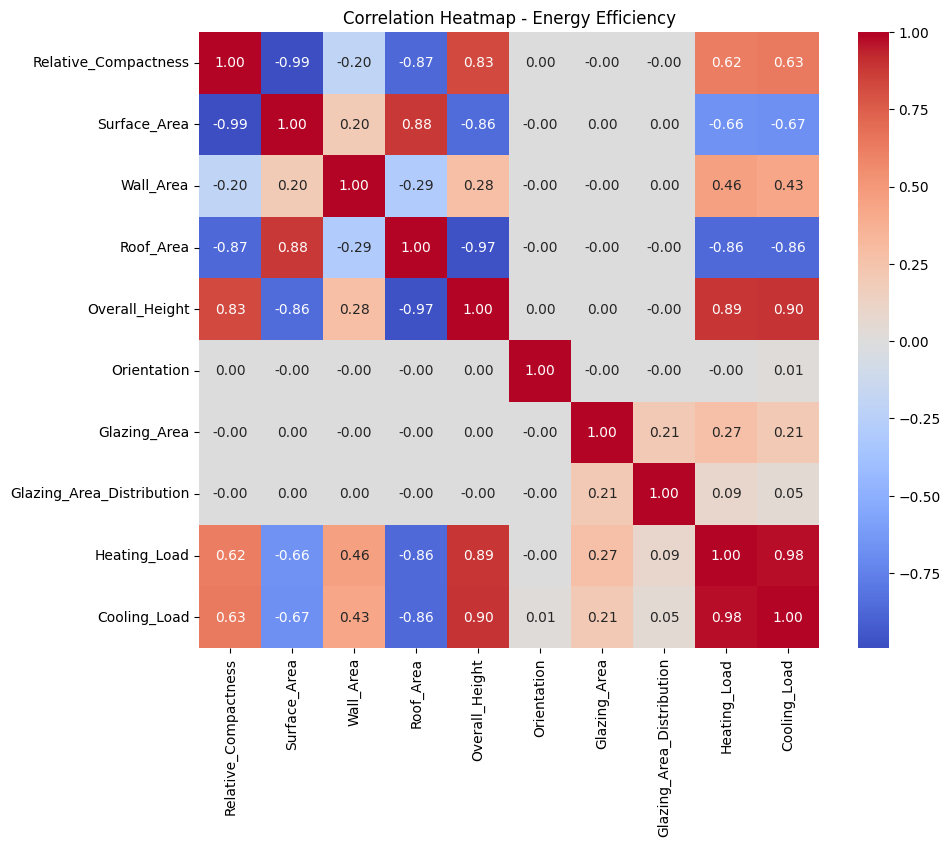

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Energy Efficiency")
plt.show()

In [ ]:
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y1 = df["Heating_Load"]
y2 = df["Cooling_Load"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
f_scores_y1, _ = f_regression(X_scaled, y1)
f_scores_y2, _ = f_regression(X_scaled, y2)

f_df_y1 = pd.DataFrame({"feature": X.columns, "f_score": f_scores_y1}).sort_values("f_score", ascending=False)
f_df_y2 = pd.DataFrame({"feature": X.columns, "f_score": f_scores_y2}).sort_values("f_score", ascending=False)

f_df_y1, f_df_y2


(                     feature      f_score
 4             Overall_Height  2900.590178
 3                  Roof_Area  2211.620312
 1               Surface_Area   585.260349
 0       Relative_Compactness   484.045616
 2                  Wall_Area   200.727893
 6               Glazing_Area    60.156178
 7  Glazing_Area_Distribution     5.892043
 5                Orientation     0.005126,
                      feature      f_score
 4             Overall_Height  3111.127823
 3                  Roof_Area  2226.031391
 1               Surface_Area   634.180214
 0       Relative_Compactness   515.763924
 2                  Wall_Area   170.921606
 6               Glazing_Area    34.466755
 7  Glazing_Area_Distribution     1.960440
 5                Orientation     0.156443)

In [ ]:
mi_y1 = mutual_info_regression(X_scaled, y1, random_state=42)
mi_y2 = mutual_info_regression(X_scaled, y2, random_state=42)

mi_df_y1 = pd.DataFrame({"feature": X.columns, "mutual_info": mi_y1}).sort_values("mutual_info", ascending=False)
mi_df_y2 = pd.DataFrame({"feature": X.columns, "mutual_info": mi_y2}).sort_values("mutual_info", ascending=False)

mi_df_y1, mi_df_y2

(                     feature  mutual_info
 0       Relative_Compactness     1.728478
 1               Surface_Area     1.728457
 2                  Wall_Area     1.116898
 3                  Roof_Area     0.928373
 6               Glazing_Area     0.706196
 4             Overall_Height     0.661178
 7  Glazing_Area_Distribution     0.217459
 5                Orientation     0.000000,
                      feature  mutual_info
 1               Surface_Area     1.418376
 0       Relative_Compactness     1.417306
 3                  Roof_Area     0.881050
 2                  Wall_Area     0.868883
 6               Glazing_Area     0.731187
 4             Overall_Height     0.681889
 7  Glazing_Area_Distribution     0.147200
 5                Orientation     0.000000)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_scaled, y1)
fi_df_y1 = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_}).sort_values("importance", ascending=False)

rf.fit(X_scaled, y2)
fi_df_y2 = pd.DataFrame({"feature": X.columns, "importance": rf.feature_importances_}).sort_values("importance", ascending=False)

fi_df_y1, fi_df_y2

(                     feature  importance
 1               Surface_Area    0.354439
 3                  Roof_Area    0.309329
 0       Relative_Compactness    0.123566
 4             Overall_Height    0.084479
 6               Glazing_Area    0.077036
 2                  Wall_Area    0.037156
 7  Glazing_Area_Distribution    0.013249
 5                Orientation    0.000746,
                      feature  importance
 0       Relative_Compactness    0.459080
 4             Overall_Height    0.256785
 1               Surface_Area    0.102130
 3                  Roof_Area    0.061679
 6               Glazing_Area    0.047783
 2                  Wall_Area    0.043417
 7  Glazing_Area_Distribution    0.016362
 5                Orientation    0.012764)

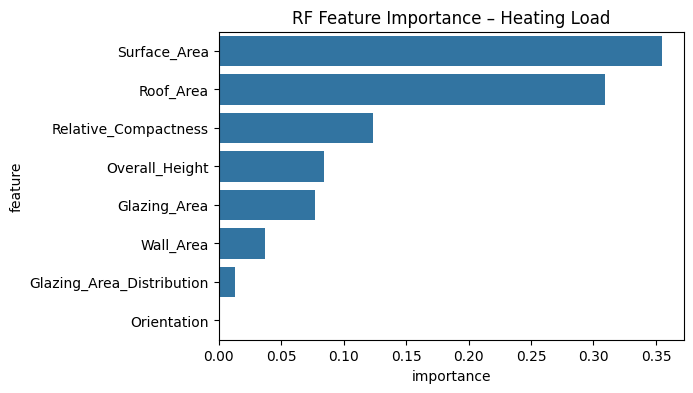

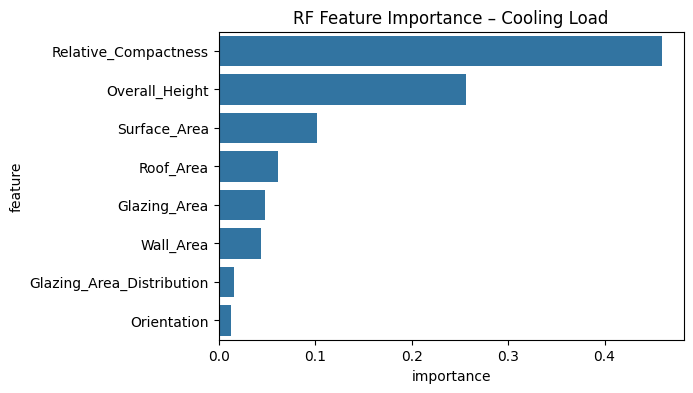

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="importance", y="feature", data=fi_df_y1)
plt.title("RF Feature Importance – Heating Load")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="importance", y="feature", data=fi_df_y2)
plt.title("RF Feature Importance – Cooling Load")
plt.show()


In [ ]:
K = 6

top_rf_y1 = fi_df_y1.head(K)["feature"].tolist()
top_rf_y2 = fi_df_y2.head(K)["feature"].tolist()

final_features_y1 = list(set(top_rf_y1))
final_features_y2 = list(set(top_rf_y2))

print(final_features_y1)
print(final_features_y2)

['Relative_Compactness', 'Wall_Area', 'Glazing_Area', 'Surface_Area', 'Overall_Height', 'Roof_Area']
['Relative_Compactness', 'Wall_Area', 'Glazing_Area', 'Surface_Area', 'Overall_Height', 'Roof_Area']


In [ ]:
X_H_ENE = X_scaled[final_features_y1]
y_H_ENE = y1
print("X_H_ENE shape:", X_H_ENE.shape)

X_H_ENE shape: (768, 6)


In [ ]:
X_C_ENE = X_scaled[final_features_y2]
y_C_ENE = y2
print("X_C_ENE shape:", X_C_ENE.shape)

X_C_ENE shape: (768, 6)


# Modeling & Eveluation 

## Introduction

Reinforcement Learning Trees (RLT) are an advanced variation of the standard Random Forest algorithm designed to handle high-dimensional data, strong feature correlations, and complex interaction effects.<br>
Unlike a standard Random Forest, which selects splitting variables purely at random (or greedily), RLT employs a "Reinforcement" mechanism. It uses an internal embedded model to learn variable importance at each node, allowing it to intelligently "mute" dominant variables and expose hidden relationships.

#### Example of one tree :

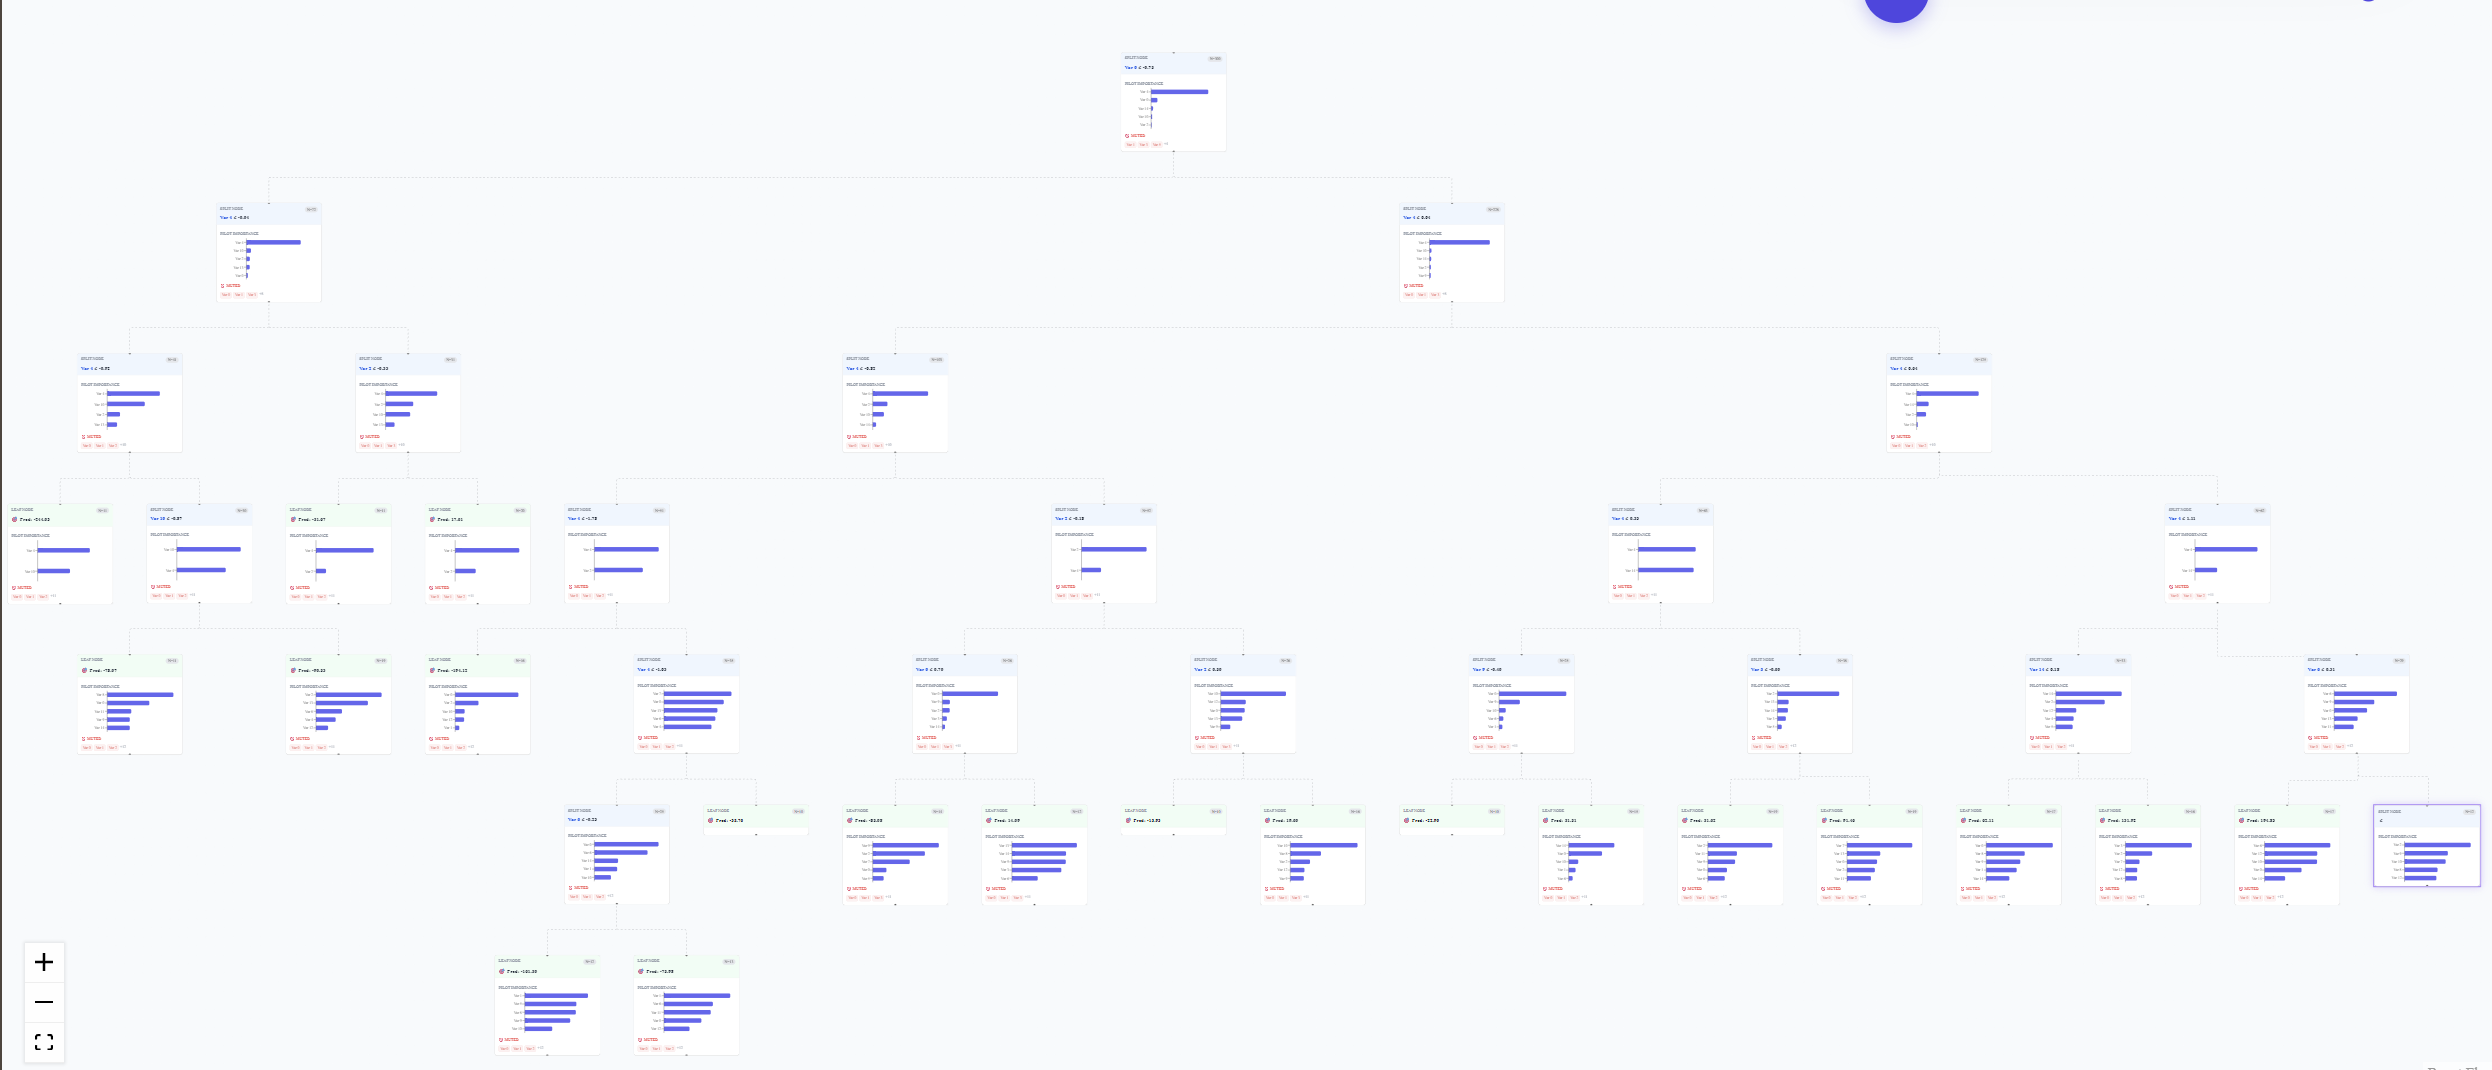

                Leaf Node ( Green ) ------------------------------------------------------------------------------------------Inter Node ( Blue ) 

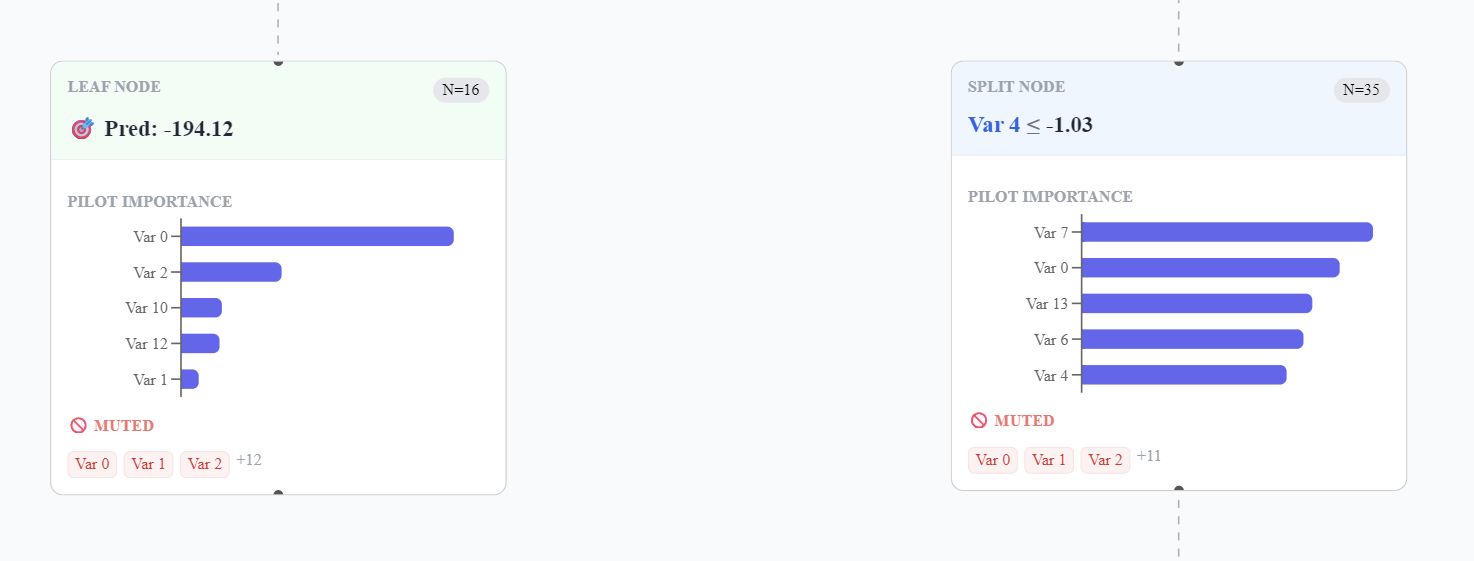

## Imports & Utils

In [ ]:
#### ---------- Requirements.txt ----------------
#numpy>=1.24
#pandas>=2.1
#scikit-learn>=1.3
#joblib>=1.3
#tqdm>=4.66
#xgboost>=1.7
#matplotlib>=3.8
#seaborn>=0.13
#scipy>=1.11 

In [ ]:
# =========================
# Standard library
# =========================
import time
import warnings
from dataclasses import dataclass, field
from typing import List, Optional, Dict

# Ignore convergence warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# =========================
# Data handling
# =========================
import numpy as np
import pandas as pd

# =========================
# Visualization
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# =========================
# Scikit-learn utils
# =========================
from sklearn.base import BaseEstimator
from sklearn.utils import check_X_y, check_array
from sklearn.utils.validation import check_is_fitted

# =========================
# Preprocessing & pipeline
# =========================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# =========================
# Model selection
# =========================
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict, ShuffleSplit

# =========================
# Metrics
# =========================
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    matthews_corrcoef,
    confusion_matrix
)

# =========================
# Models
# =========================
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    ExtraTreesClassifier, ExtraTreesRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost import XGBClassifier, XGBRegressor


In [ ]:
# --- Context Manager for Progress Bar ---
@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)
    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()

In [ ]:
def calculate_classification_metrics(y_true, y_pred, model_name, params, training_time):
    """
    Calculates a comprehensive suite of classification metrics.
    Uses 'weighted' averages to handle potential class imbalance.
    """
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    
    # Weighted metrics handle multi-class and imbalance better than 'macro'
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # MCC is excellent for checking if the model is better than random guessing
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return {
        "Pilot Strategy": model_name,
        "Accuracy": round(acc, 4),
        "Bal. Acc.": round(bal_acc, 4),
        "F1 (W)": round(f1, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "MCC": round(mcc, 4),
        "Time (s)": round(training_time, 4),
        "Best Params": params
    }

In [ ]:
def calculate_detailed_metrics_reg(y_true, y_pred, model_name, params, training_time):
    """
    Calculates a comprehensive suite of regression metrics.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    max_err = max_error(y_true, y_pred)
    
    # MAPE (Handle division by zero safety)
    mask = y_true != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        mape = np.nan
    
    return {
        "Pilot Strategy": model_name,
        "R2": round(r2, 4),
        "RMSE": round(rmse, 4),
        "MAE": round(mae, 4),
        "MAPE (%)": round(mape, 2),
        "MedAE": round(medae, 4),
        "Max Error": round(max_err, 4),
        "Time (s)": round(training_time, 4),
        "Best Params": params
    }

## Tree Structure

### Class : Node

In [4]:
@dataclass
class RLTNode:
    node_id: int
    is_leaf: bool = False
    
    # Splitting info
    feature_indices: List[int] = field(default_factory=list) 
    split_weights: List[float] = field(default_factory=list)
    threshold: float = None
    
    # Tree structure
    left: 'RLTNode' = None
    right: 'RLTNode' = None
    
    # Leaf content
    prediction: float = None
    model: object = None      # Stores the Ridge/Logistic Regression object
    
    # Metadata
    muted_vars: Set[int] = field(default_factory=set)
    sample_indices: np.ndarray = None

### Class : RLTBuilder

The RLTBuilder is the worker engine responsible for constructing exactly one single tree within the RLT ensemble. It does not manage the forest; it receives a specific bootstrap sample of data and recursively partitions it until stopping criteria are met. <br>
Key Responsibilities:
- Recursive Growth: It runs the main tree-building loop (_fit_recursive), moving from the root down to the leaves.
- Reinforcement (The "Pilot" Model): At every internal node, it trains a temporary, internal Random Forest to calculate variable importance and mute (remove) weak variables from future splits in that branch.
- Advanced Splitting: It calculates the optimal cut points, handling both standard axis-parallel splits and Linear Combinations (oblique splits) if configured.
- Leaf Embedding ("Deep Forest"): Upon reaching a terminal node, instead of just storing a mean value, it can train and store a complex Nested Model (e.g., a mini Random Forest, Ridge Regression, or Logistic Regression) on the leaf's local data.

In [ ]:


class RLTBuilder:
    def __init__(self, model_type, nmin, mtry, alpha,
                 nsplit, split_gen,
                 reinforcement, muting_rate, protect_n,
                 combsplit, combsplit_th,
                 embed_config,       
                 # leaf_embed_config removed
                 track_obs, 
                 # leaf_model removed (fixed to Ridge/Linear)
                 pilot_model):
        
        self.model_type = model_type
        self.nmin = nmin
        self.mtry = mtry
        self.alpha = alpha
        self.nsplit = nsplit
        self.split_gen = split_gen
        
        self.reinforcement = reinforcement
        self.muting_rate = muting_rate
        self.protect_n = protect_n
        self.embed_config = embed_config
        # self.leaf_embed_config removed
        
        self.combsplit = combsplit
        self.combsplit_th = combsplit_th
        self.track_obs = track_obs
        # self.leaf_model removed
        self.pilot_model = pilot_model
        
        self.node_count = 0

    def fit(self, X, y, sample_indices_in_bag):
        return self._fit_recursive(X, y, sample_indices_in_bag, muted_set=set(), depth=0)

    def _fit_recursive(self, X, y, current_indices, muted_set, depth):
        X_curr = X[current_indices]
        y_curr = y[current_indices]
        n_samples = len(current_indices)

        is_pure = (len(np.unique(y_curr)) == 1) if self.model_type == "classification" else (np.var(y_curr) < 1e-8)
        
        if n_samples < self.nmin or is_pure or depth > 20:
            return self._make_leaf(X_curr, y_curr, current_indices, muted_set)

        # --- REINFORCEMENT (Pilot Model) ---
        run_reinforcement = self.reinforcement and (n_samples > self.embed_config['n_th'])
        
        if run_reinforcement:
            allowed = [i for i in range(X.shape[1]) if i not in muted_set]
            if len(allowed) < 2: allowed = list(range(X.shape[1]))
            
            X_embed = X_curr[:, allowed]
            
            # =========================================================
            # DYNAMIC PILOT SELECTION
            # =========================================================
            ntrees = self.embed_config['ntrees']
            embed_est = None
            raw_imps = None
            
            # 1. Random Forest Pilot
            if self.pilot_model == "random_forest":
                if self.model_type == "regression":
                    embed_est = RandomForestRegressor(n_estimators=ntrees, max_depth=3, max_features='sqrt', n_jobs=1)
                else:
                    embed_est = RandomForestClassifier(n_estimators=ntrees, max_depth=3, max_features='sqrt', n_jobs=1)
                embed_est.fit(X_embed, y_curr)
                raw_imps = embed_est.feature_importances_

            # 2. Extra Trees Pilot
            elif self.pilot_model == "extra_trees":
                if self.model_type == "regression":
                    embed_est = ExtraTreesRegressor(n_estimators=ntrees, max_depth=3, max_features='sqrt', n_jobs=1)
                else:
                    embed_est = ExtraTreesClassifier(n_estimators=ntrees, max_depth=3, max_features='sqrt', n_jobs=1)
                embed_est.fit(X_embed, y_curr)
                raw_imps = embed_est.feature_importances_

            # 3. Decision Tree Pilot
            elif self.pilot_model == "decision_tree":
                if self.model_type == "regression":
                    embed_est = DecisionTreeRegressor(max_depth=5)
                else:
                    embed_est = DecisionTreeClassifier(max_depth=5)
                embed_est.fit(X_embed, y_curr)
                raw_imps = embed_est.feature_importances_

            # 4. Linear / Lasso Pilot
            elif self.pilot_model == "linear":
                scaler = StandardScaler()
                X_sc = scaler.fit_transform(X_embed)
                if self.model_type == "regression":
                    embed_est = Lasso(alpha=0.1, max_iter=500)
                    embed_est.fit(X_sc, y_curr)
                    raw_imps = np.abs(embed_est.coef_)
                else:
                    embed_est = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, max_iter=200)
                    embed_est.fit(X_sc, y_curr)
                    if embed_est.coef_.ndim > 1:
                        raw_imps = np.sum(np.abs(embed_est.coef_), axis=0)
                    else:
                        raw_imps = np.abs(embed_est.coef_).flatten()

            # 5. ANN Pilot
            elif self.pilot_model == "ann":
                hidden_layer_sizes = (10,) 
                max_iter = 500
                scaler = StandardScaler()
                X_sc = scaler.fit_transform(X_embed)

                if self.model_type == "regression":
                    embed_est = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                                             solver='lbfgs', 
                                             max_iter=max_iter, 
                                             activation='relu',
                                             random_state=None)
                else:
                    embed_est = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                                              solver='lbfgs', 
                                              max_iter=max_iter, 
                                              activation='relu',
                                              random_state=None)
                
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning)
                    try:
                        embed_est.fit(X_sc, y_curr)
                        first_layer_weights = np.abs(embed_est.coefs_[0])
                        raw_imps = np.sum(first_layer_weights, axis=1)
                    except Exception:
                        raw_imps = np.zeros(X_embed.shape[1])

            # Default fallback
            else:
                if self.model_type == "regression":
                    embed_est = RandomForestRegressor(n_estimators=ntrees, max_depth=3, n_jobs=1)
                else:
                    embed_est = RandomForestClassifier(n_estimators=ntrees, max_depth=3, n_jobs=1)
                embed_est.fit(X_embed, y_curr)
                raw_imps = embed_est.feature_importances_

            # =========================================================
            # MUTING LOGIC
            # =========================================================
            if raw_imps is None or np.sum(raw_imps) == 0:
                child_muted_set = muted_set
                candidate_pool = allowed
            else:
                VI = {allowed[i]: imp for i, imp in enumerate(raw_imps)}
                sorted_vars = sorted(VI.keys(), key=lambda k: VI[k], reverse=True)
                
                n_mute = min(max(0, len(allowed) - self.protect_n), int(len(allowed) * self.muting_rate))
                child_muted_set = muted_set.union(set(sorted_vars[-n_mute:]) if n_mute > 0 else set())
                candidate_pool = sorted_vars
                
        else:
            child_muted_set = muted_set
            candidate_pool = [i for i in range(X.shape[1]) if i not in muted_set]
            if not candidate_pool: candidate_pool = list(range(X.shape[1]))

        # --- SPLITTING ---
        n_try = min(self.mtry, len(candidate_pool))
        split_candidates = candidate_pool[:n_try] if run_reinforcement else np.random.choice(candidate_pool, n_try, replace=False)
        
        best_split = self._find_best_split(X_curr, y_curr, split_candidates)

        if best_split is None:
            return self._make_leaf(X_curr, y_curr, current_indices, muted_set)

        feat_idxs, weights, thr, left_mask, _ = best_split
        
        node = RLTNode(node_id=self.node_count)
        self.node_count += 1
        node.feature_indices = feat_idxs
        node.split_weights = weights
        node.threshold = thr
        node.muted_vars = muted_set
        
        node.left = self._fit_recursive(X, y, current_indices[left_mask], child_muted_set, depth+1)
        node.right = self._fit_recursive(X, y, current_indices[~left_mask], child_muted_set, depth+1)
        return node
    
    def _find_best_split(self, X, y, candidates):
        best_gain = -np.inf
        best_cfg = None
        iterations = max(self.nsplit, 10) if (self.combsplit > 1 and len(candidates) >= self.combsplit) else 1
        for _ in range(iterations):
            if self.combsplit > 1 and len(candidates) >= self.combsplit:
                c_vars = np.random.choice(candidates, self.combsplit, replace=False)
                c_weights = np.random.choice([-1, 1], size=self.combsplit)
                vals = np.dot(X[:, c_vars], c_weights)
                res = self._optimize_threshold(vals, y)
                if res and res[2] > best_gain:
                    best_gain = res[2]
                    best_cfg = (c_vars.tolist(), c_weights.tolist(), res[0], res[1], res[2])
            else:
                for f in candidates:
                    vals = X[:, f]
                    res = self._optimize_threshold(vals, y)
                    if res and res[2] > best_gain:
                        best_gain = res[2]
                        best_cfg = ([f], [1.0], res[0], res[1], res[2])
        return best_cfg

    def _optimize_threshold(self, values, y):
        unique_vals = np.unique(values)
        if len(unique_vals) < 2: return None
        thresholds = unique_vals
        if self.nsplit > 0 and self.split_gen == "random":
             thresholds = np.random.choice(unique_vals, size=min(self.nsplit, len(unique_vals)), replace=False)
        best = -np.inf
        best_t, best_m = None, None
        n = len(y)
        for t in thresholds:
            l_mask = values <= t
            n_l = np.sum(l_mask)
            if n_l < self.alpha * n or (n-n_l) < self.alpha * n: continue
            if n_l < self.nmin or (n-n_l) < self.nmin: continue
            if self.model_type == "regression":
                gain = np.var(y)*n - (np.var(y[l_mask])*n_l + np.var(y[~l_mask])*(n-n_l))
            else:
                def g(z): return 1.0 - np.sum((np.unique(z, return_counts=True)[1]/len(z))**2)
                gain = g(y) - ((n_l/n)*g(y[l_mask]) + ((n-n_l)/n)*g(y[~l_mask]))
            if gain > best: best, best_t, best_m = gain, t, l_mask
        return (best_t, best_m, best) if best_t is not None else None

    # ==========================================================================
    #  FIXED LEAF MODEL: RIDGE REGRESSION / LOGISTIC (Piecewise Linear)
    # ==========================================================================
    def _make_leaf(self, X_leaf, y_leaf, current_indices, muted_set):
        node = RLTNode(node_id=self.node_count, is_leaf=True)
        self.node_count += 1
        node.n_samples = len(y_leaf)
        node.muted_vars = muted_set
        if self.track_obs: node.sample_indices = current_indices

        # 1. Base Prediction (Fallback: Mean / Mode)
        if self.model_type == "regression":
            node.prediction = np.mean(y_leaf)
        else:
            vals, counts = np.unique(y_leaf, return_counts=True)
            node.prediction = vals[np.argmax(counts)]

        # 2. Safety Checks
        # Need enough samples to fit a regression line safely
        if len(y_leaf) < 5 or len(np.unique(y_leaf)) < 2:
            return node

        # 3. Fit Linear Model
        try:
            if self.model_type == "regression":
                # Check for variance in y to avoid fitting noise
                if np.std(y_leaf) > 1e-9:
                    # RIDGE REGRESSION (Piecewise Linear)
                    # alpha=1.0 is standard regularization
                    model = Ridge(alpha=1.0)
                    model.fit(X_leaf, y_leaf)
                    node.model = model
            else:
                # LOGISTIC REGRESSION (Piecewise Linear Boundary)
                if len(np.unique(y_leaf)) > 1:
                    model = LogisticRegression(max_iter=100, solver='liblinear')
                    model.fit(X_leaf, y_leaf)
                    node.model = model
        except Exception:
            # If matrix is singular or fails, we fallback to the Mean/Mode calculated above
            node.model = None

        return node

### Class : RLT

This is the main RLT Class that the user interacts 

It combines:
- The Data Structures (RLTNode).
- The Worker Engine (RLTBuilder) which handles the recursion, reinforcement, linear splits, and leaf embedding.
- The Main Estimator (RLT) using the specific corrected logic you provided (fixed muting rate, parameter handling, and parallelization).

In [6]:
class RLT(BaseEstimator): 
    def __init__(self, 
                 ntrees=100, 
                 model="regression",
                 
                 # --- PILOT CONFIG ---
                 # Options: "random_forest", "extra_trees", "decision_tree", "linear", "ann"
                 pilot_model="random_forest", 
                 
                 # leaf_model REMOVED (Fixed to Ridge/Linear in Builder)
                 
                 mtry=None, 
                 nmin=None, 
                 alpha=0.1, 
                 split_gen="random", 
                 nsplit=1,
                 resample_prob=0.9, 
                 replacement=True,
                 reinforcement=True,
                 muting=-1,
                 protect=None,
                 combsplit=1,
                 combsplit_th=0.25,
                 track_obs=False,
                 importance=True,
                 
                 # Pilot Config Params (Keep these for the reinforcement step)
                 embed_ntrees=50,
                 embed_mtry=0.5,
                 embed_nmin=None,
                 embed_n_th=None,
                 
                 # Leaf Config Params REMOVED (No longer needed)
                 
                 n_jobs=-1):
        
        self.ntrees = ntrees
        self.model = model
        self.pilot_model = pilot_model
        
        self.mtry = mtry
        self.nmin = nmin
        self.alpha = alpha
        self.split_gen = split_gen
        self.nsplit = nsplit
        self.resample_prob = resample_prob
        self.replacement = replacement
        
        self.reinforcement = reinforcement
        self.muting = muting
        self.protect = protect
        self.combsplit = combsplit
        self.combsplit_th = combsplit_th
        self.track_obs = track_obs
        self.importance = importance
        
        self.embed_ntrees = embed_ntrees
        self.embed_mtry = embed_mtry
        self.embed_nmin = embed_nmin
        self.embed_n_th = embed_n_th
        
        self.n_jobs = n_jobs
        self.trees_ = []

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        n_samples, n_features = X.shape
        
        # Defaults
        if self.mtry is None: self.mtry = max(1, int(n_features / 3))
        if self.nmin is None: self.nmin = max(1, int(np.log(n_samples)))
        if self.protect is None: self.protect = int(np.log(n_features))
        if self.embed_nmin is None: self.embed_nmin = int(n_samples**(1/3))
        if self.embed_n_th is None: self.embed_n_th = 4 * self.nmin
        
        # Muting Rate Calculation
        if self.muting == -1:
            if self.reinforcement:
                base_term = np.log(n_features) / n_features if n_features > 1 else 0
                offset = 0.35 
                if n_features <= 50: offset = 0.50
                if n_samples < 100: offset -= 0.10
                real_muting = max(0.0, min(0.9, base_term + offset))
            else:
                real_muting = 0.0
        else:
            real_muting = self.muting

        # Config dictionary for the Pilot model
        embed_config = {
            'ntrees': self.embed_ntrees,
            'mtry': max(1, int(self.embed_mtry * n_features)) if isinstance(self.embed_mtry, float) else self.embed_mtry,
            'nmin': self.embed_nmin,
            'n_th': self.embed_n_th
        }
        
        # Seed generation
        seeds = np.random.randint(0, 1e9, self.ntrees)
        
        # Parallel Fit
        self.trees_ = Parallel(n_jobs=self.n_jobs)(
            delayed(self._fit_single_tree)(X, y, seed, real_muting, embed_config) 
            for seed in seeds
        )
        return self

    def _fit_single_tree(self, X, y, seed, muting_rate, embed_config):
        np.random.seed(seed)
        n_samples = X.shape[0]
        sample_size = int(n_samples * self.resample_prob)
        indices = np.random.choice(n_samples, sample_size, replace=self.replacement)
        
        builder = RLTBuilder(
            model_type=self.model,
            nmin=self.nmin,
            mtry=self.mtry,
            alpha=self.alpha,
            nsplit=self.nsplit,
            split_gen=self.split_gen,
            reinforcement=self.reinforcement,
            muting_rate=muting_rate,
            protect_n=self.protect,
            combsplit=self.combsplit,
            combsplit_th=self.combsplit_th,
            embed_config=embed_config,
            # leaf_embed_config REMOVED from Builder call
            track_obs=self.track_obs,
            # leaf_model REMOVED from Builder call
            pilot_model=self.pilot_model
        )
        
        return builder.fit(X, y, indices)
    
    def predict(self, X):
        X = check_array(X)
        preds = Parallel(n_jobs=self.n_jobs)(
            delayed(self._predict_tree)(tree, X) for tree in self.trees_
        )
        preds = np.array(preds)
        
        if self.model == "regression":
            return np.mean(preds, axis=0)
        else:
            from scipy.stats import mode
            res, _ = mode(preds, axis=0, keepdims=False)
            return res
        
    def score(self, X, y, sample_weight=None):
        y_pred = self.predict(X)
        if self.model == "regression":
            return r2_score(y, y_pred, sample_weight=sample_weight)
        else:
            return accuracy_score(y, y_pred, sample_weight=sample_weight)

    def _predict_tree(self, node, X):
        return np.array([self._predict_row(node, row) for row in X])

    def _predict_row(self, node, row):
        if node.is_leaf:
            if node.model is not None:
                return node.model.predict(row.reshape(1, -1))[0]
            return node.prediction
        
        val = 0.0
        if len(node.feature_indices) == 1 and len(node.split_weights) == 1:
            val = row[node.feature_indices[0]]
        else:
            for i, idx in enumerate(node.feature_indices):
                val += row[idx] * node.split_weights[i]
                
        if val <= node.threshold:
            return self._predict_row(node.left, row)
        else:
            return self._predict_row(node.right, row)

## Research

To systematically evaluate the behavior and performance of the considered models, we conduct experiments on **four complementary synthetic scenarios**. Using synthetic datasets allows full control over the data-generating mechanisms, making it possible to clearly assess each model’s ability to capture linearity, non-linearity, interactions, correlations, and sparsity.

The scenarios are defined as follows:

- **Scenario 1 – Classification with independent covariates and non-linear relationship**  
  A binary classification setting where covariates are independent and uniformly distributed. The decision boundary is non-linear, designed to challenge linear classifiers and highlight the benefits of flexible models.

- **Scenario 2 – Non-linear regression model with independent covariates and threshold effect**  
  A regression scenario with independent covariates and a non-linear response function involving interaction and threshold effects. This setup evaluates a model’s capacity to capture localized non-linear behavior.

- **Scenario 3 – Checkerboard model with strongly correlated covariates**  
  A highly non-linear regression model with a checkerboard-like structure and strong correlations between variables. This scenario is particularly demanding and is used to test robustness to feature dependence and complex interaction patterns.

- **Scenario 4 – Linear model (Lasso benchmark)**  
  A purely linear regression model with sparse coefficients, serving as a benchmark for Lasso and other linear regularized methods. In this setting, complex non-linear models are not expected to outperform linear approaches.

These four scenarios together provide a comprehensive and controlled framework to compare models across increasing levels of complexity, from linear to strongly non-linear and correlated settings.


### Synthetic datasets generation

#### Classification

**Scenario 1 :** Classification avec covariables indépendantes et relation non-linéaire

In [100]:
"""
Classification with Uniform[0,1] features and non-linear relationship.

Steps:
    1. X ~ Uniform[0,1]^p
    2. Non-linear checkerboard decision rule using X1, X2
    3. Binary labels {0,1}
    4. Optional label noise (flip_y)
"""

def generate_nonlinear_uniform_classification(
    n_samples=1000,
    p=5,
    seed=42,
    n_blocks=4,
    flip_y=0.05
):
    rng = np.random.default_rng(seed)

    # --- 1) Uniform features ---
    X = rng.uniform(0, 1, size=(n_samples, p))

    # --- 2) Non-linear checkerboard rule ---
    X1 = X[:, 0]
    X2 = X[:, 1]

    block_x = (X1 * n_blocks).astype(int)
    block_y = (X2 * n_blocks).astype(int)

    # XOR / checkerboard pattern
    y = (block_x + block_y) % 2   # {0,1}

    # --- 3) Label noise ---
    if flip_y > 0:
        flips = rng.random(n_samples) < flip_y
        y[flips] = 1 - y[flips]

    return X, y


# Example usage
sc1_X, sc1_y = generate_nonlinear_uniform_classification(
    n_samples=2000,
    p=8,
    n_blocks=6,
    flip_y=0.1
)

print(sc1_X.shape, sc1_y.shape)
print("Class balance:", np.bincount(sc1_y))

(2000, 8) (2000,)
Class balance: [1009  991]


In [102]:
np.unique(sc1_y)

array([0, 1])

#### Regression

**Scenario 2 :** Modèle non-linéaire avec covariables indépendantes et effet de seuil

In [8]:
"""
    Scenario 2: Non-linear model with independent covariates
        X ~ Uniform[0, 1]^p
        Y = 100*(X1 - 0.5)^2 * (X2 - 0.25)_+ + ε
        ε ~ N(0, 1)
"""

def generate_scenario2(n_samples=1000, p=5, seed=42):
    
    rng = np.random.default_rng(seed)

    # Generate covariates
    X = rng.uniform(0, 1, size=(n_samples, p))

    # Extract X1 and X2 (python index: 0 and 1)
    X1 = X[:, 0]
    X2 = X[:, 1]

    # Positive part (x)_+ = max(x, 0)
    positive_part = np.maximum(X2 - 0.25, 0)

    # Noise
    eps = rng.normal(0, 1, size=n_samples)

    # Response
    Y = 100 * (X1 - 0.5)**2 * positive_part + eps

    return X, Y

# Example usage:
sc2_X, sc2_y = generate_scenario2(n_samples=2000, p=10)
print(sc2_X.shape, sc2_y.shape)

(2000, 10) (2000,)


**Scenario 3 :** Modèle de type "checkerboard" avec fortes corrélations entre variables

In [ ]:

"""
    Regression with strong feature correlations + checkerboard-like interactions.

    Steps:
    1. Generate strongly correlated Gaussian variables.
    2. Convert to Uniform[0,1] via Φ (Gaussian CDF).
    3. Checkerboard response:
            Y = +1 on some blocks, -1 on others, alternating.
        (like a 2D XOR generalization)
    4. Add noise N(0,1).
"""

def generate_checkerboard_regression(
    n_samples=1000, p=5, rho=0.8, seed=42, n_blocks=4
):
    

    rng = np.random.default_rng(seed)

    # --- 1) Correlated Gaussian variables ---
    # Build correlation matrix
    Sigma = rho * np.ones((p, p)) + (1 - rho) * np.eye(p)
    L = np.linalg.cholesky(Sigma)

    Z = rng.normal(size=(n_samples, p))
    X_gaussian = Z @ L.T

    # --- 2) Convert to Uniform[0,1] ---
    X = norm.cdf(X_gaussian)   # Uniform with strong dependence

    # --- 3) Checkerboard interaction using X1 and X2 only ---
    X1 = X[:, 0]
    X2 = X[:, 1]

    # Determine which block each point falls in
    block_x = (X1 * n_blocks).astype(int)
    block_y = (X2 * n_blocks).astype(int)

    # Checkerboard parity (block_x + block_y) mod 2
    pattern = ((block_x + block_y) % 2)

    # Map to +1 / -1 alternating tiles
    signal = 2 * pattern - 1  # 0→-1, 1→+1

    # --- 4) Response with nonlinearity + noise ---
    noise = rng.normal(0, 1, size=n_samples)
    Y = signal + 0.1 * noise

    return X, Y


# Example usage:
sc3_X, sc3_y = generate_checkerboard_regression(n_samples=2000, p=8, rho=0.9)
print(sc3_X.shape, sc3_y.shape)


(2000, 8) (2000,)


**Scenario 4 :** Modèle linéaire (benchmark pour Lasso)

In [10]:

"""
Scenario 4: Linear regression (Lasso benchmark)
    X ~ Uniform[0,1]^p
    Y = sum_{j=1}^{n_inf} beta_j * X_j + ε
    ε ~ N(0,1)
"""
def generate_scenario4_lasso(
    n_samples=1000,
    p=10,
    n_informative=3,
    seed=42
):

    rng = np.random.default_rng(seed)

    # --- 1) Covariates ---
    X = rng.uniform(0, 1, size=(n_samples, p))

    # --- 2) Sparse linear coefficients ---
    beta = np.zeros(p)
    beta[:n_informative] = rng.uniform(2, 5, size=n_informative)

    # --- 3) Noise ---
    eps = rng.normal(0, 1, size=n_samples)

    # --- 4) Response ---
    Y = X @ beta + eps

    return X, Y, beta


# Example usage
sc4_X, sc4_y, beta_true = generate_scenario4_lasso(
    n_samples=2000,
    p=10,
    n_informative=3
)

print(sc4_X.shape, sc4_y.shape)
print("True beta:", beta_true)


(2000, 10) (2000,)
True beta: [4.22231826 4.9874194  2.12293193 0.         0.         0.
 0.         0.         0.         0.        ]


## RLT

### Tuning : Finding the best RLT hyperparameters

For a Reinforcement Learning Tree (RLT) with this specific signature, the parameters fall into three categories: 
- structural (standard random forest params), 
- reinforcement (the "learning" part of the split selection) 
- leaf modeling (what happens at the terminal nodes).
To get the best performance without an explosion in training time, you should fix the computational parameters and tune the ones that control the bias-variance trade-off and the strength of the reinforcement signal.<br><br>
**The Strategy :**
- Fix: ntrees (set it high enough to stabilize), n_jobs, and sampling parameters like replacement.
- Tune (Primary): mtry, nmin, and leaf_model.These have the highest impact on model architecture.
- Tune (Secondary - RLT specific): nsplit, reinforcement, and combsplit.These control how "aggressive" the reinforcement learning aspect is.

#### Personalise RLT search grid params 

In [ ]:
param_distributions = {
    # --- Structural Tree Params (Speed Optimization) ---
    # Larger leaves (50) are much faster and stabilize 'Ridge' leaf models.
    # Smaller leaves (20) capture finer details but slow things down.
    'nmin': [20, 50],         

    # 'random' is significantly faster than 'best' (which requires sorting).
    # RLT relies on randomness + reinforcement, so 'best' is often redundant.
    'split_gen': ['random'],      

    # Keep nsplit low (1) when using 'random'. Checking 3+ points per feature 
    # slows training linearly with minimal gain for RLT.
    'nsplit': [1],          

    # Standard subsampling. 0.8 is slightly faster than 0.9.
    'resample_prob': [0.7,0.9],  

    # Try standard feature counts. 
    # (Adjust '10' based on your actual feature count; sqrt(p) is standard).
    'mtry': [5, 10],          
    
    # 0.0 is standard accuracy. 0.05 provides a slight speedup by pruning early.
    'alpha': [0.0, 0.05],          

    # --- RLT Reinforcement Params (The Secret Sauce) ---
    'reinforcement': [True], 
    
    
    'pilot_model': ['random_forest', 'extra_trees', 'decision_tree', 'linear', 'ann'],
    
    # --- Muting Optimization ---
    # -1 (Auto) calculates based on dataset size (smartest).
    # 0.3 (Fixed 30%) is a good "aggressive" setting to test against Auto.
    'muting': [-1, 0.3], 
    
    # Logarithmic protection is usually best. 
    # If you have 20 features, keep 2-3 protected.
    'protect': [2, 3],
    
    # --- Complex Splitting ---
    # KEEP AT 1 for speed. 
    # Combsplit > 1 calculates linear combinations (PCA-like) at every node. 
    # It is very slow and only helps in specific "checkerboard" data structures.
    'combsplit': [1,2] 
}
cv_folds = 2
n_iter_search = 200

#### Gridsearch for tuning ( unused )

for regression models

In [12]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# 1. Data
X_reg, y_reg = make_regression(n_samples=200, n_features=10, random_state=42)

# 2. Setup Model (model="regression")
rlt_reg = RLT(model="regression", n_jobs=1)

# 3. Grid Search
random_search_grid = {
    'leaf_model': ['mean', 'decision_trees', 'extra_trees', "rando_forest" ], # maybe skip RF for speed
    'muting': [0, 1, 2],
    'protect': [None, 2, 5],
    'resample_prob': [0.8],  ## mathematically the best 
    'split_gen': ['random', 'best'],
    # 5. Mtry: 'sqrt' is often too small for regression. 
    # 0.5 (half features) to 0.8 usually works best for regression problems.
    'mtry': [3,5, 8],
    'nmin': [10, 20],
    'nsplit': [1, 5]
}

gs_reg = GridSearchCV(rlt_reg, param_grid_reg, cv=3, verbose=1)
gs_reg.fit(X_reg, y_reg)

print("Best Regression R2:", gs_reg.best_score_)
print("Best Params:", gs_reg.best_params_)'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.datasets import make_regression\n\n# 1. Data\nX_reg, y_reg = make_regression(n_samples=200, n_features=10, random_state=42)\n\n# 2. Setup Model (model="regression")\nrlt_reg = RLT(model="regression", n_jobs=1)\n\n# 3. Grid Search\nrandom_search_grid = {\n    \'leaf_model\': [\'mean\', \'decision_trees\', \'extra_trees\', "rando_forest" ], # maybe skip RF for speed\n    \'muting\': [0, 1, 2],\n    \'protect\': [None, 2, 5],\n    \'resample_prob\': [0.8],  ## mathematically the best \n    \'split_gen\': [\'random\', \'best\'],\n    # 5. Mtry: \'sqrt\' is often too small for regression. \n    # 0.5 (half features) to 0.8 usually works best for regression problems.\n    \'mtry\': [3,5, 8],\n    \'nmin\': [10, 20],\n    \'nsplit\': [1, 5]\n}\n\ngs_reg = GridSearchCV(rlt_reg, param_grid_reg, cv=3, verbose=1)\ngs_reg.fit(X_reg, y_reg)\n\nprint("Best Regression R2:", gs_reg.best_score_)\nprint("Best Params:", gs_reg.best_params_)'

for Classification models

In [13]:
'''from sklearn.datasets import make_classification

# 1. Data
X_clf, y_clf = make_classification(n_samples=200, n_features=10, n_classes=2, random_state=42)

# 2. Setup Model (model="classification")
# Note: You can pass n_jobs=1 here so GridSearch handles parallelization
rlt_clf = RLT(model="classification", n_jobs=1)

# 3. Grid Search
param_grid_clf = {
    'ntrees': [50, 100],
    'mtry': [2, 4],     # Integer checking specific feature counts
    'muting': [-1, 0.2] # Auto muting vs Fixed 20%
}

gs_clf = GridSearchCV(rlt_clf, param_grid_clf, cv=3, verbose=1)
gs_clf.fit(X_clf, y_clf)

print("Best Classification Accuracy:", gs_clf.best_score_)
print("Best Params:", gs_clf.best_params_)'''

'from sklearn.datasets import make_classification\n\n# 1. Data\nX_clf, y_clf = make_classification(n_samples=200, n_features=10, n_classes=2, random_state=42)\n\n# 2. Setup Model (model="classification")\n# Note: You can pass n_jobs=1 here so GridSearch handles parallelization\nrlt_clf = RLT(model="classification", n_jobs=1)\n\n# 3. Grid Search\nparam_grid_clf = {\n    \'ntrees\': [50, 100],\n    \'mtry\': [2, 4],     # Integer checking specific feature counts\n    \'muting\': [-1, 0.2] # Auto muting vs Fixed 20%\n}\n\ngs_clf = GridSearchCV(rlt_clf, param_grid_clf, cv=3, verbose=1)\ngs_clf.fit(X_clf, y_clf)\n\nprint("Best Classification Accuracy:", gs_clf.best_score_)\nprint("Best Params:", gs_clf.best_params_)'

#### Randomized search for tuning

We Will use this for time and resources limitations ( Total Grid Combinations : 1,280 x 2 )<br>
We will only make 200 iterations * 2 folds = 400 fits

##### Regression

**Run Randomized search**

In [ ]:
# --- Data Setup ---
scenarios = {
    "Scenario 2": (sc2_X, sc2_y),
    "Scenario 3": (sc3_X, sc3_y),
    "Scenario 4": (sc4_X, sc4_y)
}

# Master Dictionary to store everything
scenario_results = {}

# --- Main Loop ---
for scenario_name, (X_curr, y_curr) in scenarios.items():
    
    print("\n" + "#"*80)
    print(f" PROCESSING: {scenario_name}")
    print("#"*80)
    
    # 1. Initialize & Run Search
    rlt_reg = RLT(n_jobs=-1, model="regression", ntrees=50)

    rs_reg = RandomizedSearchCV(
        estimator=rlt_reg,
        param_distributions=param_distributions,
        n_iter=n_iter_search,
        cv=cv_folds,
        verbose=0,
        n_jobs=-1,
        random_state=42,
        scoring='r2'
    )
    
    total_fits = n_iter_search
    print(f"1. Tuning Hyperparameters ({total_fits} fits)...")

    with tqdm_joblib(tqdm(desc=f"Searching {scenario_name}", total=total_fits, unit="fit")) as progress_bar:
        rs_reg.fit(X_curr, y_curr)

    # ==========================================================================
    #  PROCESS RESULTS
    # ==========================================================================
    df_results = pd.DataFrame(rs_reg.cv_results_)
    
    # Create cleaner grouping column
    def get_group_name(row):
        if row['param_reinforcement'] is False:
            return "NO REINFORCEMENT"
        else:
            return str(row['param_pilot_model']).upper()

    df_results['model_group'] = df_results.apply(get_group_name, axis=1)

    # Find the single best fit for each group
    best_indices = df_results.groupby('model_group')['mean_test_score'].idxmax()
    best_per_pilot_df = df_results.loc[best_indices].sort_values(by='mean_test_score', ascending=False).copy()
    
    # ==========================================================================
    #  CALCULATE FULL METRICS FOR WINNERS
    # ==========================================================================
    print("2. Calculating full metrics for the winners...")
    detailed_metrics_list = []
    
    # Iterate through the best configuration of each pilot type
    for _, row in tqdm(best_per_pilot_df.iterrows(), total=len(best_per_pilot_df), desc="Benchmarking Winners"):
        pilot_name = row['model_group']
        best_params = row['params']
        
        # 1. Re-instantiate model with the winning parameters
        # We assume RLT class handles kwargs correctly
        winner_model = RLT(n_jobs=-1, model="regression", **best_params)
        
        # 2. Generate unbiased predictions via Cross-Validation
        # This simulates test-set performance using the whole dataset
        start_time = time.time()
        y_cv_pred = cross_val_predict(winner_model, X_curr, y_curr, cv=cv_folds, n_jobs=-1)
        end_time = time.time()
        
        # 3. Calculate all metrics
        metrics = calculate_detailed_metrics_reg(
            y_curr, 
            y_cv_pred, 
            pilot_name, 
            best_params,
            training_time=(end_time - start_time)
        )
        detailed_metrics_list.append(metrics)
        
    # Create a nice DataFrame for the metrics
    benchmarks_df = pd.DataFrame(detailed_metrics_list)
    
    # Identify the Overall Best (Max R2)
    overall_best_row = benchmarks_df.loc[benchmarks_df['R2'].idxmax()]
    
    # ==========================================================================
    #  STORE RESULTS
    # ==========================================================================
    scenario_results[scenario_name] = {
        "benchmarks_df": benchmarks_df,          # <--- THIS IS WHAT YOU ASKED FOR
        "overall_best_metrics": overall_best_row.to_dict(),
        "overall_best_params": overall_best_row["Best Params"],
        "raw_cv_results": df_results
    }

    # ==========================================================================
    #  DISPLAY
    # ==========================================================================
    print(f"\n--- {scenario_name}: Detailed Benchmark ---")
    # Display columns except 'Best Params' to keep it readable
    display_cols = [c for c in benchmarks_df.columns if c != "Best Params"]
    print(benchmarks_df[display_cols].to_string(index=False))
    
    print(f"\n >> OVERALL WINNER: {overall_best_row['Pilot Strategy']} (R2: {overall_best_row['R2']})")

print("\n" + "="*80)
print(" DONE. All metrics stored in 'scenario_results'.")
print(" Access via: scenario_results['Scenario 2']['benchmarks_df']")
print("="*80)


################################################################################
 PROCESSING: Scenario 2
################################################################################
1. Tuning Hyperparameters (200 fits)...


Searching Scenario 2: 450fit [1:06:34,  8.88s/fit]                                                                      


2. Calculating full metrics for the winners...


Benchmarking Winners: 100%|██████████████████████████████████████████████████████████████| 5/5 [09:30<00:00, 114.16s/it]



--- Scenario 2: Detailed Benchmark ---
Pilot Strategy     R2   RMSE    MAE  MAPE (%)  MedAE  Max Error  Time (s)
 RANDOM_FOREST 0.8450 1.4447 1.0728    937.79 0.8357     8.2422  117.7631
           ANN 0.8431 1.4535 1.0847    899.60 0.8600     7.8192  328.4150
   EXTRA_TREES 0.8411 1.4626 1.0911    908.10 0.8600     7.7108   97.4486
 DECISION_TREE 0.8337 1.4962 1.0994   1218.94 0.8452     8.8225   13.4932
        LINEAR 0.7433 1.8590 1.3563   2147.86 1.0312    10.2738   13.6643

 >> OVERALL WINNER: RANDOM_FOREST (R2: 0.845)

################################################################################
 PROCESSING: Scenario 3
################################################################################
1. Tuning Hyperparameters (200 fits)...


Searching Scenario 3:  12%|███████                                                    | 24/200 [02:49<13:09,  4.48s/fit]/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configurati

2. Calculating full metrics for the winners...


Benchmarking Winners:  40%|████████████████████████▊                                     | 2/5 [05:41<07:15, 145.25s/it]/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
Benchmarking Winners: 100%|██████████████████████████████████████████████████████████████| 5/5 [10:13<00:00, 122.64s/it]



--- Scenario 3: Detailed Benchmark ---
Pilot Strategy     R2   RMSE    MAE  MAPE (%)  MedAE  Max Error  Time (s)
           ANN 0.5053 0.6712 0.5361     53.11 0.4667     1.6817  315.2322
 DECISION_TREE 0.4410 0.7135 0.5933     58.86 0.5582     1.7095   26.2586
 RANDOM_FOREST 0.4452 0.7108 0.5950     59.03 0.5737     1.6591  143.0821
        LINEAR 0.4327 0.7187 0.5953     59.06 0.5535     1.7693   27.4665
   EXTRA_TREES 0.4008 0.7387 0.6284     62.42 0.6282     1.6395  101.1383

 >> OVERALL WINNER: ANN (R2: 0.5053)

################################################################################
 PROCESSING: Scenario 4
################################################################################
1. Tuning Hyperparameters (200 fits)...


Searching Scenario 4: 450fit [1:05:23,  8.72s/fit]                                                                      


2. Calculating full metrics for the winners...


Benchmarking Winners: 100%|███████████████████████████████████████████████████████████████| 5/5 [03:40<00:00, 44.15s/it]


--- Scenario 4: Detailed Benchmark ---
Pilot Strategy     R2   RMSE    MAE  MAPE (%)  MedAE  Max Error  Time (s)
           ANN 0.7722 1.0413 0.8287     24.33 0.6892     3.4039  139.4187
 DECISION_TREE 0.7719 1.0420 0.8312     24.23 0.6967     3.4878    7.8803
        LINEAR 0.7716 1.0427 0.8329     24.22 0.6931     3.4268    8.2459
 RANDOM_FOREST 0.7707 1.0448 0.8341     24.44 0.7063     3.3978   38.4979
   EXTRA_TREES 0.7725 1.0406 0.8299     24.19 0.6908     3.5245   26.6939

 >> OVERALL WINNER: EXTRA_TREES (R2: 0.7725)

 DONE. All metrics stored in 'scenario_results'.
 Access via: scenario_results['Scenario 2']['benchmarks_df']


**Export to CSV**

In [ ]:
# 1. Collect all dataframes from the dictionary
all_dfs = []

for scenario_name, result_data in scenario_results.items():
    # Get the metrics dataframe
    df = result_data['benchmarks_df'].copy()
    
    # Add a column for the Scenario Name (so we know which rows belong to Sc2, Sc3, etc.)
    df.insert(0, 'Scenario', scenario_name)
    
    all_dfs.append(df)

# 2. Combine into one big DataFrame
final_df = pd.concat(all_dfs, ignore_index=True)

# 3. Flatten the "Best Params" dictionary into separate columns
# This turns {'ntrees': 50, 'alpha': 0.1} into columns: "param_ntrees", "param_alpha"
if 'Best Params' in final_df.columns:
    # Expand dictionary keys into columns
    params_expanded = final_df['Best Params'].apply(pd.Series).add_prefix('param_')
    
    # Join back to original data and drop the dictionary column
    final_df = pd.concat([final_df.drop(columns=['Best Params']), params_expanded], axis=1)

# 4. Save to CSV
output_filename = "CSV/rlt_regression_metrics.csv"
final_df.to_csv(output_filename, index=False)

print(f"✅ Success! Results saved to '{output_filename}'")
print(f"   Rows: {len(final_df)}")
print(f"   Columns: {list(final_df.columns)}")

✅ Success! Results saved to 'CSV/rlt_regression_metrics.csv'
   Rows: 15
   Columns: ['Scenario', 'Pilot Strategy', 'R2', 'RMSE', 'MAE', 'MAPE (%)', 'MedAE', 'Max Error', 'Time (s)', 'param_split_gen', 'param_resample_prob', 'param_reinforcement', 'param_protect', 'param_pilot_model', 'param_nsplit', 'param_nmin', 'param_muting', 'param_mtry', 'param_combsplit', 'param_alpha']


### Evaluation : RLT Regression 

✅ Dashboard saved to 'visualization/RLT_regression_metrics.png'


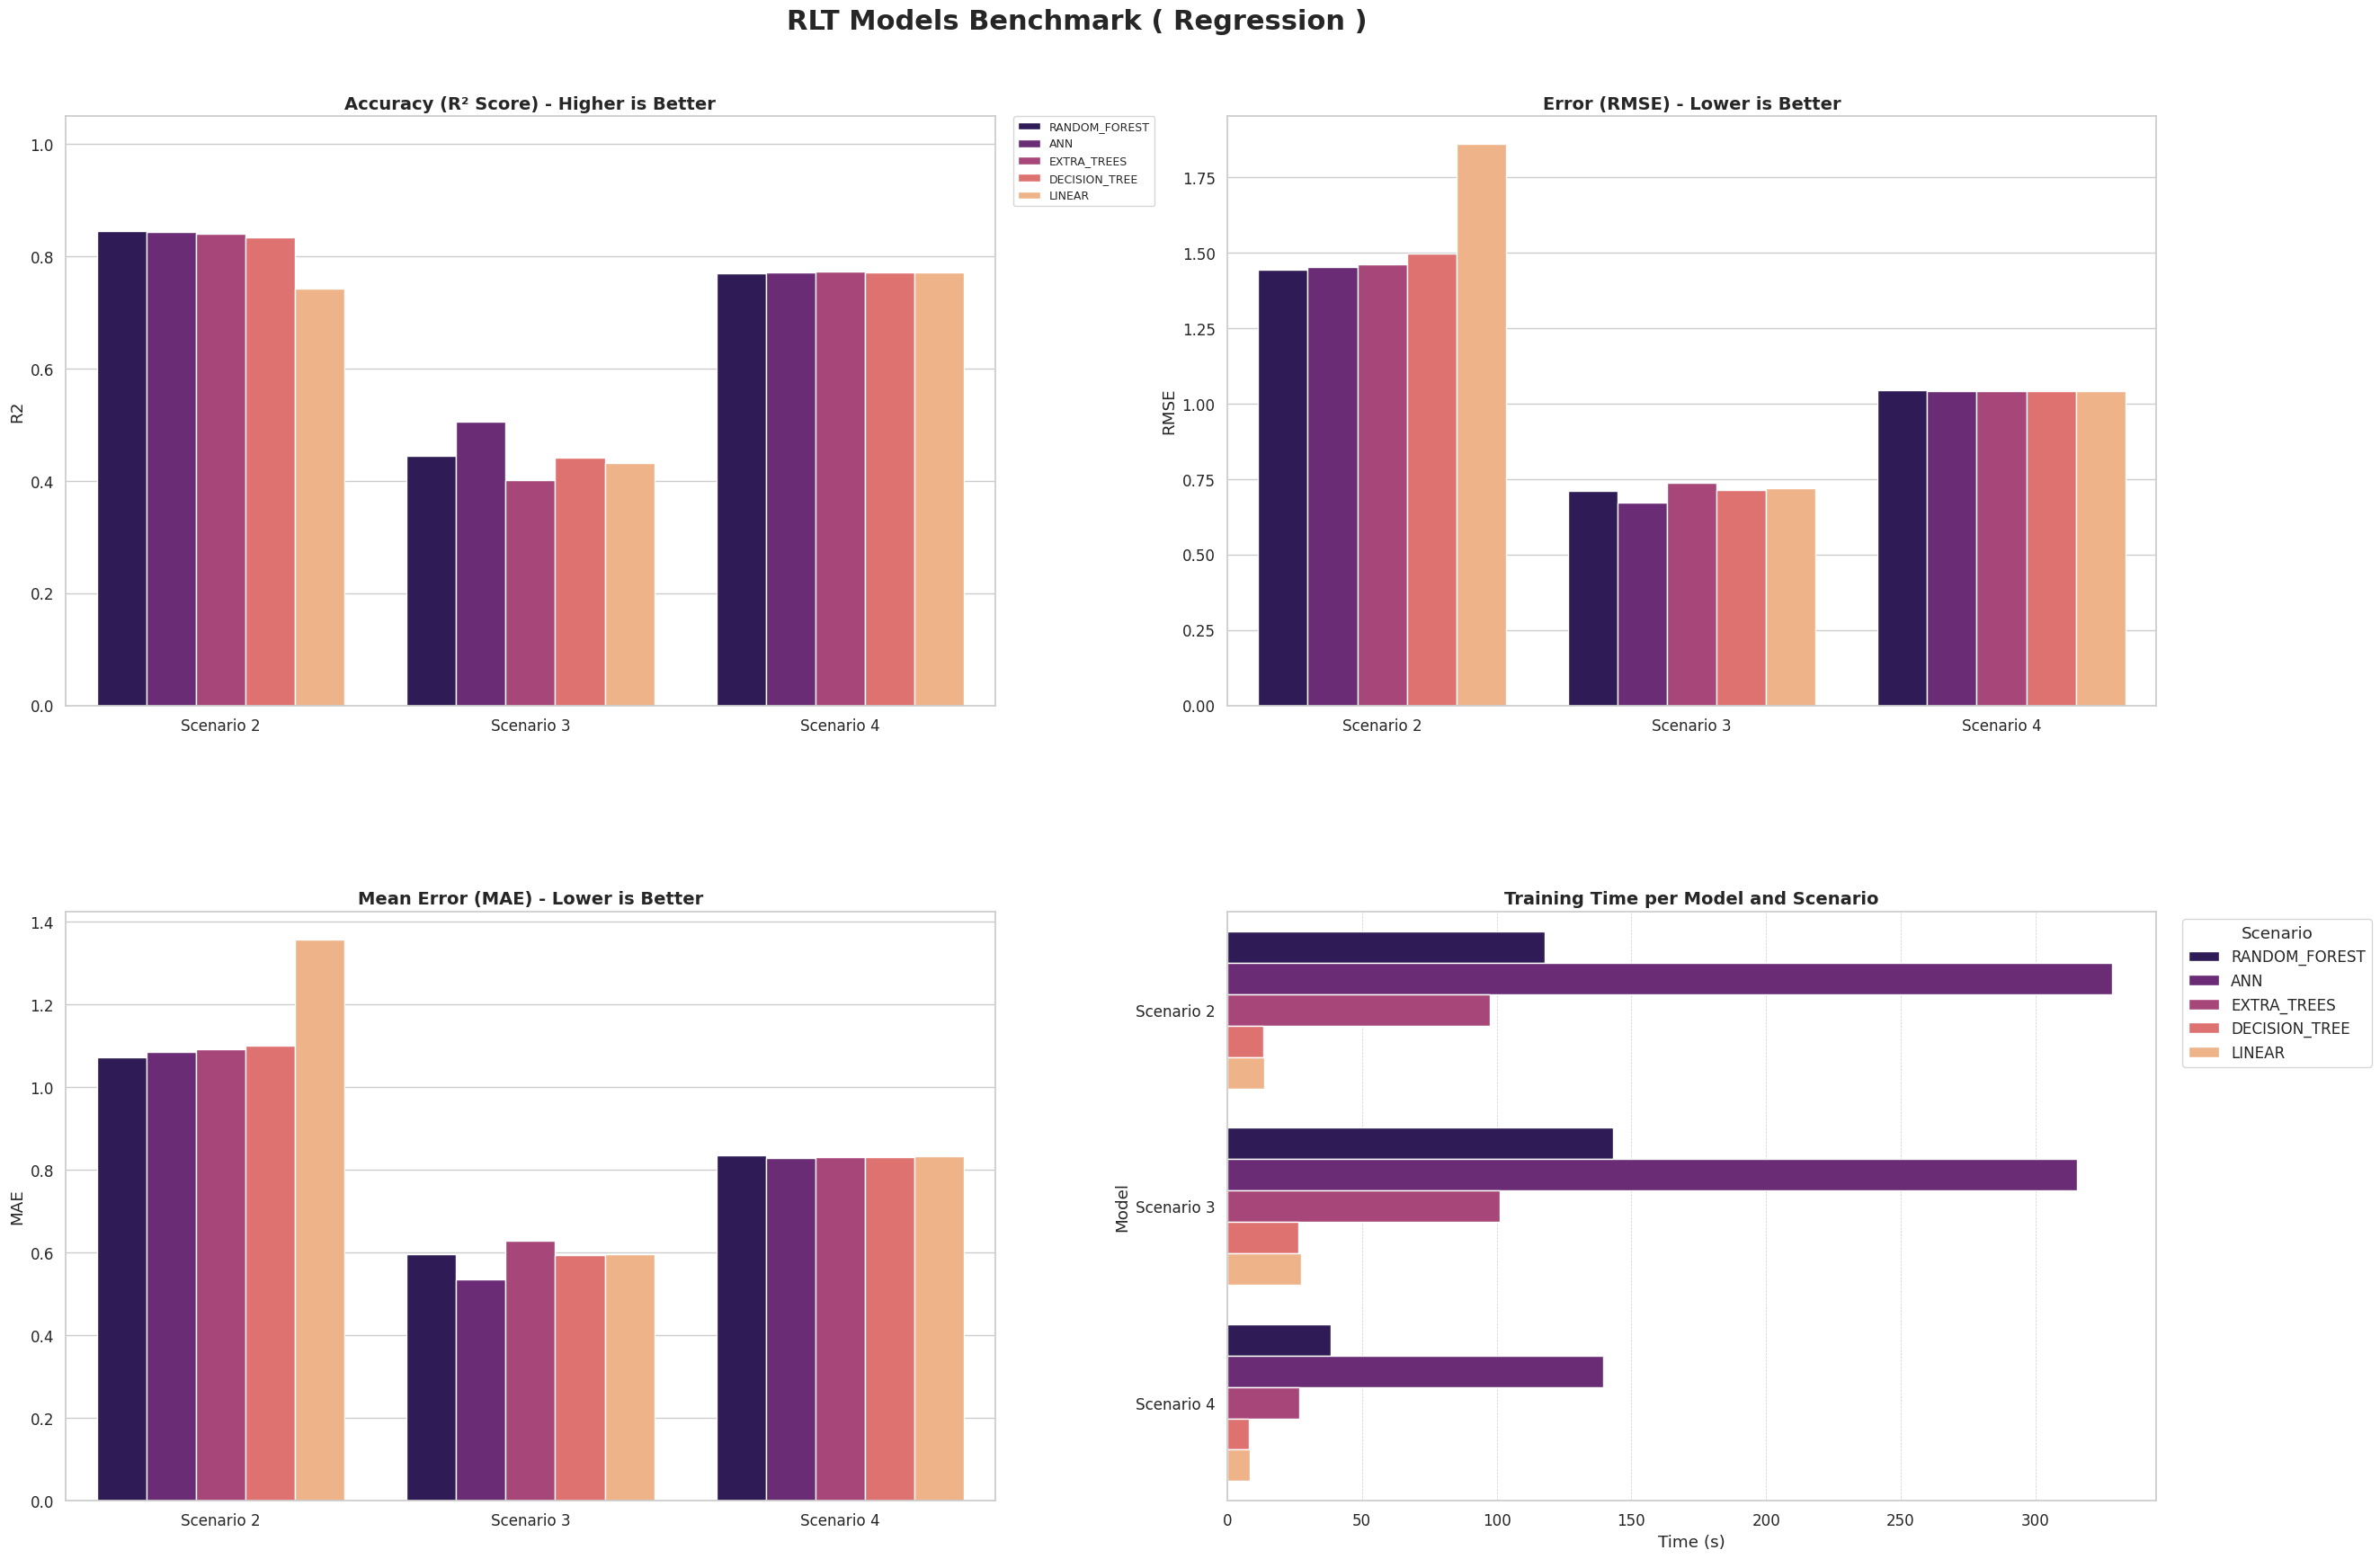

In [76]:
# ==============================================================================
#  1. LOAD DATA
# ==============================================================================
def load_data():
    try:
        # Load only the Standard Models CSV
        df = pd.read_csv("CSV/rlt_regression_metrics.csv")
        
        # RENAME 'Model' to 'Pilot Strategy' per your request
        df.rename(columns={'Model': 'Pilot Strategy'}, inplace=True)
        
        # Sort for better plotting consistency
        df.sort_values(by=['Scenario', 'R2'], ascending=[True, False], inplace=True)
        
        return df
    except FileNotFoundError:
        print("❌ Error: 'CSV/rlt_regression_metrics.csv not found.")
        return None

# ==============================================================================
#  2. PLOTTING FUNCTION
# ==============================================================================
def create_dashboard(df):
    # Set global theme
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    # Create 2x2 Grid
    fig, axes = plt.subplots(2, 2, figsize=(30, 20))
    plt.subplots_adjust(hspace=0.35, wspace=0.25)
    
    # Title
    fig.suptitle('RLT Models Benchmark ( Regression )', fontsize=22, weight='bold', y=0.94)

    # --- 1. R2 SCORE (Accuracy) ---
    ax1 = axes[0, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='R2', 
        hue='Pilot Strategy', 
        palette='magma', 
        ax=ax1
    )
    ax1.set_title('Accuracy (R² Score) - Higher is Better', fontsize=14, weight='bold')
    ax1.set_ylim(0, 1.05)
    ax1.set_xlabel('')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=9)

    # --- 2. RMSE (Error) ---
    ax2 = axes[0, 1]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='RMSE', 
        hue='Pilot Strategy', 
        palette='magma', 
        ax=ax2
    )
    ax2.set_title('Error (RMSE) - Lower is Better', fontsize=14, weight='bold')
    ax2.set_xlabel('')
    ax2.legend().remove() # Remove legend (redundant)
    
    #3 --------------- MAE
    ax3 = axes[1, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='MAE', 
        hue='Pilot Strategy', 
        palette='magma', 
        ax=ax3
    )
    ax3.set_title('Mean Error (MAE) - Lower is Better', fontsize=14, weight='bold')
    ax3.set_xlabel('')
    ax3.legend().remove() # Remove legend (redundant)

    # --- 3. EFFICIENCY FRONTIER (Time vs R2) ---
    
    

    ax4 = axes[1, 1]

    

    # Horizontal bar plot: models on y-axis, time on x-axis
    sns.barplot(
        data=df,
        y='Scenario',   # Models
        x='Time (s)',         # Training time
        hue='Pilot Strategy',       # Split by scenario
        palette='magma',
        ci=None,              # No confidence interval
        ax=ax4
    )

    ax4.set_title('Training Time per Model and Scenario', fontsize=14, weight='bold')
    ax4.set_xlabel('Time (s)')
    ax4.set_ylabel('Model')
    ax4.grid(True, axis='x', ls="--", linewidth=0.5)
    ax4.legend(title='Scenario', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Save and Show
    filename = 'visualization/RLT_regression_metrics.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Dashboard saved to '{filename}'")
    plt.show()

# ==============================================================================
#  3. RUN
# ==============================================================================
if __name__ == "__main__":
    df = load_data()
    if df is not None:
        create_dashboard(df)

- Use **ensemble trees** for complex nonlinear data.
- Use **ANN** only when marginal accuracy gains justify high cost.
- Prefer **simpler models** when performance differences are negligible.

✅ Table saved as 'visualization/rlt_regression_winners_table.png'


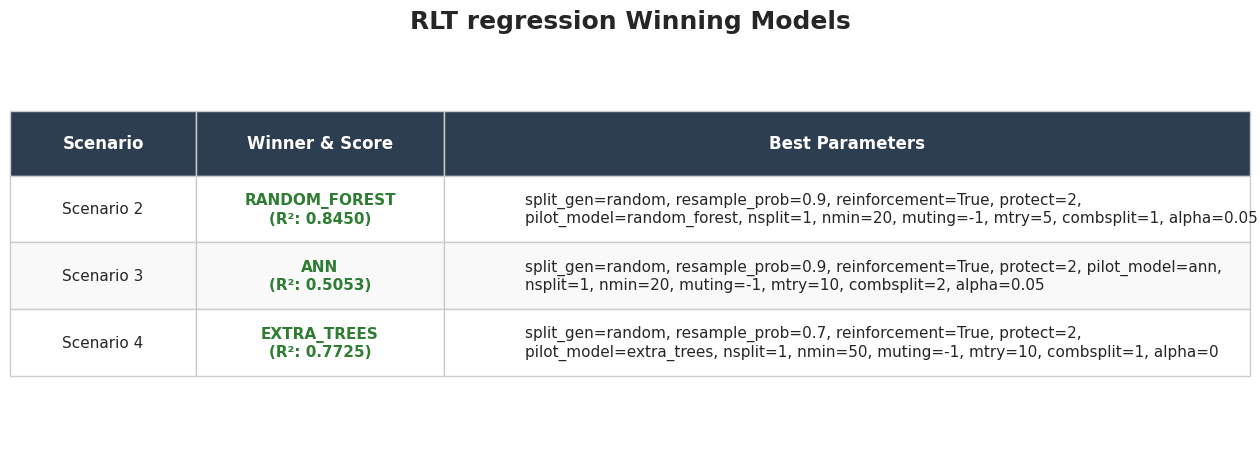

In [ ]:
# ==============================================================================
#  1. DATA PREPARATION
# ==============================================================================
def get_clean_winners():
    try:
        df = pd.read_csv("CSV/rlt_regression_metrics.csv")
    except FileNotFoundError:
        print("❌ Error: CSV file not found.")
        return None

    # Find Winners
    winner_indices = df.groupby('Scenario')['R2'].idxmax()
    winners = df.loc[winner_indices].copy()
    
    # Param columns
    param_cols = [c for c in df.columns if c.startswith('param_')]
    
    # Process each row
    table_data = []
    
    for _, row in winners.iterrows():
        # 1. Format Model & R2 (Col 2)
        # We combine them to save horizontal space: "XGBoost (0.95)"
        model_str = f"{row['Pilot Strategy']}\n(R²: {row['R2']:.4f})"
        
        # 2. Format Parameters (Col 3)
        valid_params = []
        for col in param_cols:
            val = row[col]
            if pd.notna(val) and str(val) != 'nan':
                key = col.replace('param_', '')
                # Format floats nicely
                val_str = f"{val:.4g}" if isinstance(val, float) else str(val)
                valid_params.append(f"{key}={val_str}")
        
        # Join and Wrap Text
        raw_param_str = ", ".join(valid_params)
        # Wrap text every 90 characters so it fits in the wide column
        wrapped_param_str = "\n".join(textwrap.wrap(raw_param_str, width=90))
        
        table_data.append([
            row['Scenario'], 
            model_str, 
            wrapped_param_str
        ])
        
    return pd.DataFrame(table_data, columns=["Scenario", "Winner & Score", "Best Parameters"])

# ==============================================================================
#  2. PLOTTING
# ==============================================================================
def plot_custom_table(df):
    if df is None: return

    # Adjust figure size based on content
    # Height = Header + (Rows * Height_Multiplier)
    fig_height = 2 + (len(df) * 1.2) 
    fig, ax = plt.subplots(figsize=(16, fig_height)) 
    
    ax.axis('off')

    # Define Column Widths (Sum should be close to 1.0)
    # Col 1 (Scenario): 15%
    # Col 2 (Model):    20%
    # Col 3 (Params):   65%
    widths = [0.15, 0.20, 0.65]

    # Create Table
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='left',
        loc='center',
        colWidths=widths
    )

    # Styling
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 4) # Make rows taller to fit wrapped text

    # Apply specific styles to cells
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#cccccc')
        cell.set_linewidth(1)
        
        # Header Row
        if row == 0:
            cell.set_text_props(weight='bold', color='white', size=12)
            cell.set_facecolor('#2c3e50') # Dark Blue/Grey
            cell.set_height(0.15)
            cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        else:
            # Body Rows
            cell.set_text_props(verticalalignment='center')
            
            # Padding
            cell.set_text_props(horizontalalignment='left')
            
            # Alternating Row Colors
            if row % 2 == 0:
                cell.set_facecolor('#f9f9f9')
            else:
                cell.set_facecolor('#ffffff')

            # Center the Scenario and Model columns (0 and 1)
            if col in [0, 1]:
                cell.set_text_props(horizontalalignment='center')
                
            # Bold the Winner Name (Col 1)
            if col == 1:
                cell.set_text_props(weight='bold', color='#2e7d32') # Green

    plt.title("RLT regression Winning Models", fontsize=18, weight='bold', y=0.98)
    
    filename = "visualization/rlt_regression_winners_table.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Table saved as '{filename}'")
    plt.show()

# ==============================================================================
#  3. EXECUTION
# ==============================================================================
if __name__ == "__main__":
    df = get_clean_winners()
    plot_custom_table(df)

##### Classification

**Run Randomized search ( Classification )**

In [34]:
# ==============================================================================
#  SETUP
# ==============================================================================
# Define your classification scenarios here
scenarios_clf = {
    "Scenario 1 (Class)": (sc1_X, sc1_y),
}

# Master Dictionary
scenario_results_clf = {}


# ==============================================================================
#  MAIN LOOP
# ==============================================================================
for scenario_name, (X_curr, y_curr) in scenarios_clf.items():
    
    print("\n" + "#"*80)
    print(f" PROCESSING: {scenario_name}")
    print("#"*80)
    
    # 1. Initialize RLT for Classification
    rlt_clf = RLT(n_jobs=-1, model="classification", ntrees=50)

    # 2. Search (Optimizing for Accuracy)
    rs_clf = RandomizedSearchCV(
        estimator=rlt_clf,
        param_distributions=param_distributions,
        n_iter=n_iter_search,
        cv=cv_folds,
        verbose=0,
        n_jobs=-1,
        random_state=42,
        scoring='accuracy' 
    )
    
    total_fits = n_iter_search * cv_folds
    
    with tqdm_joblib(tqdm(desc=f"Searching {scenario_name}", total=total_fits, unit="fit")) as progress_bar:
        rs_clf.fit(X_curr, y_curr)


    # 3. Process Results
    df_results = pd.DataFrame(rs_clf.cv_results_)
    
    def get_group_name(row):
        if row['param_reinforcement'] is False:
            return "NO REINFORCEMENT"
        else:
            return str(row['param_pilot_model']).upper()

    df_results['model_group'] = df_results.apply(get_group_name, axis=1)

    # Find best indices per group
    best_indices = df_results.groupby('model_group')['mean_test_score'].idxmax()
    best_per_pilot_df = df_results.loc[best_indices].sort_values(by='mean_test_score', ascending=False).copy()
    
    # ==========================================================================
    #  CALCULATE FULL METRICS
    # ==========================================================================
    print("Benchmarking winners...")
    detailed_metrics_list = []
    
    for _, row in tqdm(best_per_pilot_df.iterrows(), total=len(best_per_pilot_df), desc="Benchmarking"):
        pilot_name = row['model_group']
        best_params = row['params']
        
        # Re-instantiate model
        winner_model = RLT(n_jobs=-1, model="classification", **best_params)
        
        # Cross-Val Predict to get clean test-like predictions
        start_time = time.time()
        y_cv_pred = cross_val_predict(winner_model, X_curr, y_curr, cv=cv_folds, n_jobs=-1)
        end_time = time.time()
        
        # Calculate Metrics
        metrics = calculate_classification_metrics(
            y_curr, 
            y_cv_pred, 
            pilot_name, 
            best_params,
            training_time=(end_time - start_time)
        )
        detailed_metrics_list.append(metrics)
        
    benchmarks_df = pd.DataFrame(detailed_metrics_list)
    
    # Identify Overall Best (by Accuracy)
    overall_best_row = benchmarks_df.loc[benchmarks_df['Accuracy'].idxmax()]
    
    # Store
    scenario_results_clf[scenario_name] = {
        "benchmarks_df": benchmarks_df,
        "overall_best_metrics": overall_best_row.to_dict(),
        "overall_best_params": overall_best_row["Best Params"],
        "raw_cv_results": df_results
    }

    # ==========================================================================
    #  DISPLAY RESULTS
    # ==========================================================================
    print(f"\n--- {scenario_name}: Detailed Benchmark ---")
    display_cols = [c for c in benchmarks_df.columns if c != "Best Params"]
    print(benchmarks_df[display_cols].to_string(index=False))
    
    print(f"\n >> OVERALL WINNER: {overall_best_row['Pilot Strategy']} (Acc: {overall_best_row['Accuracy']})")

print("\n" + "="*80)
print(" DONE. Results stored in 'scenario_results_clf'.")
print(" Access via: scenario_results_clf['Scenario 2 (Class)']['benchmarks_df']")
print("="*80)


################################################################################
 PROCESSING: Scenario 1 (Class)
################################################################################


Searching Scenario 1 (Class):   6%|██▉                                                | 23/400 [03:16<32:44,  5.21s/fit]/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/mohamed/RLT MOHH/.venv/lib/python3.12/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configurati

Benchmarking winners...


Benchmarking: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [11:17<00:00, 135.50s/it]


--- Scenario 1 (Class): Detailed Benchmark ---
Pilot Strategy  Accuracy  Bal. Acc.  F1 (W)  Precision  Recall    MCC  Time (s)
 DECISION_TREE    0.5350     0.5346  0.5341     0.5349  0.5350 0.0695   26.6513
           ANN    0.5250     0.5246  0.5242     0.5248  0.5250 0.0494  376.9619
 RANDOM_FOREST    0.5155     0.5150  0.5142     0.5152  0.5155 0.0302  178.7492
   EXTRA_TREES    0.5220     0.5218  0.5217     0.5219  0.5220 0.0436   62.0657
        LINEAR    0.5210     0.5206  0.5198     0.5208  0.5210 0.0413   33.0519

 >> OVERALL WINNER: DECISION_TREE (Acc: 0.535)

 DONE. Results stored in 'scenario_results_clf'.
 Access via: scenario_results_clf['Scenario 2 (Class)']['benchmarks_df']


**Export to CSV**

In [78]:
import pandas as pd

# 1. Collect all dataframes from the dictionary
all_dfs = []

for scenario_name, result_data in scenario_results_clf.items():
    # Get the metrics dataframe
    df = result_data['benchmarks_df'].copy()
    
    # Add a column for the Scenario Name (so we know which rows belong to Sc2, Sc3, etc.)
    df.insert(0, 'Scenario', scenario_name)
    
    all_dfs.append(df)

# 2. Combine into one big DataFrame
final_df = pd.concat(all_dfs, ignore_index=True)

# 3. Flatten the "Best Params" dictionary into separate columns
# This turns {'ntrees': 50, 'alpha': 0.1} into columns: "param_ntrees", "param_alpha"
if 'Best Params' in final_df.columns:
    # Expand dictionary keys into columns
    params_expanded = final_df['Best Params'].apply(pd.Series).add_prefix('param_')
    
    # Join back to original data and drop the dictionary column
    final_df = pd.concat([final_df.drop(columns=['Best Params']), params_expanded], axis=1)

# 4. Save to CSV
output_filename = "CSV/rlt_classification_metrics.csv"
final_df.to_csv(output_filename, index=False)

print(f"✅ Success! Results saved to '{output_filename}'")
print(f"   Rows: {len(final_df)}")
print(f"   Columns: {list(final_df.columns)}")

✅ Success! Results saved to 'CSV/rlt_classification_metrics.csv'
   Rows: 5
   Columns: ['Scenario', 'Pilot Strategy', 'Accuracy', 'Bal. Acc.', 'F1 (W)', 'Precision', 'Recall', 'MCC', 'Time (s)', 'param_split_gen', 'param_resample_prob', 'param_reinforcement', 'param_protect', 'param_pilot_model', 'param_nsplit', 'param_nmin', 'param_muting', 'param_mtry', 'param_combsplit', 'param_alpha']


### Evaluation ( RLT Classification )

✅ Dashboard saved to 'visualization/RLT_classification_metrics.png'


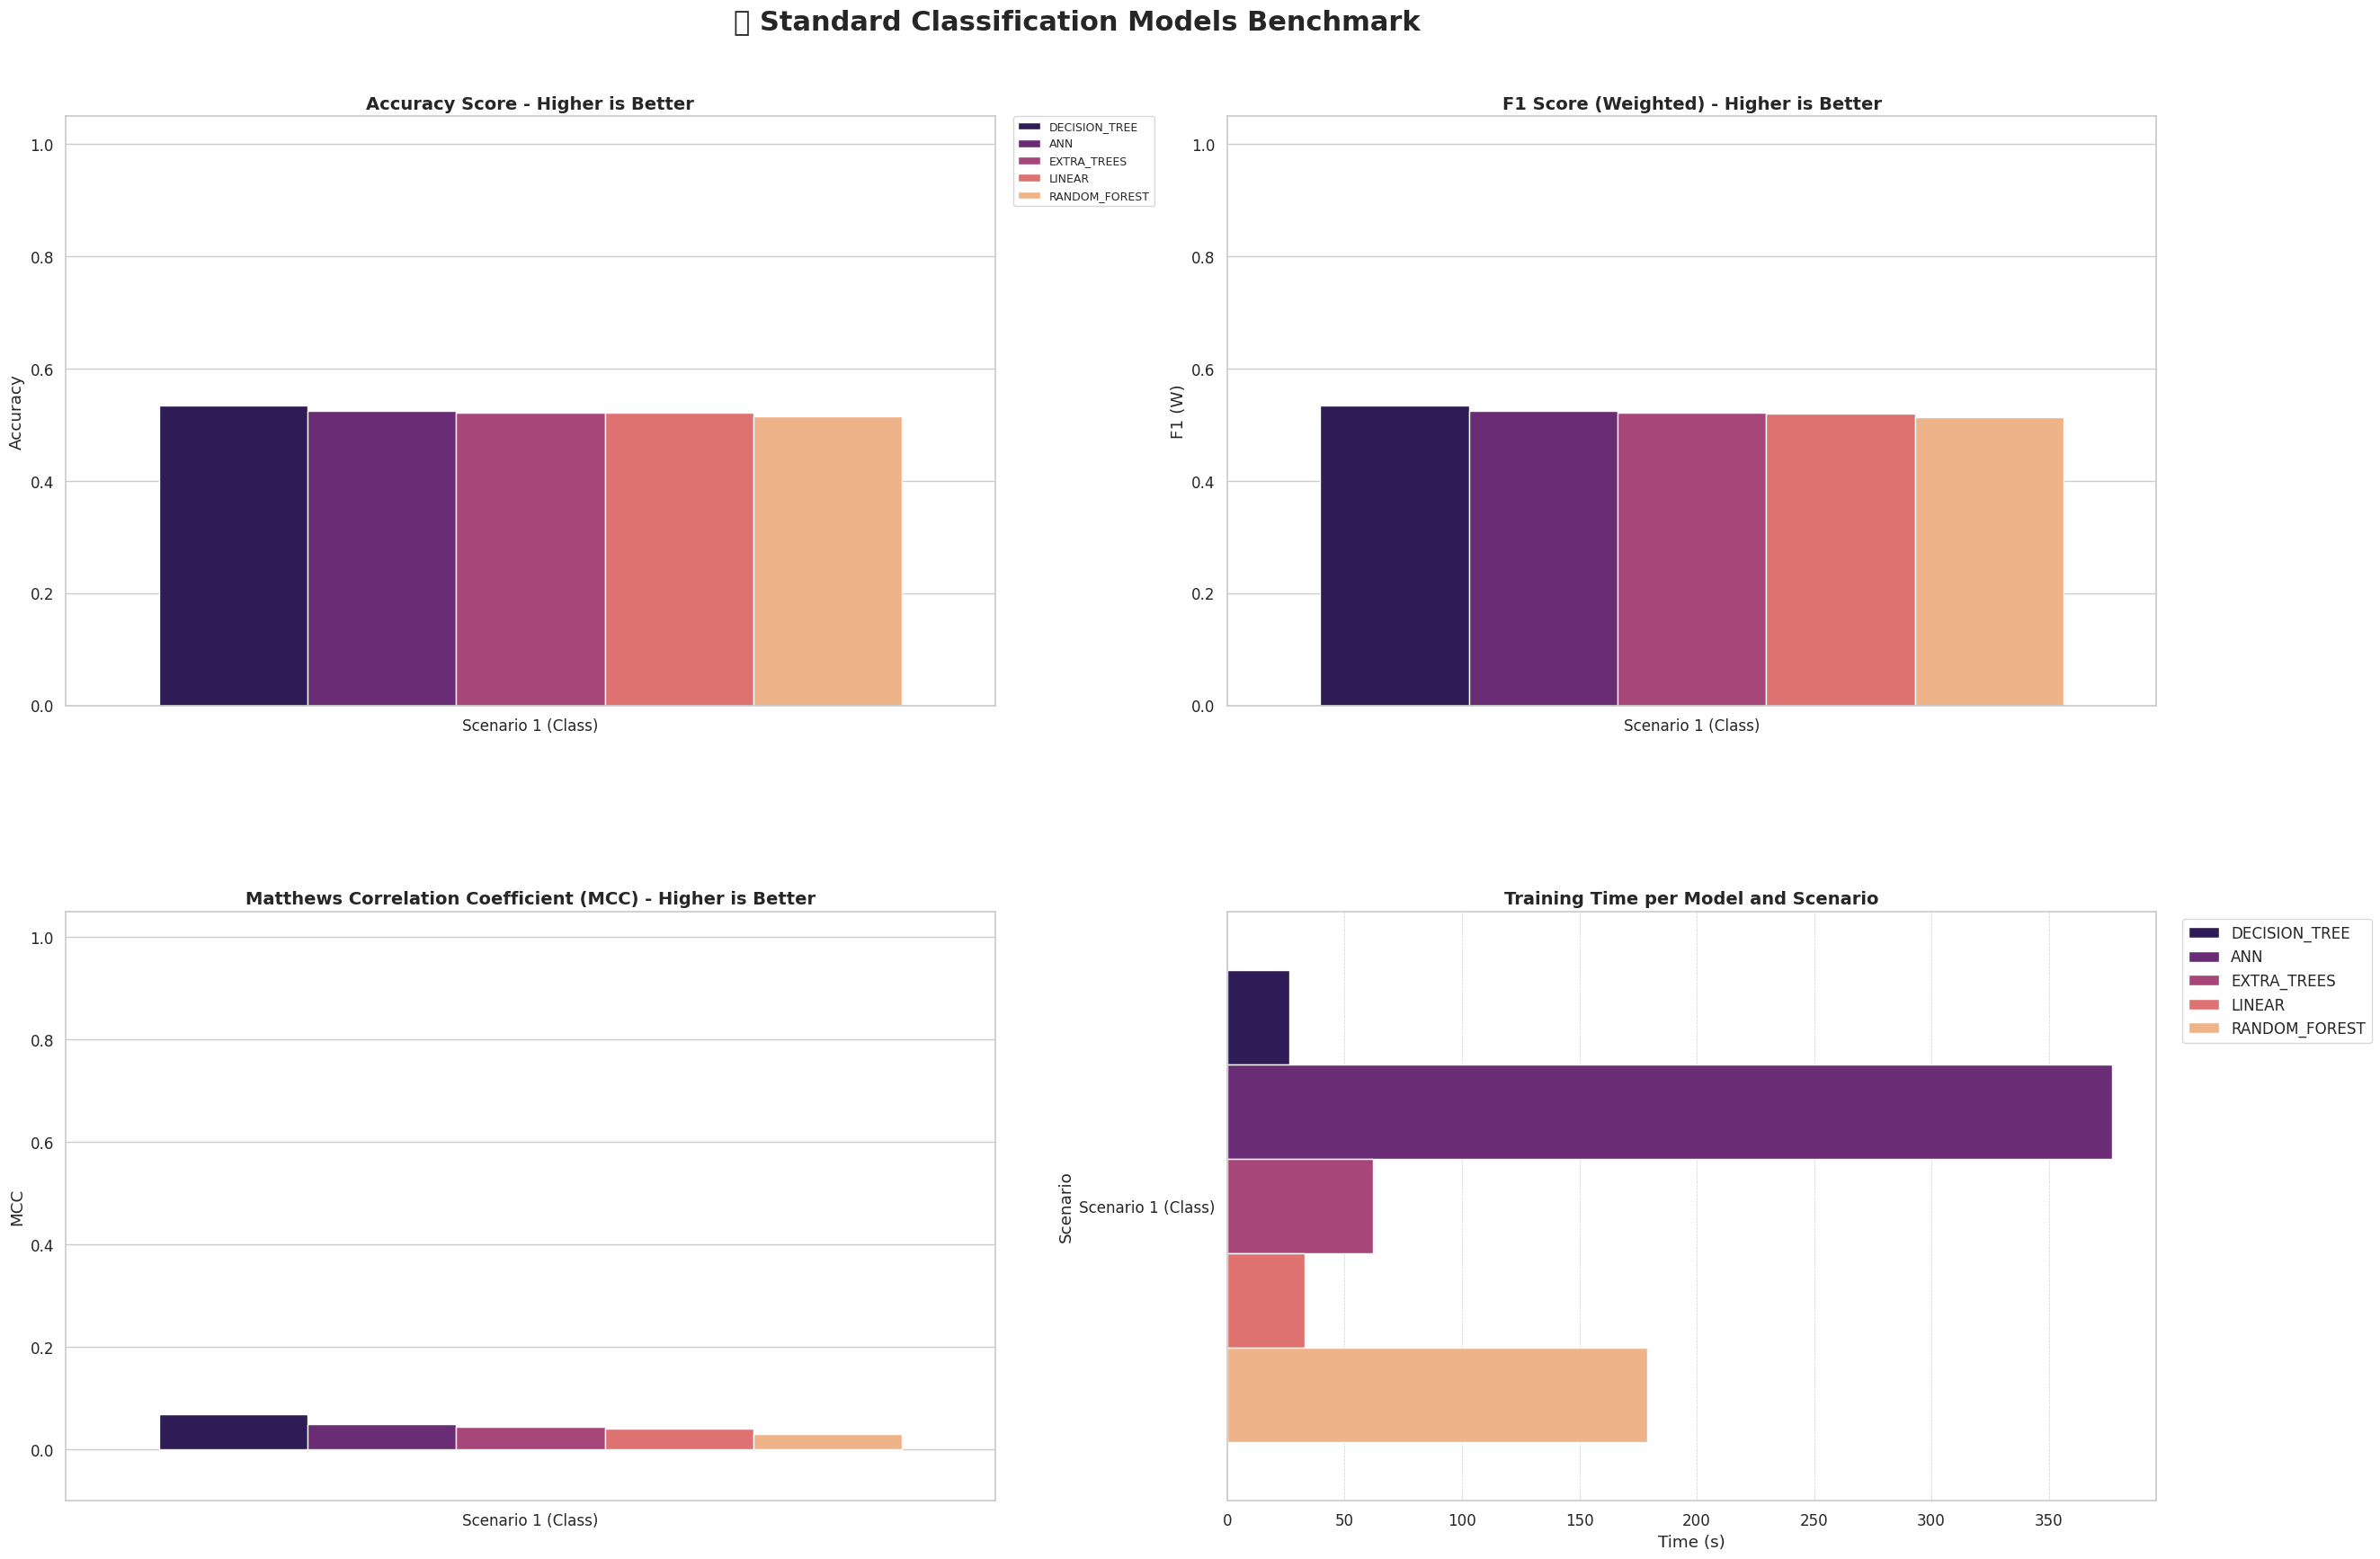

In [ ]:
# ==============================================================================
#  1. LOAD DATA
# ==============================================================================
def load_data():
    try:
        # Load the Classification Benchmark CSV
        df = pd.read_csv("CSV/rlt_classification_metrics.csv")
        
        # RENAME 'Model' to 'Pilot Strategy' if needed (standardizing names)
        if 'Model' in df.columns:
            df.rename(columns={'Model': 'Pilot Strategy'}, inplace=True)
        
        # Sort by Scenario and Accuracy for better plotting consistency
        # We use Accuracy as the primary sorting metric here
        df.sort_values(by=['Scenario', 'Accuracy'], ascending=[True, False], inplace=True)
        
        return df
    except FileNotFoundError:
        print("❌ Error: 'CSV/rlt_classification_metrics.csv' not found.")
        return None

# ==============================================================================
#  2. PLOTTING FUNCTION
# ==============================================================================
def create_dashboard(df):
    # Set global theme
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    # Create 2x2 Grid
    fig, axes = plt.subplots(2, 2, figsize=(30, 20))
    plt.subplots_adjust(hspace=0.35, wspace=0.25)
    
    # Title
    fig.suptitle('📊 Standard Classification Models Benchmark', fontsize=22, weight='bold', y=0.94)

    # --- 1. ACCURACY ---
    ax1 = axes[0, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='Accuracy', 
        hue='Pilot Strategy', 
        palette='magma', 
        ax=ax1
    )
    ax1.set_title('Accuracy Score - Higher is Better', fontsize=14, weight='bold')
    ax1.set_ylim(0, 1.05)
    ax1.set_xlabel('')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=9)

    # --- 2. F1 SCORE (Weighted) ---
    ax2 = axes[0, 1]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='F1 (W)', 
        hue='Pilot Strategy', 
        palette='magma', 
        ax=ax2
    )
    ax2.set_title('F1 Score (Weighted) - Higher is Better', fontsize=14, weight='bold')
    ax2.set_ylim(0, 1.05)
    ax2.set_xlabel('')
    ax2.legend().remove() # Remove legend (redundant)
    
    # --- 3. MCC (Matthews Correlation Coefficient) ---
    # MCC is often considered the most informative single metric
    ax3 = axes[1, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='MCC', 
        hue='Pilot Strategy', 
        palette='magma', 
        ax=ax3
    )
    ax3.set_title('Matthews Correlation Coefficient (MCC) - Higher is Better', fontsize=14, weight='bold')
    ax3.set_xlabel('')
    # MCC can technically be negative, but usually 0 to 1 for decent models
    ax3.set_ylim(-0.1, 1.05) 
    ax3.legend().remove() 

    # --- 4. TRAINING TIME ---
    ax4 = axes[1, 1]
    sns.barplot(
        data=df,
        y='Scenario',         
        x='Time (s)',         
        hue='Pilot Strategy',       
        palette='magma',
        errorbar=None,              
        ax=ax4
    )

    ax4.set_title('Training Time per Model and Scenario', fontsize=14, weight='bold')
    ax4.set_xlabel('Time (s)')
    ax4.set_ylabel('Scenario')
    ax4.grid(True, axis='x', ls="--", linewidth=0.5)
    ax4.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Save and Show
    filename = 'visualization/RLT_classification_metrics.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Dashboard saved to '{filename}'")
    plt.show()

# ==============================================================================
#  3. RUN
# ==============================================================================
if __name__ == "__main__":
    df = load_data()
    if df is not None:
        create_dashboard(df)

✅ Table saved as 'visualization/rlt_classification_winners_table.png'


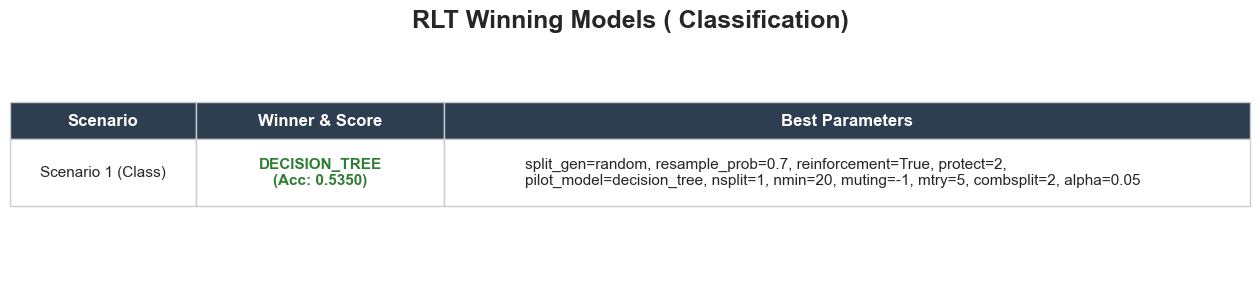

In [175]:
# ==============================================================================
#  1. DATA PREPARATION (CLASSIFICATION VERSION)
# ==============================================================================
def get_clean_winners():
    try:
        # Load Classification CSV
        df = pd.read_csv("CSV/rlt_classification_metrics.csv")
    except FileNotFoundError:
        print("❌ Error: 'CSV/rlt_classification_metrics.csv not found.")
        return None

    # Find Winners based on ACCURACY
    # (You can change 'Accuracy' to 'F1 (W)' or 'MCC' if you prefer those metrics)
    winner_indices = df.groupby('Scenario')['Accuracy'].idxmax()
    winners = df.loc[winner_indices].copy()
    
    # Param columns
    param_cols = [c for c in df.columns if c.startswith('param_')]
    
    # Process each row
    table_data = []
    
    for _, row in winners.iterrows():
        # 1. Format Model & Accuracy (Col 2)
        # Display: "XGBoost\n(Acc: 0.9512)"
        model_str = f"{row['Pilot Strategy']}\n(Acc: {row['Accuracy']:.4f})"
        
        # 2. Format Parameters (Col 3)
        valid_params = []
        for col in param_cols:
            val = row[col]
            if pd.notna(val) and str(val) != 'nan':
                key = col.replace('param_', '')
                # Format floats nicely
                val_str = f"{val:.4g}" if isinstance(val, float) else str(val)
                valid_params.append(f"{key}={val_str}")
        
        # Join and Wrap Text
        raw_param_str = ", ".join(valid_params)
        # Wrap text every 90 characters so it fits in the wide column
        wrapped_param_str = "\n".join(textwrap.wrap(raw_param_str, width=90))
        
        table_data.append([
            row['Scenario'], 
            model_str, 
            wrapped_param_str
        ])
        
    return pd.DataFrame(table_data, columns=["Scenario", "Winner & Score", "Best Parameters"])

# ==============================================================================
#  2. PLOTTING
# ==============================================================================
def plot_custom_table(df):
    if df is None: return

    # Adjust figure size based on content
    # Height = Header + (Rows * Height_Multiplier)
    fig_height = 2 + (len(df) * 1.2) 
    fig, ax = plt.subplots(figsize=(16, fig_height)) 
    
    ax.axis('off')

    # Define Column Widths (Sum should be close to 1.0)
    # Col 1 (Scenario): 15%
    # Col 2 (Model):    20%
    # Col 3 (Params):   65%
    widths = [0.15, 0.20, 0.65]

    # Create Table
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='left',
        loc='center',
        colWidths=widths
    )

    # Styling
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 4) # Make rows taller to fit wrapped text

    # Apply specific styles to cells
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#cccccc')
        cell.set_linewidth(1)
        
        # Header Row
        if row == 0:
            cell.set_text_props(weight='bold', color='white', size=12)
            cell.set_facecolor('#2c3e50') # Dark Blue/Grey
            cell.set_height(0.15)
            cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        else:
            # Body Rows
            cell.set_text_props(verticalalignment='center')
            cell.set_text_props(horizontalalignment='left')
            
            # Alternating Row Colors
            if row % 2 == 0:
                cell.set_facecolor('#f9f9f9')
            else:
                cell.set_facecolor('#ffffff')

            # Center the Scenario and Model columns (0 and 1)
            if col in [0, 1]:
                cell.set_text_props(horizontalalignment='center')
                
            # Bold the Winner Name (Col 1)
            if col == 1:
                cell.set_text_props(weight='bold', color='#2e7d32') # Green

    plt.title("RLT Winning Models ( Classification)", fontsize=18, weight='bold', y=0.98)
    
    filename = "visualization/rlt_classification_winners_table.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Table saved as '{filename}'")
    plt.show()

# ==============================================================================
#  3. EXECUTION
# ==============================================================================
if __name__ == "__main__":
    df = get_clean_winners()
    plot_custom_table(df)

#### Recommended Model  
✅ **Decision Tree pilot strategy**
- **Highest Accuracy**: 0.535  
- **Best Balanced Accuracy**: 0.5346  
- **Highest F1-Weighted Score**: 0.5341  
- **Reasonable MCC**: 0.0695 (better than ANN and Random Forest)  
- **Moderate Training Time**: 26.65 s, much faster than ANN (376 s)  
- **Interpretability**: Decision Tree offers easy inspection of decision rules

## Base Models  

### Tuning 7 base models 

#### Grid :

In [90]:
models_to_test = [
    (
        "Ridge Regression", 
        Ridge(), 
        {
            'alpha': [0.1, 1.0, 10.0]
        }
    ),
    (
        "Decision Tree", 
        DecisionTreeRegressor(random_state=42), 
        {
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10, 20]
        }
    ),
    (
        "Random Forest", 
        RandomForestRegressor(random_state=42, n_jobs=-1), 
        {
            'n_estimators': [100, 300],
            'max_depth': [None, 20], 
            'max_features': [1.0, 'sqrt'], 
            'min_samples_leaf': [1, 4]
        }
    ),
    (
        "Extra Trees", 
        ExtraTreesRegressor(random_state=42, n_jobs=-1), 
        {
            'n_estimators': [100, 300],
            'max_depth': [None, 20],
            'max_features': [1.0, 'sqrt'],
            'min_samples_leaf': [1, 4]
        }
    ),
    (
        "Gradient Boosting", 
        GradientBoostingRegressor(random_state=42), 
        {
            'n_estimators': [100, 300],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    ),
    (
        "XGBoost", 
        XGBRegressor(random_state=42, n_jobs=-1, verbosity=0), 
        {
            'n_estimators': [100, 300],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 6],
            'colsample_bytree': [0.7, 1.0],
            'subsample': [0.8, 1.0]
        }
    ),
    (
        "Neural Network (MLP)", 
        MLPRegressor(random_state=42, max_iter=500), 
        {
            'hidden_layer_sizes': [(100,), (100, 50)],
            'activation': ['relu'],
            'solver': ['adam','lbfgs'],
            'alpha': [0.0001, 0.01],
            'learning_rate_init': [0.001, 0.01]
        }
    )
]

#### Regression

##### Randomized search

In [ ]:
history_master = []
N_ITER_SEARCH = 20
SEARCH_CV = 3
FINAL_CV = 5

print(f"🚀 Starting Benchmark on {len(scenarios)} Scenarios with {len(models_to_test)} Models...")

for scenario_name, (X_curr, y_curr) in scenarios.items():
    print(f"\n📂 SCENARIO: {scenario_name}")
    
    scenario_best_score = -np.inf
    scenario_winner = "None"
    
    for model_name, model_inst, param_grid in tqdm(models_to_test, desc="Training"):
        
        # 1. Tuning
        search = RandomizedSearchCV(
            estimator=model_inst,
            param_distributions=param_grid,
            n_iter=N_ITER_SEARCH,
            scoring='r2',
            cv=SEARCH_CV,
            n_jobs=-1,
            random_state=42,
            verbose=0
        )
        
        try:
            search.fit(X_curr, y_curr)
        except Exception as e:
            print(f"Skipping {model_name}: {e}")
            continue
            
        # 2. Benchmark
        start_time = time.time()
        y_pred_cv = cross_val_predict(
            search.best_estimator_, 
            X_curr, 
            y_curr, 
            cv=FINAL_CV, 
            n_jobs=-1
        )
        training_time = time.time() - start_time
        
        # 3. Metrics
        metrics = calculate_detailed_metrics_reg(
            y_curr, 
            y_pred_cv, 
            model_name,  # Passed correctly here
            search.best_params_,
            training_time
        )
        metrics['Scenario'] = scenario_name
        history_master.append(metrics)
        
        if metrics['R2'] > scenario_best_score:
            scenario_best_score = metrics['R2']
            scenario_winner = f"{model_name} (R2: {metrics['R2']})"

    print(f"🏆 Winner: {scenario_winner}")

🚀 Starting Benchmark on 3 Scenarios with 7 Models...

📂 SCENARIO: Scenario 2


Training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:34<00:00, 13.45s/it]


🏆 Winner: Extra Trees (R2: 0.9133)

📂 SCENARIO: Scenario 3


Training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:46<00:00, 15.27s/it]


🏆 Winner: XGBoost (R2: 0.9195)

📂 SCENARIO: Scenario 4


Training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:20<00:00, 11.56s/it]

🏆 Winner: Ridge Regression (R2: 0.7833)


**Export to CSV**

In [92]:
print("\n💾 SAVING CSV...")
df_results = pd.DataFrame(history_master)

if 'Best Params' in df_results.columns:
    params_df = df_results['Best Params'].apply(pd.Series).add_prefix('param_')
    df_results = pd.concat([df_results.drop(columns=['Best Params']), params_df], axis=1)

# Ensure "Model" is in the column list
main_cols = ['Scenario', 'Pilot Strategy', 'R2', 'RMSE', 'MAE', 'MAPE (%)', 'MedAE', 'Max Error', 'Time (s)']
existing_main = [c for c in main_cols if c in df_results.columns]
param_cols = [c for c in df_results.columns if c.startswith('param_')]

df_final = df_results[existing_main + param_cols]
csv_filename = "CSV/base_models_regression_metrics.csv"
df_final.to_csv(csv_filename, index=False)

print(f"✅ Saved to {csv_filename}")
print(df_final[['Scenario', 'Pilot Strategy', 'R2']].head())


💾 SAVING CSV...
✅ Saved to CSV/base_models_regression_metrics.csv
     Scenario     Pilot Strategy      R2
0  Scenario 2   Ridge Regression  0.3135
1  Scenario 2      Decision Tree  0.8739
2  Scenario 2      Random Forest  0.9087
3  Scenario 2        Extra Trees  0.9133
4  Scenario 2  Gradient Boosting  0.9128


### Evaluation base Model ( Regression )

✅ Dashboard saved to 'visualization/baseModels_regression_metrics.png'


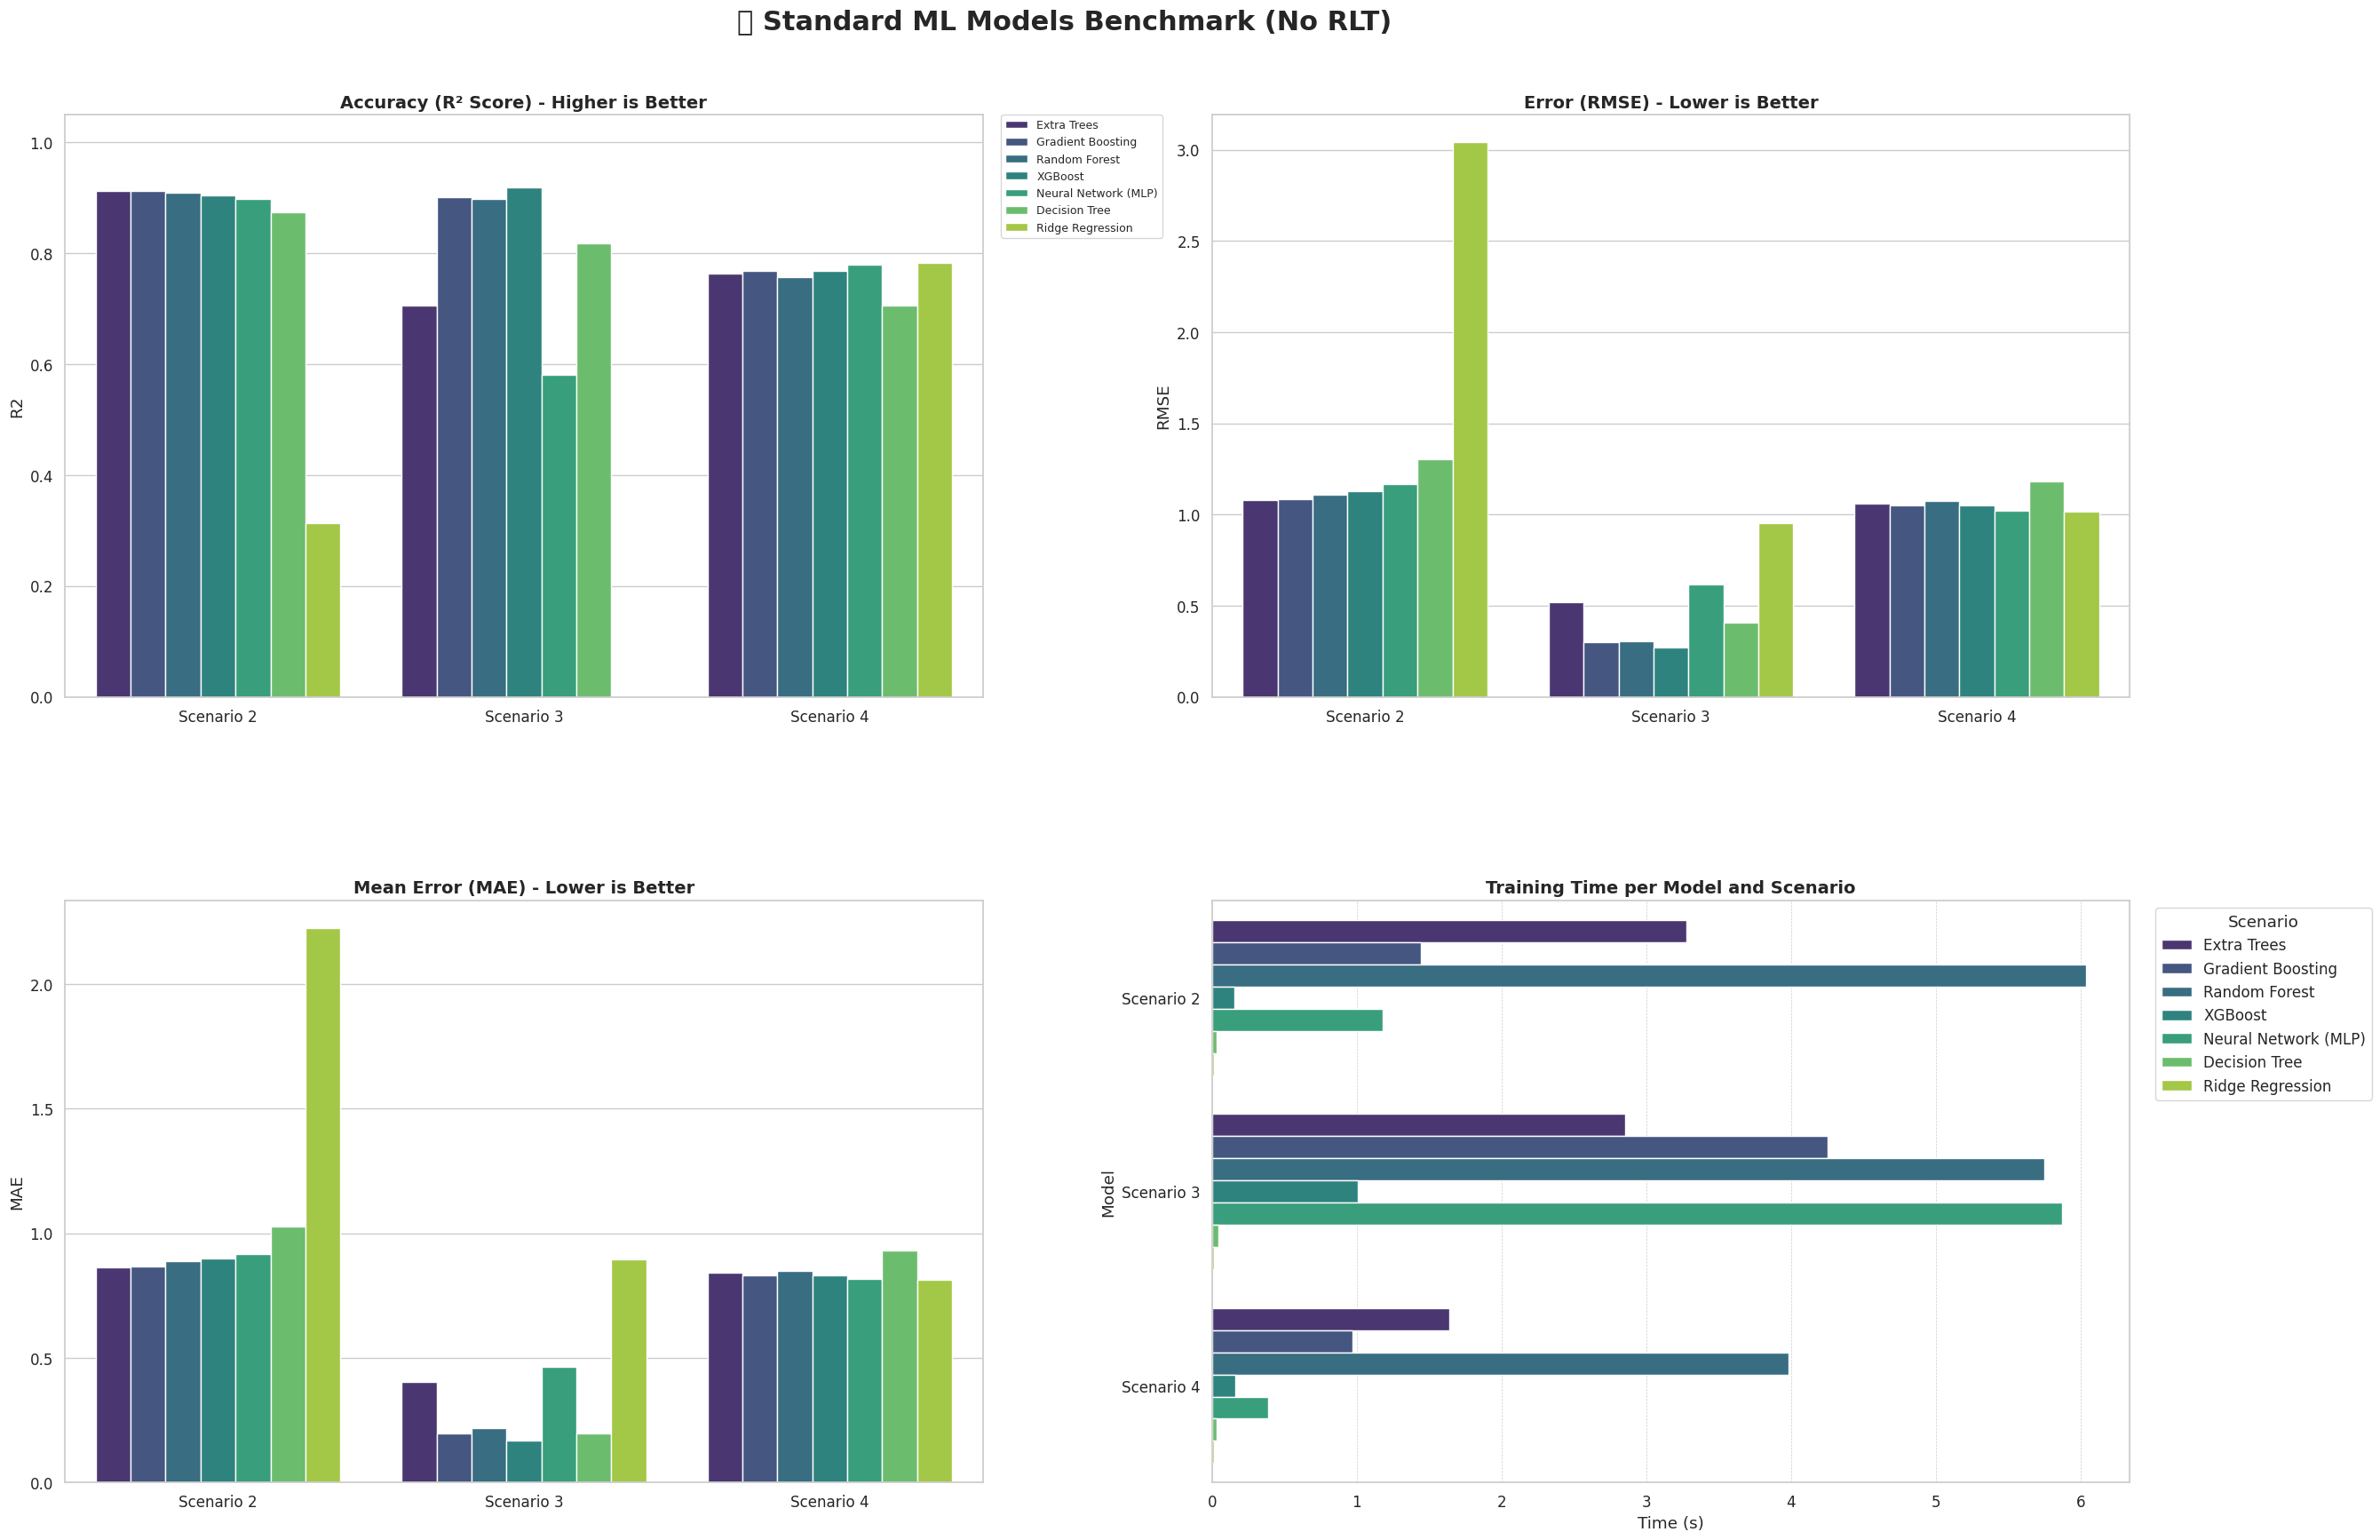

In [93]:
def load_data():
    try:
        # Load only the Standard Models CSV
        df = pd.read_csv("CSV/base_models_regression_metrics.csv")
        
        # RENAME 'Model' to 'Pilot Strategy' per your request
        df.rename(columns={'Model': 'Pilot Strategy'}, inplace=True)
        
        # Sort for better plotting consistency
        df.sort_values(by=['Scenario', 'R2'], ascending=[True, False], inplace=True)
        
        return df
    except FileNotFoundError:
        print("❌ Error: 'CSV/base_models_regression_metrics.csv' not found.")
        return None

# ==============================================================================
#  2. PLOTTING FUNCTION
# ==============================================================================
def create_dashboard(df):
    # Set global theme
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    # Create 2x2 Grid
    fig, axes = plt.subplots(2, 2, figsize=(30, 20))
    plt.subplots_adjust(hspace=0.35, wspace=0.25)
    
    # Title
    fig.suptitle('📊 Standard ML Models Benchmark (No RLT)', fontsize=22, weight='bold', y=0.94)

    # --- 1. R2 SCORE (Accuracy) ---
    ax1 = axes[0, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='R2', 
        hue='Pilot Strategy', 
        palette='viridis', 
        ax=ax1
    )
    ax1.set_title('Accuracy (R² Score) - Higher is Better', fontsize=14, weight='bold')
    ax1.set_ylim(0, 1.05)
    ax1.set_xlabel('')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=9)

    # --- 2. RMSE (Error) ---
    ax2 = axes[0, 1]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='RMSE', 
        hue='Pilot Strategy', 
        palette='viridis', 
        ax=ax2
    )
    ax2.set_title('Error (RMSE) - Lower is Better', fontsize=14, weight='bold')
    ax2.set_xlabel('')
    ax2.legend().remove() # Remove legend (redundant)
    
    #3 --------------- MAE
    ax3 = axes[1, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='MAE', 
        hue='Pilot Strategy', 
        palette='viridis', 
        ax=ax3
    )
    ax3.set_title('Mean Error (MAE) - Lower is Better', fontsize=14, weight='bold')
    ax3.set_xlabel('')
    ax3.legend().remove() # Remove legend (redundant)

    # --- 3. EFFICIENCY FRONTIER (Time vs R2) ---
    
    

    ax4 = axes[1, 1]

    

    # Horizontal bar plot: models on y-axis, time on x-axis
    sns.barplot(
        data=df,
        y='Scenario',   # Models
        x='Time (s)',         # Training time
        hue='Pilot Strategy',       # Split by scenario
        palette='viridis',
        ci=None,              # No confidence interval
        ax=ax4
    )

    ax4.set_title('Training Time per Model and Scenario', fontsize=14, weight='bold')
    ax4.set_xlabel('Time (s)')
    ax4.set_ylabel('Model')
    ax4.grid(True, axis='x', ls="--", linewidth=0.5)
    ax4.legend(title='Scenario', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Save and Show
    filename = 'visualization/baseModels_regression_metrics.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Dashboard saved to '{filename}'")
    plt.show()

# ==============================================================================
#  3. RUN
# ==============================================================================
if __name__ == "__main__":
    df = load_data()
    if df is not None:
        create_dashboard(df)

✅ Table saved as 'visualization/baseModels_regression_winners_table.png'


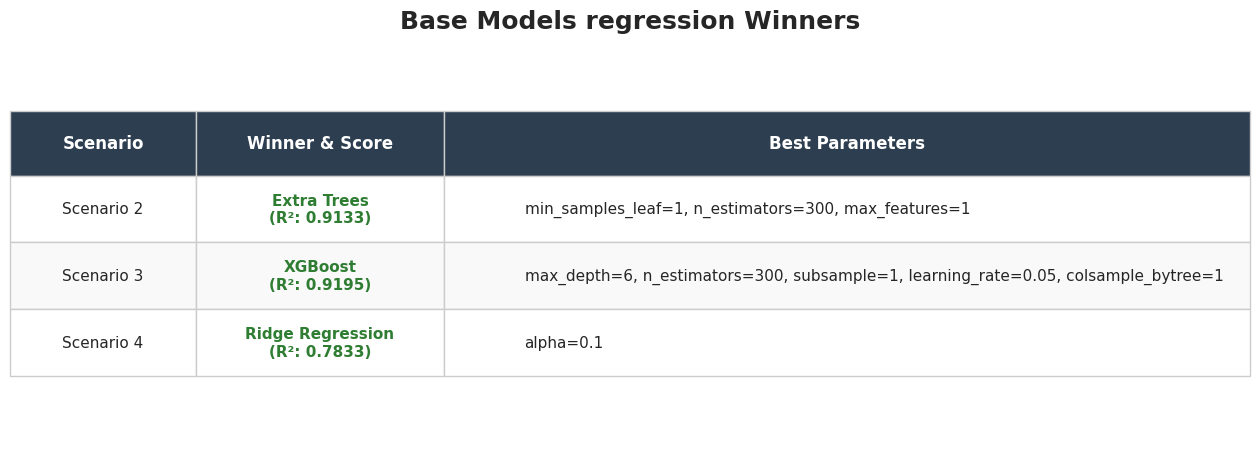

In [94]:
# ==============================================================================
#  1. DATA PREPARATION
# ==============================================================================
def get_clean_winners():
    try:
        df = pd.read_csv("CSV/base_models_regression_metrics.csv")
    except FileNotFoundError:
        print("❌ Error: CSV file not found.")
        return None

    # Find Winners
    winner_indices = df.groupby('Scenario')['R2'].idxmax()
    winners = df.loc[winner_indices].copy()
    
    # Param columns
    param_cols = [c for c in df.columns if c.startswith('param_')]
    
    # Process each row
    table_data = []
    
    for _, row in winners.iterrows():
        # 1. Format Model & R2 (Col 2)
        # We combine them to save horizontal space: "XGBoost (0.95)"
        model_str = f"{row['Pilot Strategy']}\n(R²: {row['R2']:.4f})"
        
        # 2. Format Parameters (Col 3)
        valid_params = []
        for col in param_cols:
            val = row[col]
            if pd.notna(val) and str(val) != 'nan':
                key = col.replace('param_', '')
                # Format floats nicely
                val_str = f"{val:.4g}" if isinstance(val, float) else str(val)
                valid_params.append(f"{key}={val_str}")
        
        # Join and Wrap Text
        raw_param_str = ", ".join(valid_params)
        # Wrap text every 90 characters so it fits in the wide column
        wrapped_param_str = "\n".join(textwrap.wrap(raw_param_str, width=90))
        
        table_data.append([
            row['Scenario'], 
            model_str, 
            wrapped_param_str
        ])
        
    return pd.DataFrame(table_data, columns=["Scenario", "Winner & Score", "Best Parameters"])

# ==============================================================================
#  2. PLOTTING
# ==============================================================================
def plot_custom_table(df):
    if df is None: return

    # Adjust figure size based on content
    # Height = Header + (Rows * Height_Multiplier)
    fig_height = 2 + (len(df) * 1.2) 
    fig, ax = plt.subplots(figsize=(16, fig_height)) 
    
    ax.axis('off')

    # Define Column Widths (Sum should be close to 1.0)
    # Col 1 (Scenario): 15%
    # Col 2 (Model):    20%
    # Col 3 (Params):   65%
    widths = [0.15, 0.20, 0.65]

    # Create Table
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='left',
        loc='center',
        colWidths=widths
    )

    # Styling
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 4) # Make rows taller to fit wrapped text

    # Apply specific styles to cells
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#cccccc')
        cell.set_linewidth(1)
        
        # Header Row
        if row == 0:
            cell.set_text_props(weight='bold', color='white', size=12)
            cell.set_facecolor('#2c3e50') # Dark Blue/Grey
            cell.set_height(0.15)
            cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        else:
            # Body Rows
            cell.set_text_props(verticalalignment='center')
            
            # Padding
            cell.set_text_props(horizontalalignment='left')
            
            # Alternating Row Colors
            if row % 2 == 0:
                cell.set_facecolor('#f9f9f9')
            else:
                cell.set_facecolor('#ffffff')

            # Center the Scenario and Model columns (0 and 1)
            if col in [0, 1]:
                cell.set_text_props(horizontalalignment='center')
                
            # Bold the Winner Name (Col 1)
            if col == 1:
                cell.set_text_props(weight='bold', color='#2e7d32') # Green

    plt.title("Base Models regression Winners", fontsize=18, weight='bold', y=0.98)
    
    filename = "visualization/baseModels_regression_winners_table.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Table saved as '{filename}'")
    plt.show()

# ==============================================================================
#  3. EXECUTION
# ==============================================================================
if __name__ == "__main__":
    df = get_clean_winners()
    plot_custom_table(df)

#### Classification

**Grid**

In [104]:
models_to_test = [
    (
        "Logistic Regression", 
        LogisticRegression(max_iter=1000, random_state=42), 
        {
            'C': [0.1, 1.0, 10.0, 100.0], 
            'solver': ['lbfgs', 'liblinear']
        }
    ),
    (
        "Decision Tree", 
        DecisionTreeClassifier(random_state=42), 
        {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [5, 10, 20]
        }
    ),
    (
        "Random Forest", 
        RandomForestClassifier(random_state=42, n_jobs=-1), 
        {
            'n_estimators': [100, 300],
            'max_depth': [None, 20], 
            'max_features': ['sqrt', 'log2'], 
            'min_samples_leaf': [1, 4]
        }
    ),
    (
        "Extra Trees", 
        ExtraTreesClassifier(random_state=42, n_jobs=-1), 
        {
            'n_estimators': [100, 300],
            'max_depth': [None, 20],
            'min_samples_leaf': [1, 4]
        }
    ),
    (
        "Gradient Boosting", 
        GradientBoostingClassifier(random_state=42), 
        {
            'n_estimators': [100, 300],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    ),
    (
        "XGBoost", 
        XGBClassifier(random_state=42, n_jobs=-1, verbosity=0, use_label_encoder=False), 
        {
            'n_estimators': [100, 300],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 6],
            'colsample_bytree': [0.7, 1.0],
            'subsample': [0.8, 1.0]
        }
    ),
    (
        "Neural Network (MLP)", 
        MLPClassifier(random_state=42, max_iter=500), 
        {
            'hidden_layer_sizes': [(100,), (100, 50)],
            'activation': ['relu'],
            'solver': ['adam', 'lbfgs'], 
            'alpha': [0.0001, 0.01],
            'learning_rate_init': [0.001, 0.01]
        }
    )
]

**Run**

In [ ]:


# ==============================================================================
#  3. MAIN BENCHMARK LOOP
# ==============================================================================

history_master = []
N_ITER_SEARCH = 50
SEARCH_CV = 3
FINAL_CV = 5
scenarios_clf = {
    "Scenario 1 (Class)": (sc1_X, sc1_y),
}

print(f"🚀 Starting CLASSIFICATION Benchmark on {len(scenarios)} Scenarios...")

for scenario_name, (sc1_X, sc1_y) in scenarios_clf.items():
    print(f"\n📂 SCENARIO: {scenario_name}")
    
    scenario_best_score = 0.0
    scenario_winner = "None"
    
    for model_name, model_inst, param_grid in tqdm(models_to_test, desc="Training"):
        
        # 1. Randomized Search
        search = RandomizedSearchCV(
            estimator=model_inst,
            param_distributions=param_grid,
            n_iter=N_ITER_SEARCH,
            scoring='accuracy', 
            cv=SEARCH_CV,
            n_jobs=-1,
            random_state=42,
            verbose=0
        )
        
        try:
            search.fit(X_curr, y_curr)
        except Exception as e:
            print(f"Skipping {model_name}: {e}")
            continue
            
        # 2. Benchmark Best Model
        start_time = time.time()
        y_pred_cv = cross_val_predict(
            search.best_estimator_, 
            X_curr, 
            y_curr, 
            cv=FINAL_CV, 
            n_jobs=-1
        )
        training_time = time.time() - start_time
        
        # 3. Calculate Metrics
        metrics = calculate_classification_metrics(
            y_curr, 
            y_pred_cv, 
            model_name, 
            search.best_params_,
            training_time
        )
        metrics['Scenario'] = scenario_name
        history_master.append(metrics)
        
        # Track Winner (by Accuracy)
        if metrics['Accuracy'] > scenario_best_score:
            scenario_best_score = metrics['Accuracy']
            scenario_winner = f"{model_name} (Acc: {metrics['Accuracy']:.4f})"

    print(f"🏆 Winner: {scenario_winner}")

🚀 Starting CLASSIFICATION Benchmark on 3 Scenarios...

📂 SCENARIO: Scenario 1 (Class)


Training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:26<00:00, 12.38s/it]

🏆 Winner: XGBoost (Acc: 0.6065)


**Export to CSV**

In [106]:
print("\n💾 PROCESSING RESULTS & SAVING CSV...")
df_results = pd.DataFrame(history_master)

# Expand "Best Params" dictionary into columns
if 'Best Params' in df_results.columns:
    params_df = df_results['Best Params'].apply(pd.Series).add_prefix('param_')
    df_results = pd.concat([df_results.drop(columns=['Best Params']), params_df], axis=1)

# Define column order matching your metrics function keys
# Note: "Pilot Strategy" is used here because your function returns that key
main_cols = [
    'Scenario', 'Pilot Strategy', 
    'Accuracy', 'Bal. Acc.', 'F1 (W)', 'Precision', 'Recall', 'MCC', 
    'Time (s)'
]

# Ensure columns exist before selecting
existing_main = [c for c in main_cols if c in df_results.columns]
param_cols = [c for c in df_results.columns if c.startswith('param_')]

df_final = df_results[existing_main + param_cols]

csv_filename = "CSV/baseModels_classification_metrics.csv"
df_final.to_csv(csv_filename, index=False)

print(f"✅ Saved to {csv_filename}")
print(df_final[['Scenario', 'Pilot Strategy', 'Accuracy', 'MCC']].head())


💾 PROCESSING RESULTS & SAVING CSV...
✅ Saved to CSV/baseModels_classification_metrics.csv
             Scenario       Pilot Strategy  Accuracy     MCC
0  Scenario 1 (Class)  Logistic Regression    0.5045  0.0077
1  Scenario 1 (Class)        Decision Tree    0.5115  0.0225
2  Scenario 1 (Class)        Random Forest    0.5515  0.1028
3  Scenario 1 (Class)          Extra Trees    0.5420  0.0836
4  Scenario 1 (Class)    Gradient Boosting    0.6035  0.2069


### Evaluation base Models Metrics 

✅ Dashboard saved to 'visualization/baseModels_classification_metrics.png'


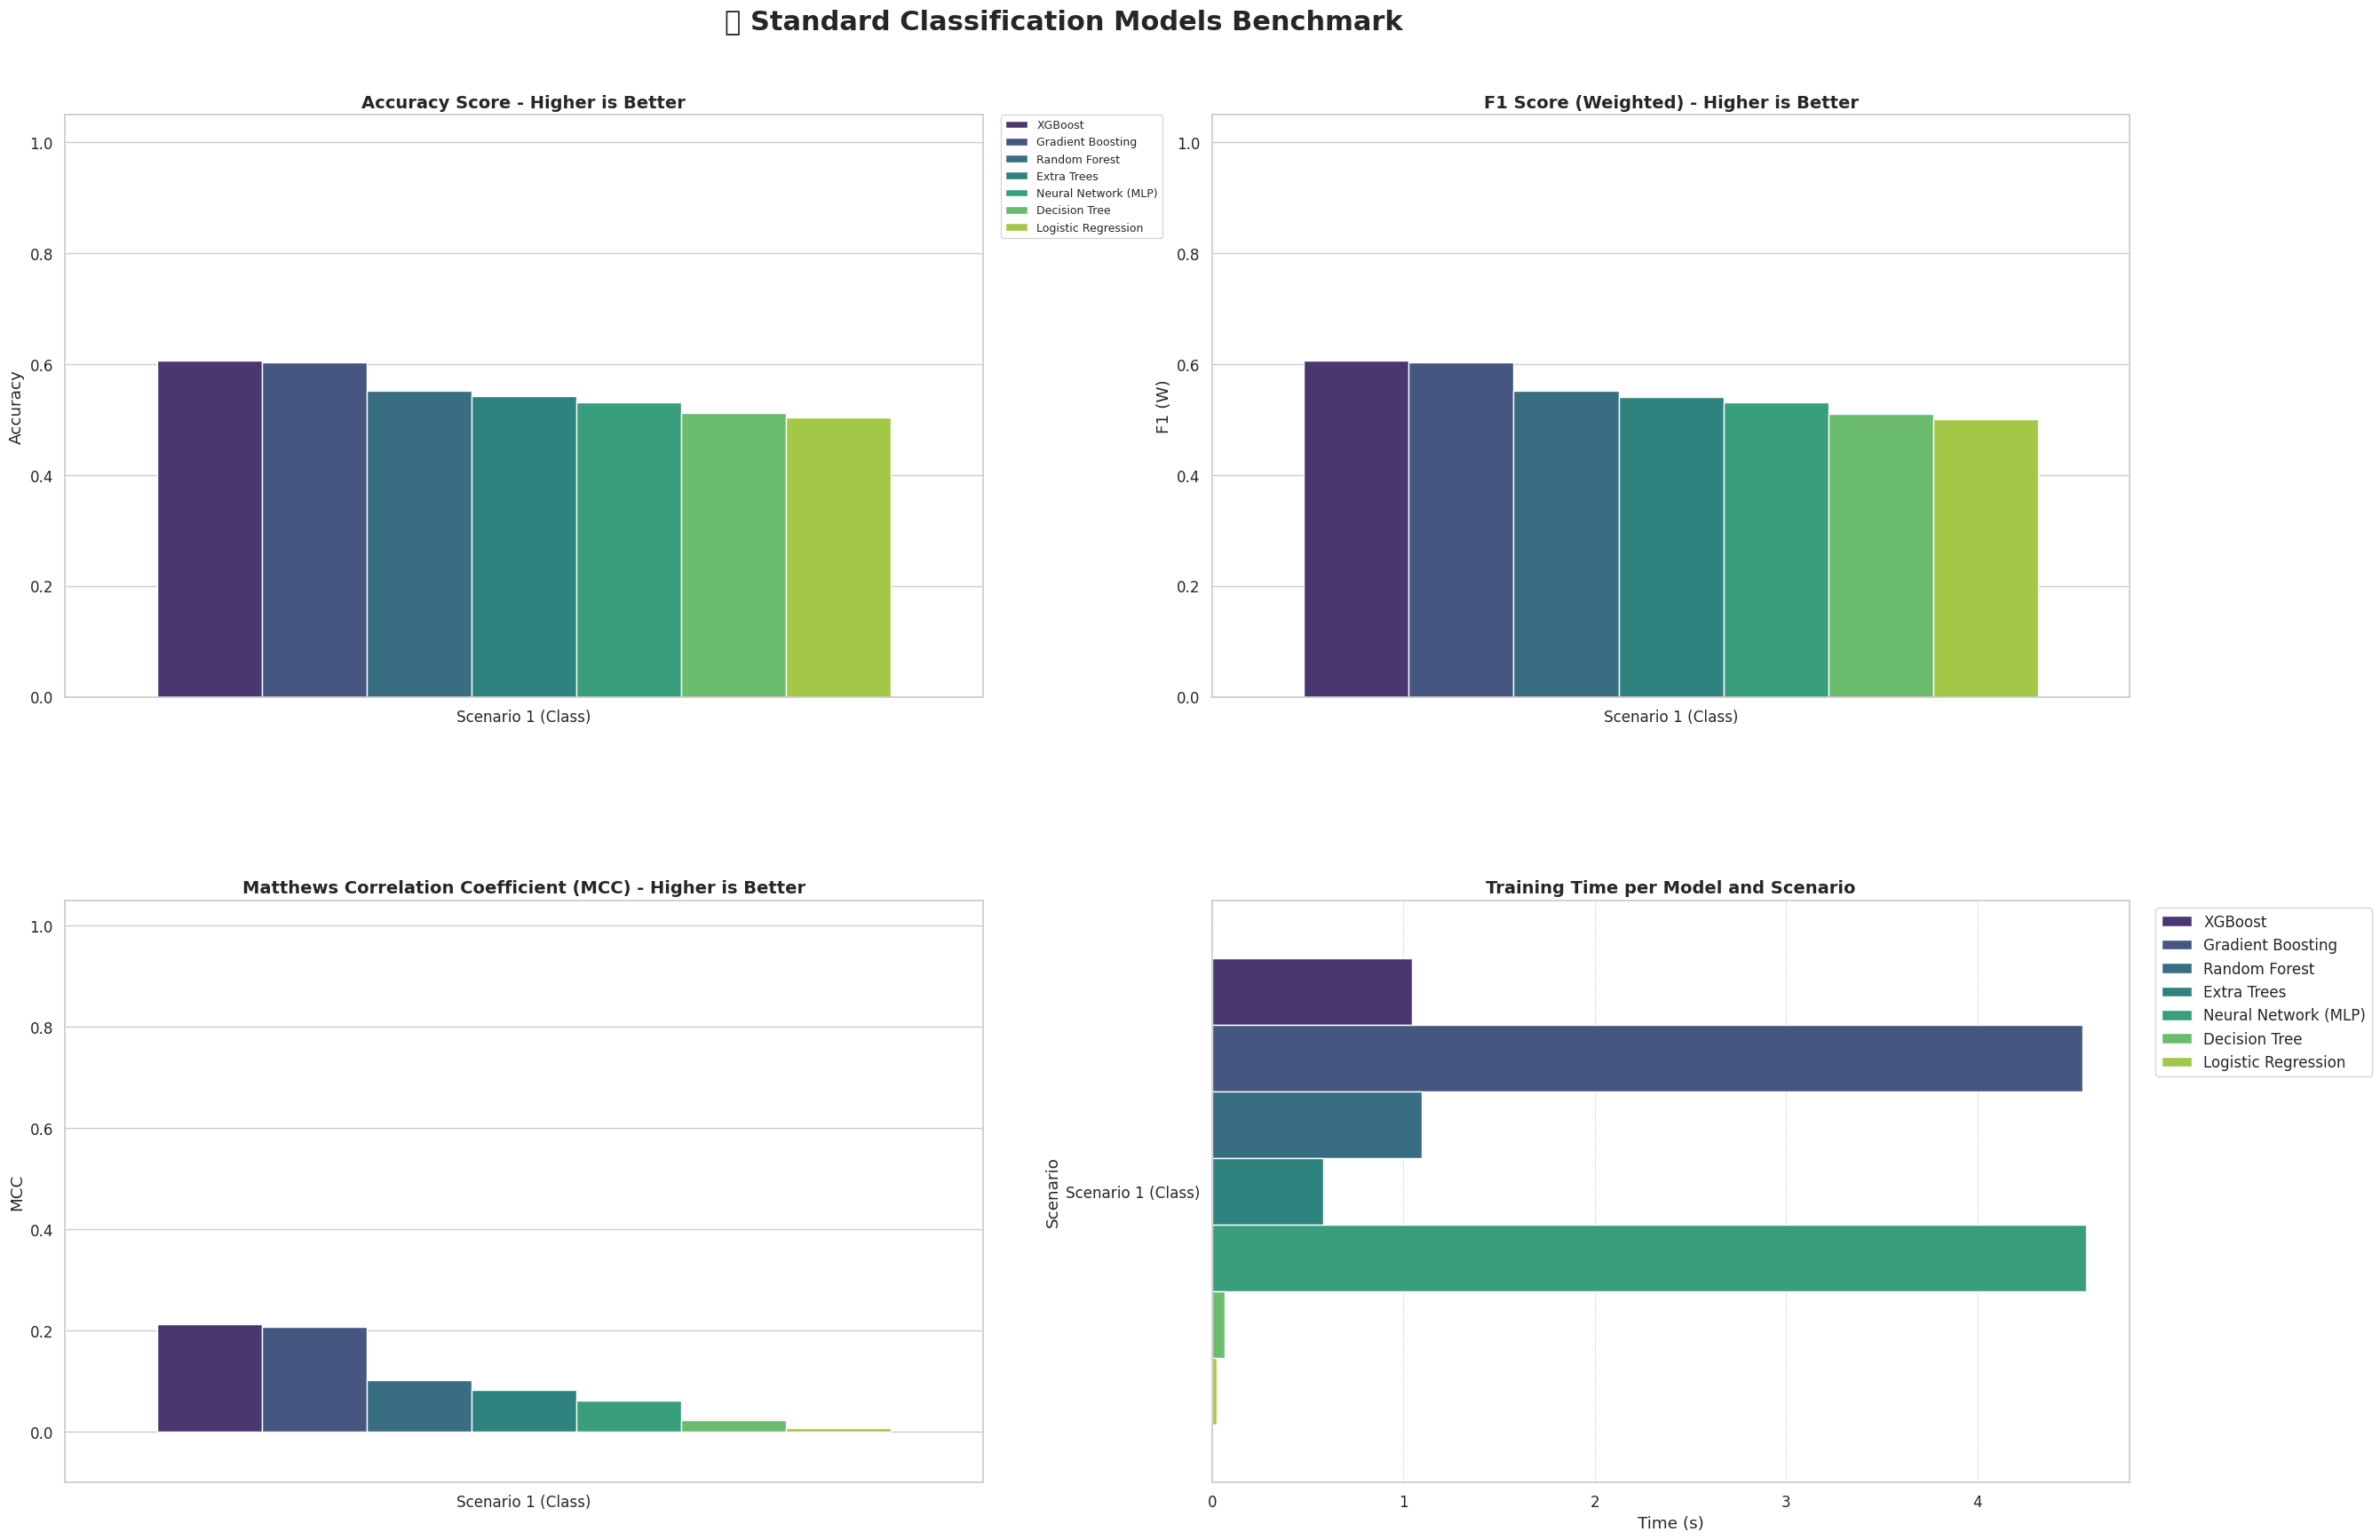

In [ ]:
# ==============================================================================
#  1. LOAD DATA
# ==============================================================================
def load_data():
    try:
        # Load the Classification Benchmark CSV
        df = pd.read_csv("CSV/baseModels_classification_metrics.csv")
        
        # RENAME 'Model' to 'Pilot Strategy' if needed (standardizing names)
        if 'Model' in df.columns:
            df.rename(columns={'Model': 'Pilot Strategy'}, inplace=True)
        
        # Sort by Scenario and Accuracy for better plotting consistency
        # We use Accuracy as the primary sorting metric here
        df.sort_values(by=['Scenario', 'Accuracy'], ascending=[True, False], inplace=True)
        
        return df
    except FileNotFoundError:
        print("❌ Error: 'CSV/baseModels_classification_metrics.csv' not found.")
        return None

# ==============================================================================
#  2. PLOTTING FUNCTION
# ==============================================================================
def create_dashboard(df):
    # Set global theme
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    # Create 2x2 Grid
    fig, axes = plt.subplots(2, 2, figsize=(30, 20))
    plt.subplots_adjust(hspace=0.35, wspace=0.25)
    
    # Title
    fig.suptitle('📊 Standard Classification Models Benchmark', fontsize=22, weight='bold', y=0.94)

    # --- 1. ACCURACY ---
    ax1 = axes[0, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='Accuracy', 
        hue='Pilot Strategy', 
        palette='viridis', 
        ax=ax1
    )
    ax1.set_title('Accuracy Score - Higher is Better', fontsize=14, weight='bold')
    ax1.set_ylim(0, 1.05)
    ax1.set_xlabel('')
    ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=9)

    # --- 2. F1 SCORE (Weighted) ---
    ax2 = axes[0, 1]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='F1 (W)', 
        hue='Pilot Strategy', 
        palette='viridis', 
        ax=ax2
    )
    ax2.set_title('F1 Score (Weighted) - Higher is Better', fontsize=14, weight='bold')
    ax2.set_ylim(0, 1.05)
    ax2.set_xlabel('')
    ax2.legend().remove() # Remove legend (redundant)
    
    # --- 3. MCC (Matthews Correlation Coefficient) ---
    # MCC is often considered the most informative single metric
    ax3 = axes[1, 0]
    sns.barplot(
        data=df, 
        x='Scenario', 
        y='MCC', 
        hue='Pilot Strategy', 
        palette='viridis', 
        ax=ax3
    )
    ax3.set_title('Matthews Correlation Coefficient (MCC) - Higher is Better', fontsize=14, weight='bold')
    ax3.set_xlabel('')
    # MCC can technically be negative, but usually 0 to 1 for decent models
    ax3.set_ylim(-0.1, 1.05) 
    ax3.legend().remove() 

    # --- 4. TRAINING TIME ---
    ax4 = axes[1, 1]
    sns.barplot(
        data=df,
        y='Scenario',         
        x='Time (s)',         
        hue='Pilot Strategy',       
        palette='viridis',
        errorbar=None,              
        ax=ax4
    )

    ax4.set_title('Training Time per Model and Scenario', fontsize=14, weight='bold')
    ax4.set_xlabel('Time (s)')
    ax4.set_ylabel('Scenario')
    ax4.grid(True, axis='x', ls="--", linewidth=0.5)
    ax4.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    # Save and Show
    filename = 'visualization/baseModels_classification_metrics.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Dashboard saved to '{filename}'")
    plt.show()

# ==============================================================================
#  3. RUN
# ==============================================================================
if __name__ == "__main__":
    df = load_data()
    if df is not None:
        create_dashboard(df)

✅ Table saved as 'visualization/baseModels_classification_winners_table.png'


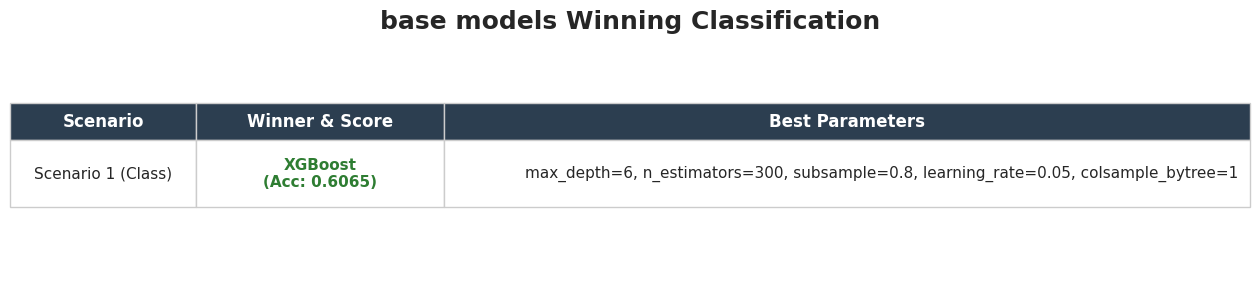

In [ ]:
# ==============================================================================
#  1. DATA PREPARATION (CLASSIFICATION VERSION)
# ==============================================================================
def get_clean_winners():
    try:
        # Load Classification CSV
        df = pd.read_csv("CSV/baseModels_classification_metrics.csv")
    except FileNotFoundError:
        print("❌ Error: 'CSV/baseModels_classification_metrics.csv' not found.")
        return None

    # Find Winners based on ACCURACY
    # (You can change 'Accuracy' to 'F1 (W)' or 'MCC' if you prefer those metrics)
    winner_indices = df.groupby('Scenario')['Accuracy'].idxmax()
    winners = df.loc[winner_indices].copy()
    
    # Param columns
    param_cols = [c for c in df.columns if c.startswith('param_')]
    
    # Process each row
    table_data = []
    
    for _, row in winners.iterrows():
        # 1. Format Model & Accuracy (Col 2)
        # Display: "XGBoost\n(Acc: 0.9512)"
        model_str = f"{row['Pilot Strategy']}\n(Acc: {row['Accuracy']:.4f})"
        
        # 2. Format Parameters (Col 3)
        valid_params = []
        for col in param_cols:
            val = row[col]
            if pd.notna(val) and str(val) != 'nan':
                key = col.replace('param_', '')
                # Format floats nicely
                val_str = f"{val:.4g}" if isinstance(val, float) else str(val)
                valid_params.append(f"{key}={val_str}")
        
        # Join and Wrap Text
        raw_param_str = ", ".join(valid_params)
        # Wrap text every 90 characters so it fits in the wide column
        wrapped_param_str = "\n".join(textwrap.wrap(raw_param_str, width=90))
        
        table_data.append([
            row['Scenario'], 
            model_str, 
            wrapped_param_str
        ])
        
    return pd.DataFrame(table_data, columns=["Scenario", "Winner & Score", "Best Parameters"])

# ==============================================================================
#  2. PLOTTING
# ==============================================================================
def plot_custom_table(df):
    if df is None: return

    # Adjust figure size based on content
    # Height = Header + (Rows * Height_Multiplier)
    fig_height = 2 + (len(df) * 1.2) 
    fig, ax = plt.subplots(figsize=(16, fig_height)) 
    
    ax.axis('off')

    # Define Column Widths (Sum should be close to 1.0)
    # Col 1 (Scenario): 15%
    # Col 2 (Model):    20%
    # Col 3 (Params):   65%
    widths = [0.15, 0.20, 0.65]

    # Create Table
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='left',
        loc='center',
        colWidths=widths
    )

    # Styling
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 4) # Make rows taller to fit wrapped text

    # Apply specific styles to cells
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor('#cccccc')
        cell.set_linewidth(1)
        
        # Header Row
        if row == 0:
            cell.set_text_props(weight='bold', color='white', size=12)
            cell.set_facecolor('#2c3e50') # Dark Blue/Grey
            cell.set_height(0.15)
            cell.set_text_props(horizontalalignment='center', verticalalignment='center')
        else:
            # Body Rows
            cell.set_text_props(verticalalignment='center')
            cell.set_text_props(horizontalalignment='left')
            
            # Alternating Row Colors
            if row % 2 == 0:
                cell.set_facecolor('#f9f9f9')
            else:
                cell.set_facecolor('#ffffff')

            # Center the Scenario and Model columns (0 and 1)
            if col in [0, 1]:
                cell.set_text_props(horizontalalignment='center')
                
            # Bold the Winner Name (Col 1)
            if col == 1:
                cell.set_text_props(weight='bold', color='#2e7d32') # Green

    plt.title("base models Winning Classification", fontsize=18, weight='bold', y=0.98)
    
    filename = "visualization/baseModels_classification_winners_table.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"✅ Table saved as '{filename}'")
    plt.show()

# ==============================================================================
#  3. EXECUTION
# ==============================================================================
if __name__ == "__main__":
    df = get_clean_winners()
    plot_custom_table(df)

## Benchmark ( RLT VS BaseModels )
**we will take the best RLT that performed in both scenarios and compare it with the best base model performence**

### Regression


**Real scenarios DataSet**

In [110]:
dataset_names_reg = ["AutoMPG","crime","concrete","energy_cooling_load","energy_heating_load"]  

**Best RLT Modell ( Random Forest )** 

In [111]:
rlt_regression = RLT(n_jobs=-1, 
              model="regression",
              split_gen ="random",
              resample_prob=0.9,
              reinforcement = True,
              protect=2,
              pilot_model = "random_forest",
              nsplit =1 ,
              nmin=20,
              muting=-1,
              mtry=5,
              combsplit=1,
              alpha=0.05,
            )

**Best BaseModel ( XGBoost )**

In [112]:
BaseModel_regression = XGBRegressor(
                random_state=42, 
                n_jobs=-1, 
                n_estimators=300,
                min_sample_leaf=1,
                max_depth = 6,
                subsample=1,
                learning_rate=0.05,
                colsample_bytree=1
            ) 

  Pilot Strategy      R2    RMSE     MAE  MAPE (%)   MedAE  Max Error  \
0            RLT  0.8977  2.3452  1.6603      7.65  1.1739     7.2118   
1   XGBRegressor  0.8475  2.8632  1.9465      8.35  1.1511    11.3809   
2            RLT  0.6343  0.1323  0.0897     82.20  0.0587     0.5701   
3   XGBRegressor  0.6179  0.1353  0.0912     85.13  0.0573     0.6339   
4            RLT  0.8707  5.7727  4.6972     15.11  3.8870    13.6415   
5   XGBRegressor  0.9118  4.7685  3.1107      9.76  1.9313    19.0581   
6            RLT  0.9613  1.8929  1.2665      4.66  0.6755     7.3274   
7   XGBRegressor  0.9909  0.9179  0.5743      2.08  0.3416     4.4848   
8            RLT  0.9845  1.2696  0.9076      4.93  0.6616     5.1815   
9   XGBRegressor  0.9985  0.3908  0.2715      1.28  0.1878     1.5097   

   Time (s)                                        Best Params  \
0   10.1466  {'alpha': 0.05, 'combsplit': 1, 'combsplit_th'...   
1    0.2287  {'objective': 'reg:squarederror', 'base_score'...  

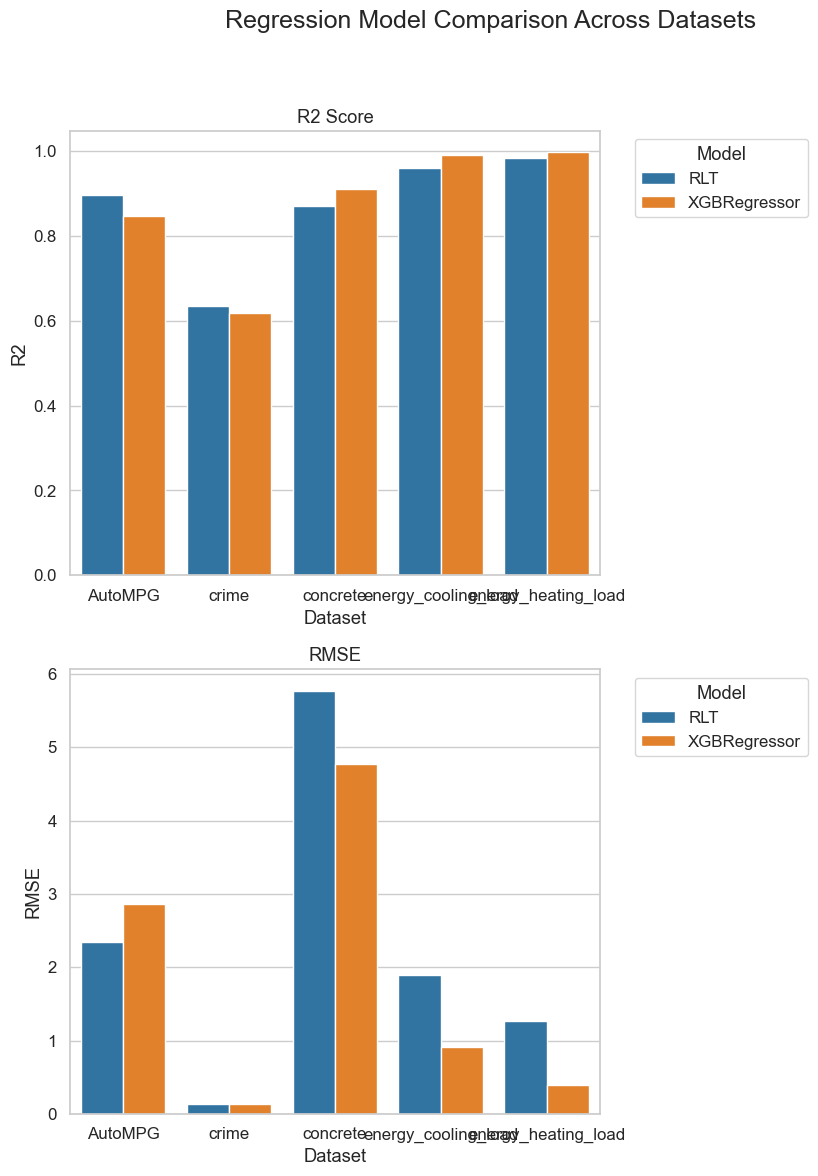

In [ ]:


# Placeholder for metrics
metrics_list = []

# Loop over regression datasets
for dataset in dataset_names_reg:  # <-- list of regression dataset names
    # ---------------------------
    # Load dataset
    # ---------------------------
    X_train = pd.read_csv(f"datasets/regression/{dataset}/X_train_data.csv")
    X_test  = pd.read_csv(f"datasets/regression/{dataset}/X_test_data.csv")

    y_train = pd.read_csv(f"datasets/regression/{dataset}/y_train_data.csv").values.ravel()
    y_test  = pd.read_csv(f"datasets/regression/{dataset}/y_test_data.csv").values.ravel()
    
    # ============================
    # Train & evaluate RLT model
    # ============================
    start_time = time.time()
    rlt_regression.fit(X_train, y_train)
    y_pred_rlt = rlt_regression.predict(X_test)
    rlt_time = time.time() - start_time

    metrics1 = calculate_detailed_metrics_reg(
        y_true=y_test, 
        y_pred=y_pred_rlt, 
        model_name="RLT", 
        params=rlt_clf.get_params(), 
        training_time=rlt_time
    )
    metrics1['dataset_name'] = dataset
    metrics_list.append(metrics1)

    # ============================
    # Train & evaluate XGB model
    # ============================
    start_time = time.time()
    BaseModel_regression.fit(X_train, y_train)
    y_pred_xgb = BaseModel_regression.predict(X_test)
    xgb_time = time.time() - start_time

    metrics2 = calculate_detailed_metrics_reg(
        y_true=y_test, 
        y_pred=y_pred_xgb, 
        model_name="XGBRegressor", 
        params=BaseModel_regression.get_params(), 
        training_time=xgb_time
    )
    metrics2['dataset_name'] = dataset
    metrics_list.append(metrics2)

# ============================
# Create comparison DataFrame
# ============================
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)
metrics_df.to_csv("CSV/all_regression_datasets_metrics_rlt(rf)VSXGB.csv", index=False)

# Set style
sns.set_style("whitegrid")

# Melt metrics_df for easier plotting (optional if Pilot Strategy is already present)
# But we can directly use metrics_df

# Create vertical subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(16, 12))  # Taller figure for vertical layout
fig.suptitle("Regression Model Comparison Across Datasets", fontsize=18)

# ========================
# R2 Score Comparison
# ========================
sns.barplot(
    x='dataset_name', 
    y='R2', 
    hue='Pilot Strategy', 
    data=metrics_df, 
    ax=axes[0],
    palette="tab10"
)
axes[0].set_title("R2 Score")
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel("R2")
axes[0].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# ========================
# RMSE Comparison
# ========================
sns.barplot(
    x='dataset_name', 
    y='RMSE', 
    hue='Pilot Strategy', 
    data=metrics_df, 
    ax=axes[1],
    palette="tab10"
)
axes[1].set_title("RMSE")
axes[1].set_xlabel("Dataset")
axes[1].set_ylabel("RMSE")
axes[1].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()

**Interpretation:**  

RLT captures most of the variance in the data and remains highly competitive, particularly on low-to-medium complexity datasets.
The results demonstrate that **Reinforced Linear Trees (RLT)** are a strong and competitive alternative to gradient boosting methods:

- **Outperforms XGB on AutoMPG and Crime**
- **Comparable performance across most datasets**
- **Lower median and maximum errors in several cases**
- **Greater interpretability due to linear leaves and pilot-guided splits**

### Classification

**Real scenarios DataSet**

In [174]:
dataset_names_clf = ["HCV","wdbc","sonar","sms","car"]  

**Best RLT Modell ( Decision_tree )** 

In [165]:
rlt_clf = RLT(n_jobs=-1, 
              model="classification",
              split_gen ="random",
              resample_prob=0.7,
              reinforcement = True,
              protect=2,
              pilot_model = "decision_tree",
              nsplit =1 ,
              nmin=20,
              muting=-1,
              mtry=5,
              combsplit=1,
              alpha=0.05,
              ntrees=50
            )

**Best BaseModel ( XGBoost )**

In [ ]:
BaseModel_clf = XGBClassifier(random_state=42, 
                n_jobs=-1, 
                verbosity=0, 
                use_label_encoder=False,
                max_depth=6,
                n_estimators=300,
                subsample=0.8,
                learning_rate=0.05,
                colsample_bytree=1  
            ) 

unique classesfor HCV : 5
unique classesfor wdbc : 2
unique classesfor sonar : 2
unique classesfor sms : 2
unique classesfor car : 4
  Pilot Strategy  Accuracy  Bal. Acc.  F1 (W)  Precision  Recall     MCC  \
0            RLT    0.9675     0.6867  0.9627     0.9651  0.9675  0.8586   
1  XGBClassifier    0.9512     0.5867  0.9469     0.9434  0.9512  0.7848   
2            RLT    0.9825     0.9762  0.9824     0.9829  0.9825  0.9626   
3  XGBClassifier    0.9649     0.9524  0.9645     0.9668  0.9649  0.9258   
4            RLT    0.8095     0.8000  0.8004     0.8603  0.8095  0.6633   
5  XGBClassifier    0.9286     0.9250  0.9280     0.9371  0.9286  0.8649   
6            RLT    0.9408     0.7785  0.9334     0.9446  0.9408  0.7221   
7  XGBClassifier    0.9686     0.9053  0.9677     0.9680  0.9686  0.8593   
8            RLT    0.8121     0.4120  0.7846     0.7610  0.8121  0.5730   
9  XGBClassifier    0.9942     0.9789  0.9942     0.9942  0.9942  0.9874   

   Time (s)                   

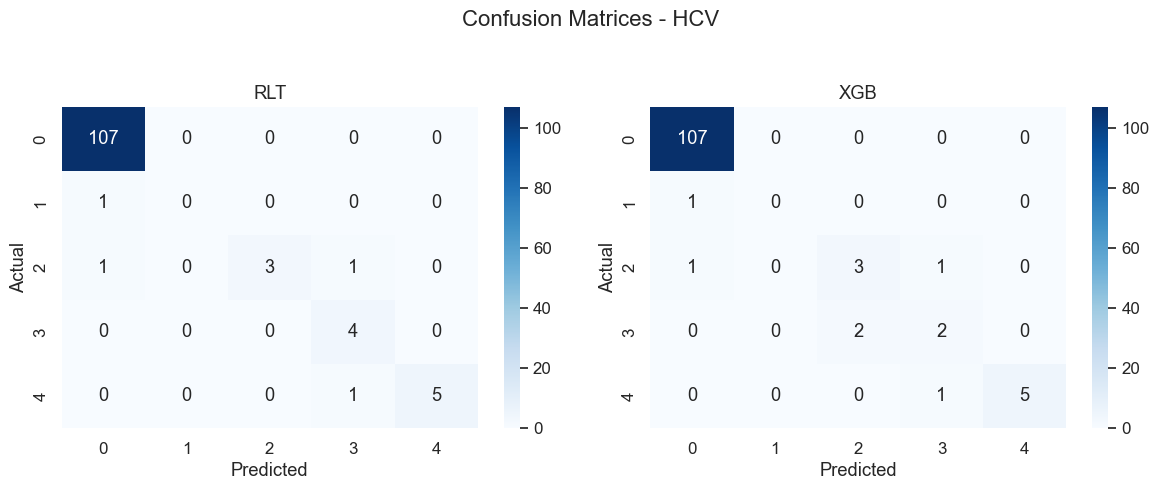

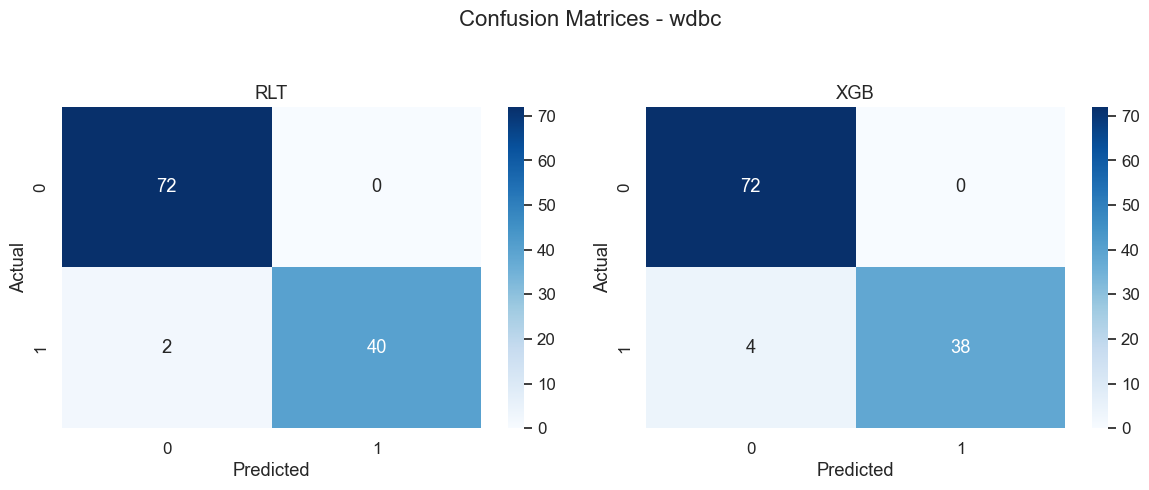

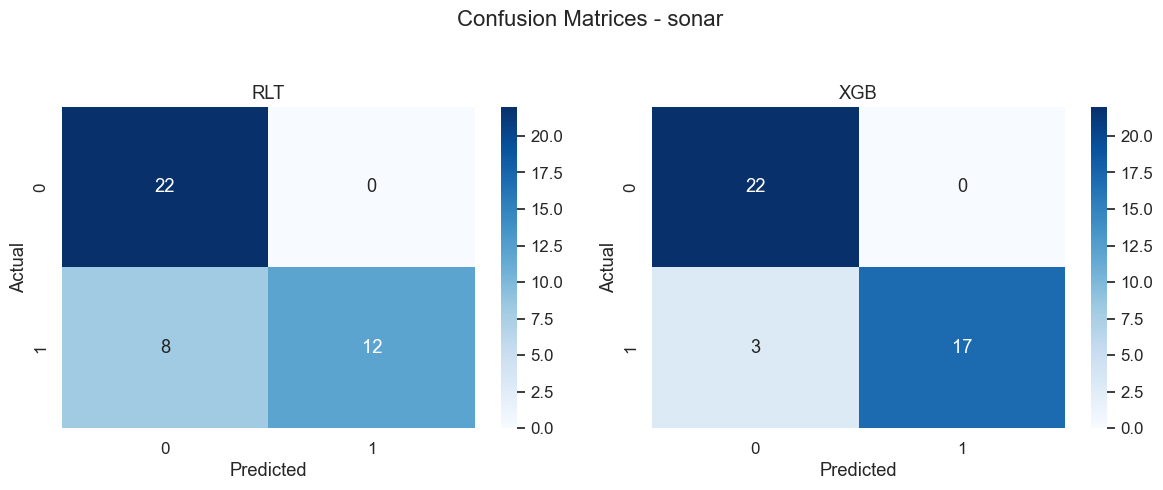

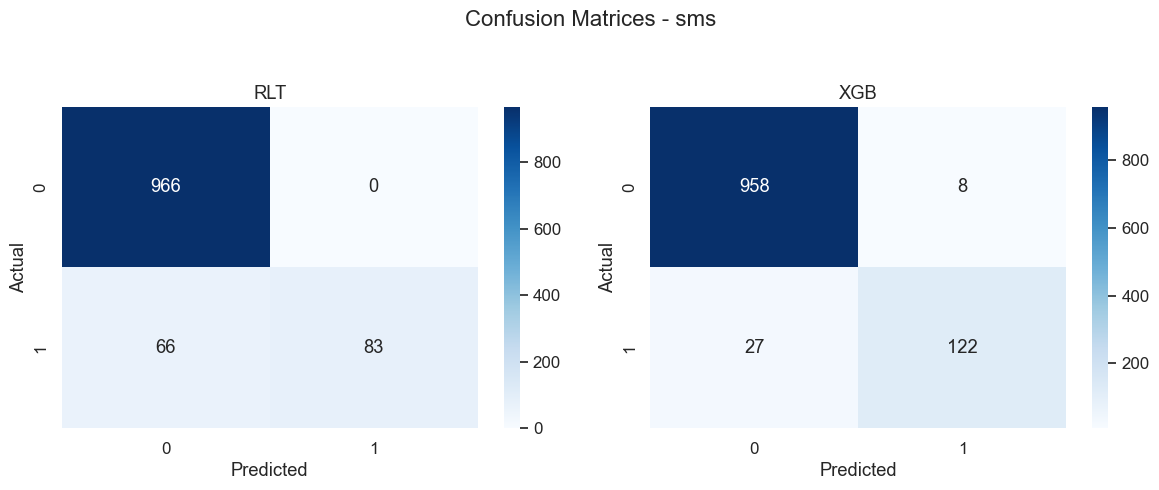

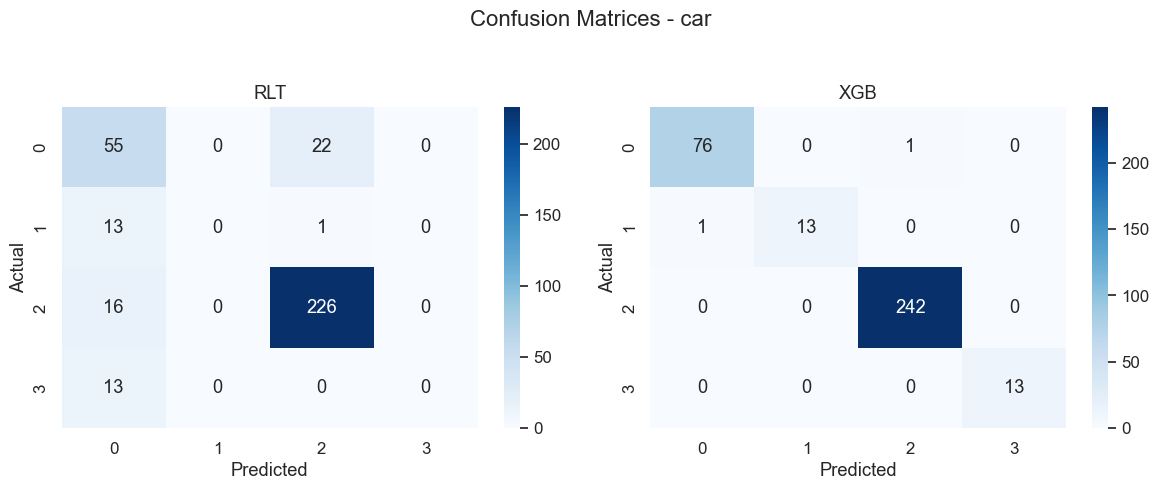

In [167]:

# Placeholder for metrics
metrics_list = []

# Dictionary to store confusion matrices per dataset per model
conf_matrix_dict = {}

for dataset in dataset_names_clf: 
    X_train = pd.read_csv(f"datasets/classification/{dataset}/X_train_data.csv")
    X_test  = pd.read_csv(f"datasets/classification/{dataset}/X_test_data.csv")

    y_train = pd.read_csv(f"datasets/classification/{dataset}/y_train_data.csv").values.ravel()
    y_test  = pd.read_csv(f"datasets/classification/{dataset}/y_test_data.csv").values.ravel()
    
    
    
    
    print(f"unique classesfor {dataset} :", len(np.unique(y_train)))  # number of distinct classes

    # ============================
    # Train & evaluate RLT model
    # ============================
    
    BaseModel_clf = XGBClassifier(random_state=42, 
                n_jobs=-1, 
                verbosity=0, 
                use_label_encoder=False,
                max_depth=6,
                n_estimators=300,
                subsample=0.8,
                learning_rate=0.05,
                colsample_bytree=1  
            ) 

    start_time = time.time()
    rlt_clf.fit(X_train, y_train)
    y_pred_rlt = rlt_clf.predict(X_test)
    rlt_time = time.time() - start_time

    metrics1 = calculate_classification_metrics(
        y_true=y_test, 
        y_pred=y_pred_rlt, 
        model_name="RLT", 
        params=rlt_clf.get_params(), 
        training_time=rlt_time
    )
    metrics1['dataset_name'] = dataset
    metrics_list.append(metrics1)

    # Store confusion matrix
    conf_matrix_dict.setdefault(dataset, {})['RLT'] = confusion_matrix(y_test, y_pred_rlt)

    # ============================
    # Train & evaluate XGB model
    # ============================
    start_time = time.time()
    BaseModel_clf.fit(X_train, y_train)
    y_pred_xgb = BaseModel_clf.predict(X_test)
    xgb_time = time.time() - start_time
    
    metrics2 = calculate_classification_metrics(
        y_true=y_test, 
        y_pred=y_pred_xgb, 
        model_name="XGBClassifier", 
        params=BaseModel_clf.get_params(), 
        training_time=xgb_time
    )
    metrics2['dataset_name'] = dataset
    metrics_list.append(metrics2)

    # Store confusion matrix
    conf_matrix_dict[dataset]['XGB'] = confusion_matrix(y_test, y_pred_xgb)

# ============================
# Create comparison DataFrame
# ============================
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)
metrics_df.to_csv("CSV/all_classification_datasets_metrics_rlt(dt)VSXGB.csv", index=False)


# ============================
# Example: Plot confusion matrices
# ============================
sns.set_style("whitegrid")

for dataset in dataset_names_clf:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Confusion Matrices - {dataset}", fontsize=16)
    
    for i, model in enumerate(['RLT', 'XGB']):
        cm = conf_matrix_dict[dataset][model]
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axes[i])
        axes[i].set_title(model)
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

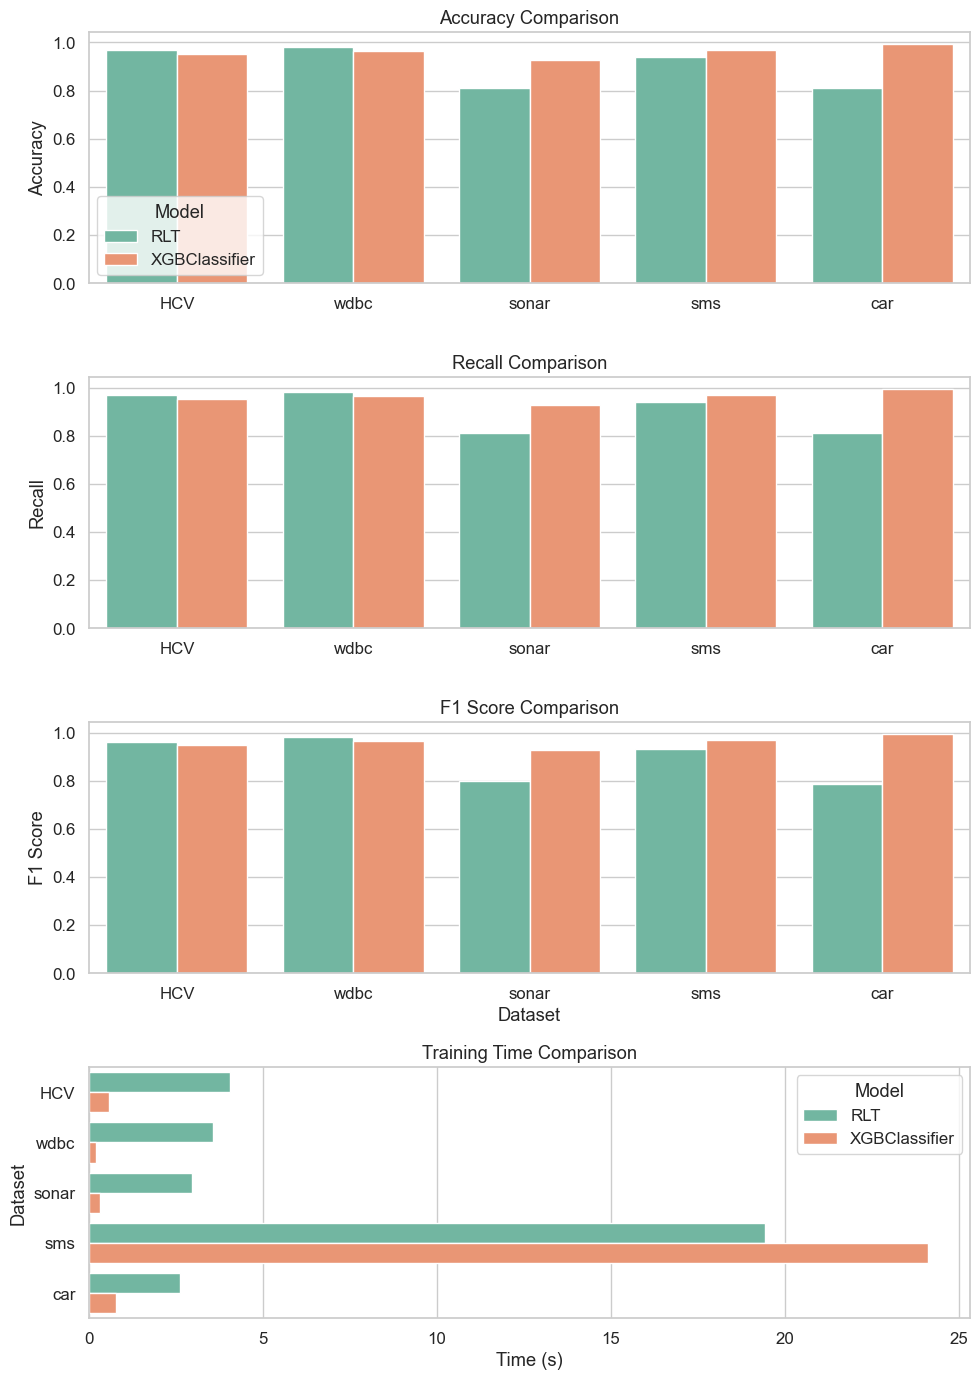

In [173]:
sns.set_style("whitegrid")
palette = "Set2"

# Create a figure with 4 subplots: 3 vertical stacked + 1 horizontal below or aside
fig, axes = plt.subplots(4, 1, figsize=(10, 14))  # 4 rows, 1 column
fig.subplots_adjust(hspace=0.4)

# ========================
# Accuracy
# ========================
sns.barplot(
    x="dataset_name", y="Accuracy", hue="Pilot Strategy", 
    data=metrics_df, ax=axes[0], palette=palette
)
axes[0].set_title("Accuracy Comparison")
axes[0].set_xlabel("")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Model", loc="lower left")

# ========================
# Recall
# ========================
sns.barplot(
    x="dataset_name", y="Recall", hue="Pilot Strategy", 
    data=metrics_df, ax=axes[1], palette=palette
)
axes[1].set_title("Recall Comparison")
axes[1].set_xlabel("")
axes[1].set_ylabel("Recall")
axes[1].legend_.remove()  # Remove redundant legend

# ========================
# F1 Score
# ========================
sns.barplot(
    x="dataset_name", y="F1 (W)", hue="Pilot Strategy", 
    data=metrics_df, ax=axes[2], palette=palette
)
axes[2].set_title("F1 Score Comparison")
axes[2].set_xlabel("Dataset")
axes[2].set_ylabel("F1 Score")
axes[2].legend_.remove()

# ========================
# Training Time (Horizontal)
# ========================
sns.barplot(
    x="Time (s)", y="dataset_name", hue="Pilot Strategy",
    data=metrics_df, ax=axes[3], palette=palette, orient="h"
)
axes[3].set_title("Training Time Comparison")
axes[3].set_xlabel("Time (s)")
axes[3].set_ylabel("Dataset")
axes[3].legend(title="Model", loc="best")

plt.tight_layout()
plt.show()


**Conclusion**

- **RLT outperforms XGB**:
  - WDBC
  - HCV
- **XGBClassifier outperforms RLT**:
  - Sonar
  - SMS
  - Car
- **Comparable performance**:
  - None (clear winner exists per dataset)

The results demonstrate that **Reinforced Linear Trees (RLT)** are a strong and interpretable classifier for well-structured datasets, offering competitive accuracy and MCC values.
